In [1]:
# Basic Imports
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:

file_path = r'D:\ml-algorithms\datasets\autos_dataset.csv'

In [3]:
df = pd.read_csv(file_path)
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [4]:
# Feature Names preasent in the dataset
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### Basic Info

In [5]:
print("Shape of the data set (rows, columns)",df.shape)
print("\nColumn Types: \n", df.dtypes)

Shape of the data set (rows, columns) (205, 26)

Column Types: 
 symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [6]:
print("Missing Values: \n",df.isnull().sum())

Missing Values: 
 symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


### Check how many '?' values exist in each column

In [7]:
(df == '?').sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
df[df.isin(['?']).any(axis=1)]

symboling normalized-losses           make fuel-type aspiration  \
0            3                 ?    alfa-romero       gas        std   
1            3                 ?    alfa-romero       gas        std   
2            1                 ?    alfa-romero       gas        std   
5            2                 ?           audi       gas        std   
7            1                 ?           audi       gas        std   
9            0                 ?           audi       gas      turbo   
14           1                 ?            bmw       gas        std   
15           0                 ?            bmw       gas        std   
16           0                 ?            bmw       gas        std   
17           0                 ?            bmw       gas        std   
27           1               148          dodge       gas      turbo   
43           0                 ?          isuzu       gas        std   
44           1                 ?          isuzu       gas        std   
45           0                 ?          isuzu       gas        std   
46           2                 ?          isuzu       gas        std   
48           0                 ?         jaguar       gas        std   
49           0                 ?         jaguar       gas        std   
55           3               150          mazda       gas        std   
56           3               150          mazda       gas        std   
57           3               150          mazda       gas        std   
58           3               150          mazda       gas        std   
63           0                 ?          mazda    diesel        std   
66           0                 ?          mazda    diesel        std   
71          -1                 ?  mercedes-benz       gas        std   
73           0                 ?  mercedes-benz       gas        std   
74           1                 ?  mercedes-benz       gas        std   
75           1                 ?        mercury       gas      turbo   
82           3                 ?     mitsubishi       gas      turbo   
83           3                 ?     mitsubishi       gas      turbo   
84           3                 ?     mitsubishi       gas      turbo   
109          0                 ?         peugot       gas        std   
110          0                 ?         peugot    diesel      turbo   
113          0                 ?         peugot       gas        std   
114          0                 ?         peugot    diesel      turbo   
124          3                 ?       plymouth       gas      turbo   
126          3                 ?        porsche       gas        std   
127          3                 ?        porsche       gas        std   
128          3                 ?        porsche       gas        std   
129          1                 ?        porsche       gas        std   
130          0                 ?        renault       gas        std   
131          2                 ?        renault       gas        std   
181         -1                 ?         toyota       gas        std   
189          3                 ?     volkswagen       gas        std   
191          0                 ?     volkswagen       gas        std   
192          0                 ?     volkswagen    diesel      turbo   
193          0                 ?     volkswagen       gas        std   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
5            two        sedan          fwd           front        99.8  ...   
7           four        wagon          fwd           front       105.8  ...   
9            two    hatchback          4wd           front        99.5  ...   
14          four        sedan          rwd           front       10

### Convert '?' to NaN

In [9]:
df.replace('?',np.nan,inplace=True)

In [10]:
# Now Check the NaN/ missing values that are preasent in the dataseet
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Missing Values

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

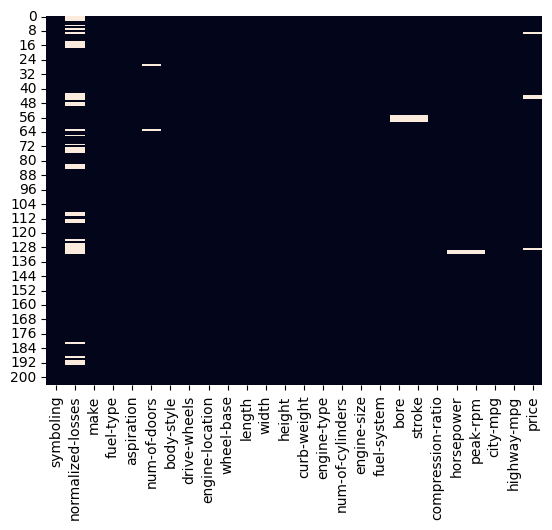

In [11]:
# are preasent in the dataset
sns.heatmap(df.isnull(),cbar=False)
df.isnull().sum()

### Dataset Overview

In [12]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [14]:
df.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
dtype: int64

- How many distinct (non-duplicate) values are present in each column.
    - Helps you quickly identify:
         * Categorical columns (with low unique values)
         * Columns that may be IDs (with all values unique)

### Check object-type columns for unique non-numeric values

In [15]:
# Check unique values in object columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in `{col}`: ")
    print(df[col].unique())


Unique values in `normalized-losses`: 
[nan '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

Unique values in `make`: 
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Unique values in `fuel-type`: 
['gas' 'diesel']

Unique values in `aspiration`: 
['std' 'turbo']

Unique values in `num-of-doors`: 
['two' 'four' nan]

Unique values in `body-style`: 
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Unique values in `drive-wheels`: 
['rwd' 'fwd' '4wd']

Unique values in `engine-location`: 
['front' 'rear']

Unique values in `engine-type`: 
['dohc' 'ohcv' 'ohc' 'l' 'roto

---

### Convert columns with numeric strings (and NaNs) to actual numeric type

#### 🔧 1. Identify columns to convert

Based on the data, the following columns **should be numeric but are `object`**:

* `normalized-losses`
* `bore`
* `stroke`
* `price`
* `horsepower `


In [16]:
cols_to_convert = ['normalized-losses','bore','stroke','price','horsepower','peak-rpm']

In [17]:
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col],errors='coerce') #  will turn '?' or any junk into NaN

In [18]:
## Check if junk still exist
for col in cols_to_convert:
    non_numeric = df[col].isna().sum()
    print(f"{col}: {non_numeric} missing values (after conversion)")

normalized-losses: 41 missing values (after conversion)
bore: 4 missing values (after conversion)
stroke: 4 missing values (after conversion)
price: 4 missing values (after conversion)
horsepower: 2 missing values (after conversion)
peak-rpm: 2 missing values (after conversion)


In [19]:
# Strip whitespaces from all object-type columns

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### To fill the missing value we will take help of stastics

In [21]:
# check missing value count and percentage
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing_Values': missing_count,
    'Percentage':missing_percent
})
print(missing_info[missing_info['Missing_Values']>0])

                   Missing_Values  Percentage
normalized-losses              41    20.00000
num-of-doors                    2     0.97561
bore                            4     1.95122
stroke                          4     1.95122
horsepower                      2     0.97561
peak-rpm                        2     0.97561
price                           4     1.95122


### Check if data is skewed or Normally Distributed

- If |skewness| < 0.5 → approximately normal → use mean
- If 0.5 < |skewness| < 1 → moderately skewed → median is safer
- If |skewness| > 1 → highly skewed → definitely use median

#### Price

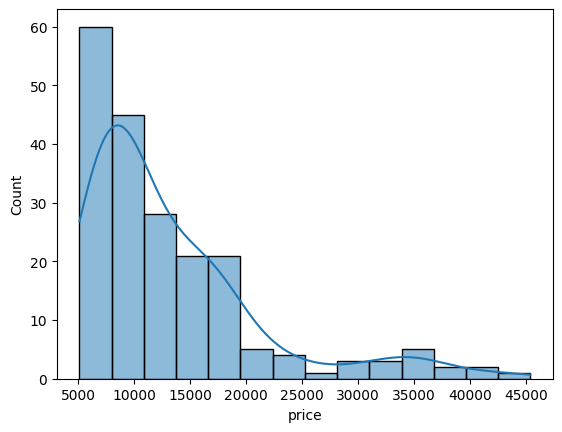

In [22]:
### Price
sns.histplot(df['price'],kde=True)
plt.show()

In [23]:
print('Skewness of price: ',df['price'].skew())

Skewness of price:  1.8096753390980749


#### Horsepower

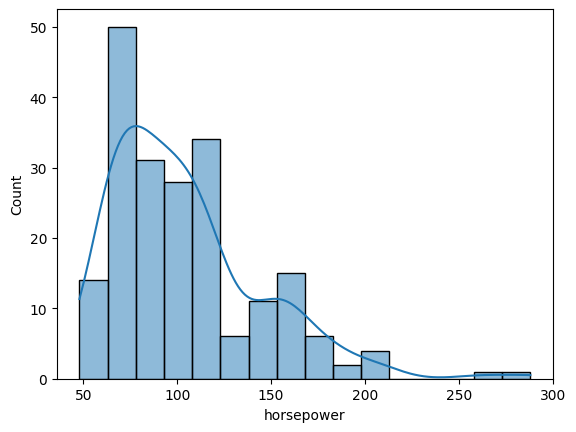

In [24]:
sns.histplot(df['horsepower'],kde=True)
plt.show()

In [25]:
print("Skewness of Horsepower: ",df['horsepower'].skew())

Skewness of Horsepower:  1.3910294937929355


#### normalized-losses

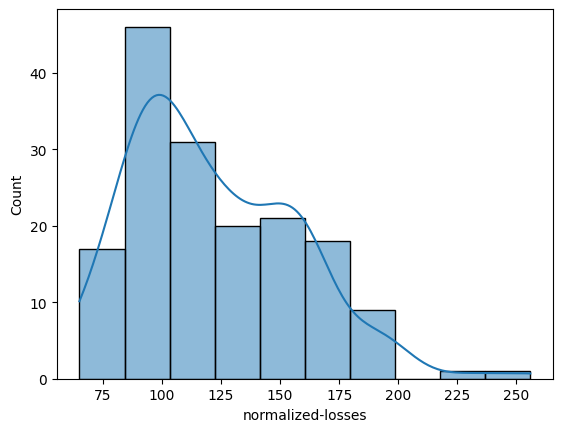

In [26]:
sns.histplot(df['normalized-losses'],kde=True)
plt.show()

In [27]:
print("Skewness of normalized-losses : ",df['normalized-losses'].skew())

Skewness of normalized-losses :  0.7659764175950632


#### Bore

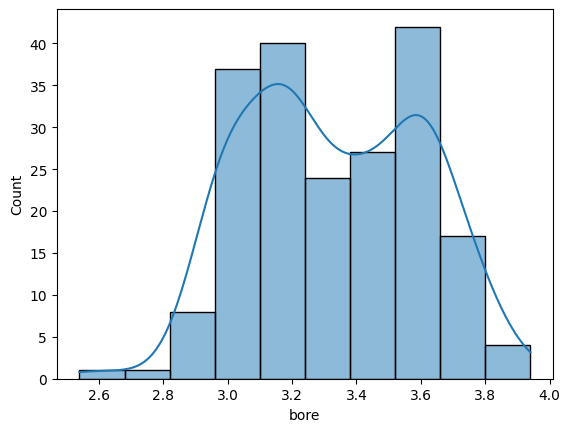

In [28]:
sns.histplot(df['bore'],kde=True)
plt.show()

In [29]:
print("Skewness of bore: ",df['bore'].skew())

Skewness of bore:  0.020015510309870796


#### stroke

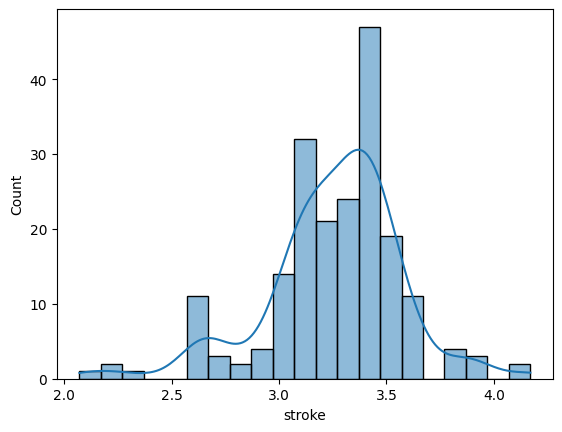

In [30]:
sns.histplot(df['stroke'],kde=True)
plt.show()

In [31]:
print("skewness of stroke: ",df['stroke'].skew())

skewness of stroke:  -0.6831221940577341


----

### Check for outliers

In [32]:
# By IQR

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Detect Outliers
outliers_indices = {}

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Store the indices of outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outliers_indices[col] = list(outliers)

for col, indices in outliers_indices.items():
    print(f"{col}: {len(indices)} outliers")

symboling: 0 outliers
normalized-losses: 1 outliers
wheel-base: 3 outliers
length: 1 outliers
width: 8 outliers
height: 0 outliers
curb-weight: 0 outliers
engine-size: 10 outliers
bore: 0 outliers
stroke: 20 outliers
compression-ratio: 28 outliers
horsepower: 6 outliers
peak-rpm: 2 outliers
city-mpg: 2 outliers
highway-mpg: 3 outliers
price: 14 outliers


### Visulize the outliers

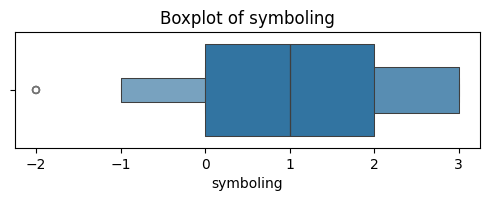

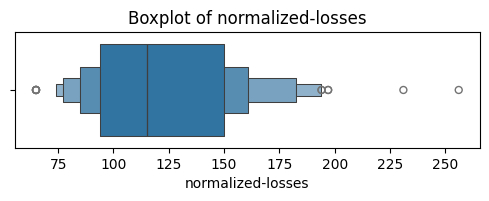

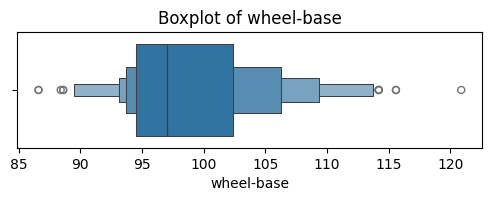

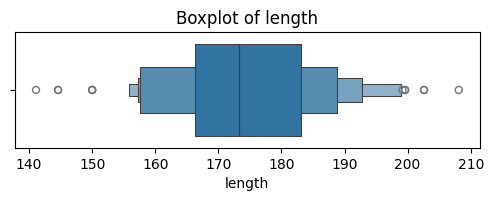

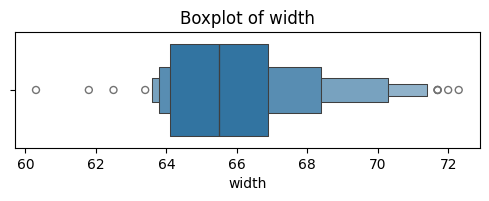

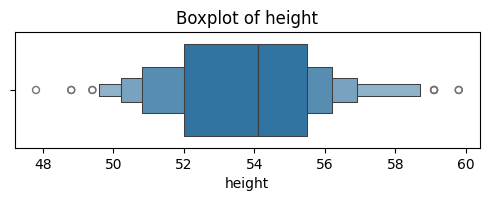

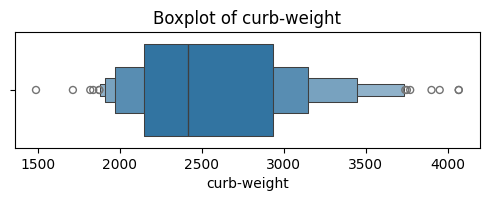

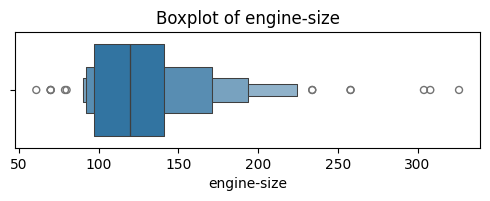

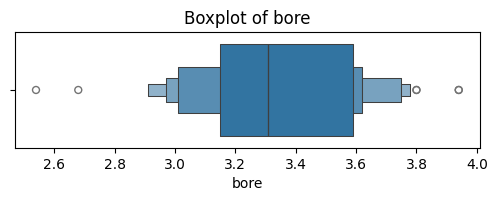

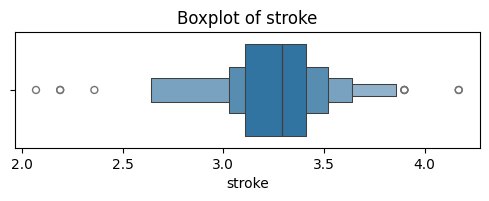

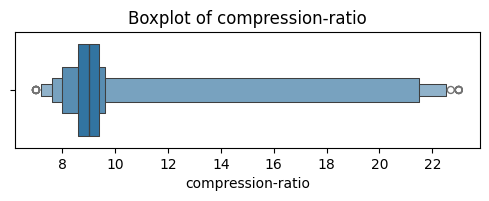

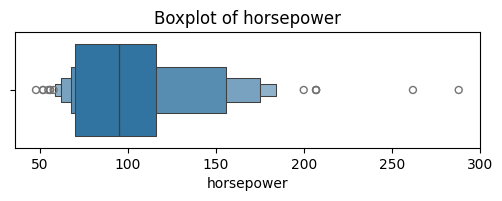

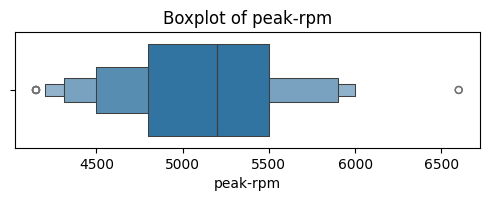

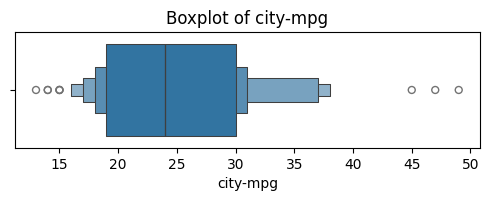

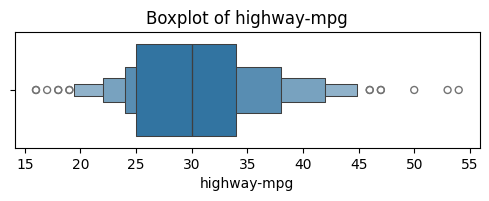

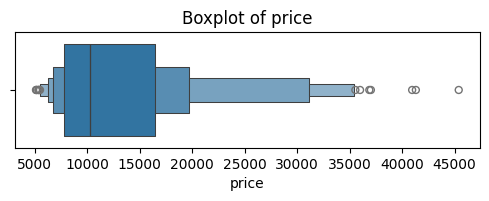

In [33]:
for col in numeric_columns:
    plt.figure(figsize=(6,1.5))
    sns.boxenplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## 1.Fill the missing values

In [34]:
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0      111.0   
1          130         mpfi  3.47    2.68               9.0      111.0   
2          152         mpfi  2.68    3.47               9.0      154.0   
3          109         mpfi  3.19    3.40              10.0      102.0   
4          136         mpfi  3.19    3.40               8.0      115.0   

   peak-rpm city-mpg  highway-mpg    price  
0    5000.0       21           27  13495.0  
1    5000.0       21           27  16500.0  
2    5000.0       19           26  16500.0  
3    5500.0       24           30  13950.0  
4    5500.0       18           22  17450.0  

[5 rows x 26 columns]

In [35]:
# Drop rows with missing target as this is our target column we can do that
df.dropna(subset=['price'], inplace=True)

In [36]:
missing_info = df.isnull().sum().sort_values(ascending=False)
missing_info = missing_info[missing_info > 0]
print(missing_info)

normalized-losses    37
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          2
dtype: int64


| Column         | Type        | % Missing | Strategy                            |
| -------------- | ----------- | --------- | ----------------------------------- |
| `stroke`       | Numeric     | 10%       | Mean or Median                      |
| `horsepower`   | Numeric     | 2%        | Median (robust to outliers)         |
| `num-of-doors` | Categorical | 1%        | Mode                                |
| `price`        | Target      | 15%       | **Drop rows** (don't impute target) |


In [37]:
# # Fill the missing values
# num_cols_with_na = ['normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm']

# for col in num_cols_with_na:
#     df[col] = df[col].astype(float)
#     df[col].fillna(df[col].median(),inplace=True)

# This methdo will replace in future
# use new method isted

# C:\Users\akash\AppData\Local\Temp\ipykernel_14364\3487815005.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
# The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

# For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


#   df[col].fillna(df[col].median(),inplace=True)
# C:\Users\akash\AppData\Local\Temp\ipykernel_14364\3487815005.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
# The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

# For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


#   df[col].fillna(df[col].median(),inplace=True)
# C:\Users\akash\AppData\Local\Temp\ipykernel_14364\3487815005.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
# The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

# For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.

#   df[col].fillna(df[col].median(),inplace=True)
# C:\Users\akash\AppData\Local\Temp\ipykernel_14364\3487815005.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
# The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

# For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.
# ...
# For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.

#   df[col].fillna(df[col].median(),inplace=True)
# Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

In [38]:
df.fillna({
    'normalized-losses': df['normalized-losses'].median(),
    'stroke': df['stroke'].median(),
    'bore': df['bore'].median(),
    'horsepower': df['horsepower'].median(),
    'peak-rpm': df['peak-rpm'].median()
}, inplace=True)

In [39]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [40]:
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3              115.0  alfa-romero       gas        std   
1          3              115.0  alfa-romero       gas        std   
2          1              115.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0      111.0   
1          130         mpfi  3.47    2.68               9.0      111.0   
2          152         mpfi  2.68    3.47               9.0      154.0   
3          109         mpfi  3.19    3.40              10.0      102.0   
4          136         mpfi  3.19    3.40               8.0      115.0   

   peak-rpm city-mpg  highway-mpg    price  
0    5000.0       21           27  13495.0  
1    5000.0       21           27  16500.0  
2    5000.0       19           26  16500.0  
3    5500.0       24           30  13950.0  
4    5500.0       18           22  17450.0  

[5 rows x 26 columns]

We choose **median** over **mean or mode** in the following situations — and in your dataset, this applies well. Here's why:

---

### 🔍 Why Use **Median**?

1. **Robust to Outliers**:

   * If a column is **numerical** and **skewed** (which your data like `price`, `horsepower`, etc. are), **mean** can be heavily affected by extreme values (outliers).
   * **Median**, on the other hand, is resistant to outliers — it represents the "middle" better when data isn’t symmetric.

   **Example**:
   If you have values: `[1000, 1050, 1100, 1150, 1,000,000]`

   * Mean = very high
   * Median = unaffected

2. **Your Data is Skewed**:

   * You mentioned skewness like `price = 1.8` and `horsepower = 1.3`, etc. This confirms that your data is **right-skewed**, so **median is the safer choice**.

---

### 🧠 When to Use What?

| Imputation Method | Use When...                                                   |
| ----------------- | ------------------------------------------------------------- |
| **Mean**          | Data is **normally distributed** (symmetric, no/few outliers) |
| **Median**        | Data is **skewed** or has **outliers**                        |
| **Mode**          | Data is **categorical** or **discrete with repetitions**      |

---

### ⚙️ For your case:

* `normalized-losses`, `stroke`, `bore`, `horsepower`, `price`, `peak-rpm` → **Median**
* `num-of-doors` → **Mode** (because it's categorical)

---

### For categorical

In [41]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

C:\Users\akash\AppData\Local\Temp\ipykernel_22720\4239780594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)


In [42]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [43]:
# Convert words to numbers
# As this is regression proble statement we can benifit form it

In [44]:
word_to_number = {
    'two':2,
    'four':4
}
df['num-of-doors'] = df['num-of-doors'].map(word_to_number)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    int64  
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

#### No_of_cylinders categorical feature

In [46]:
df['num-of-cylinders'].value_counts()

num-of-cylinders
four      157
six        24
five       10
eight       4
two         4
twelve      1
three       1
Name: count, dtype: int64

#### 🔹 `df['num-of-cylinders'].map()`

**Use when:**

* The **categories represent actual numeric values** with **ordinal or quantitative meaning**.
* You want the model to **understand numerical relationships** (e.g., 8 cylinders > 4 cylinders).
* You're going to use models that **benefit from numeric continuity**, like **Linear Regression, Decision Trees, XGBoost**, etc.

✅ **Best for:**
`'num-of-cylinders'` → because “eight” cylinders literally means 8, and more cylinders usually mean more power.

---

#### 🔹 `pd.get_dummies(df, columns=['col'])`

**Use when:**

* The feature is **categorical** but **not ordinal** (no natural order).
* The text labels are **just categories**, not meaningful numbers.
* You don’t want to imply any **ranking or distance** between the categories.
* You’re using models that handle one-hot encoded features well, such as **Logistic Regression, KNN, SVM**, etc.

✅ **Best for:**
`'body-style'`, `'fuel-type'`, `'drive-wheels'`, etc.

---

#### ❗What happens if you use `get_dummies()` on `num-of-cylinders`?

* You lose the **numerical meaning** of cylinder count.
* Instead of understanding "8 > 4 > 2", the model sees just separate binary flags like:

  * `cylinder_two`
  * `cylinder_four`
  * `cylinder_six`
* For many regression models, this **reduces the model's ability to learn trends** across numerical ranges.

---

#### ✅ Conclusion

| Feature Type                             | Best Approach       |
| ---------------------------------------- | ------------------- |
| Numeric meaning (e.g., cylinders, doors) | `.map()` to numeric |
| Pure categories (e.g., fuel type, brand) | `pd.get_dummies()`  |

Let me know if you want help listing all columns in your dataset by type so you can choose the right encoding for each.


In [47]:
cylinder_map = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

df['number-of-cylinders'] = df['num-of-cylinders'].map(cylinder_map)

### Univariate Analysis

- In Univariate Analysis, we analyze one feature at a time to understand its distribution, central tendency, and frequency. Since all the features you listed are categorical, here's what you would typically look for and how to do it:

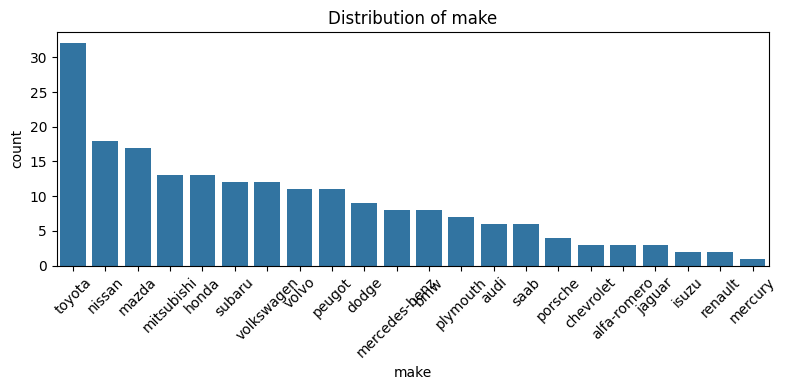

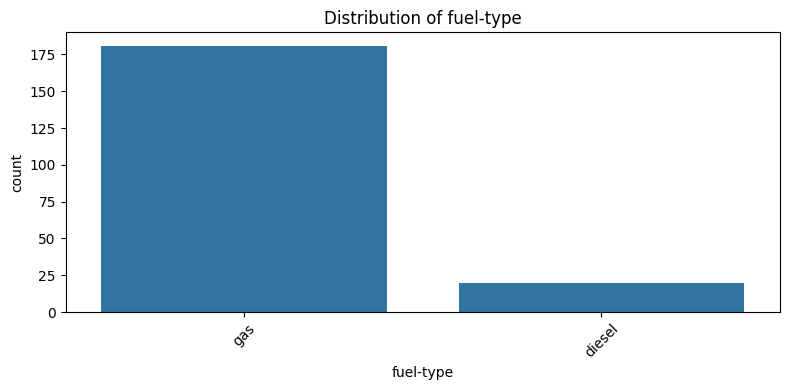

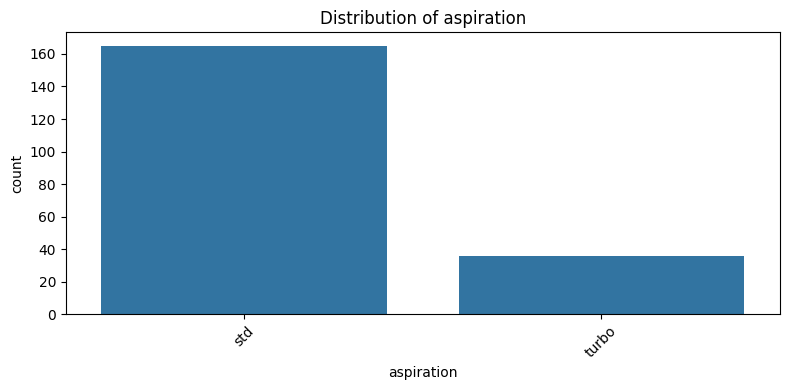

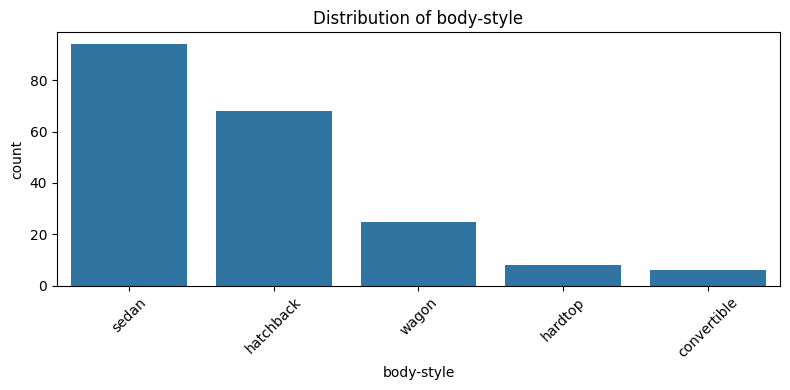

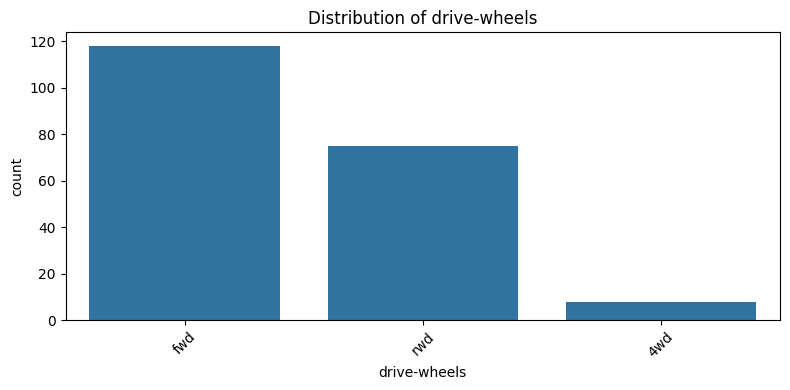

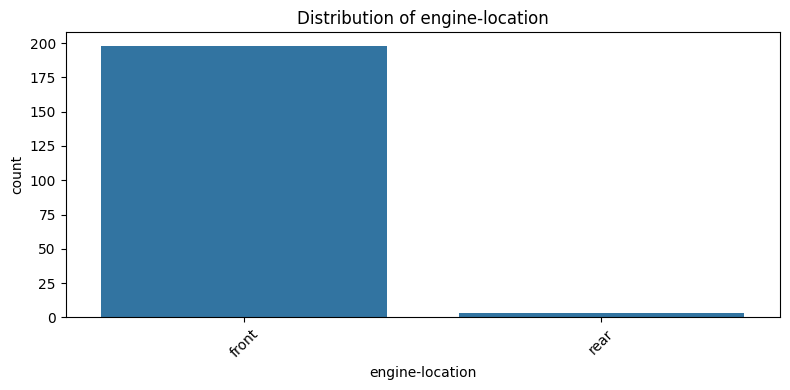

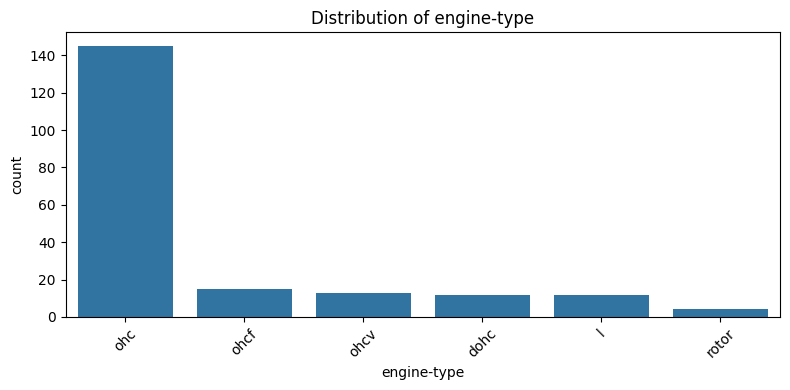

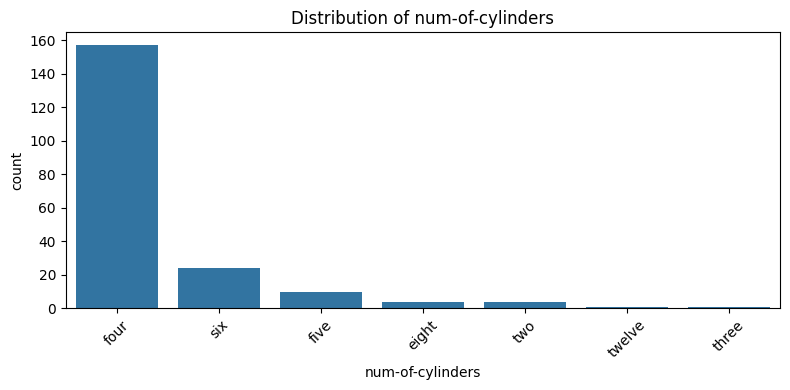

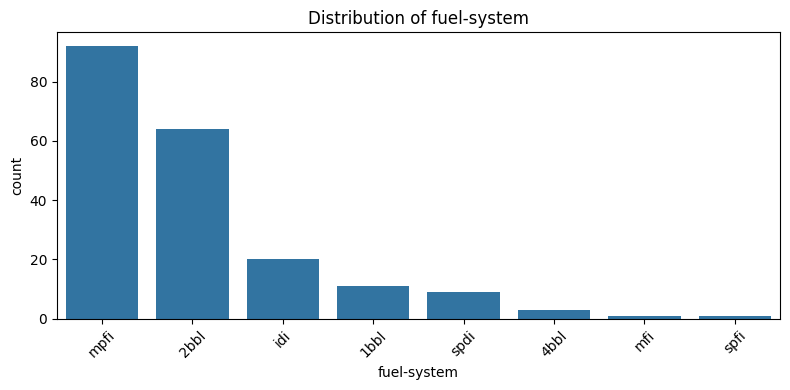

In [58]:
categorical_features = ['make','fuel-type','aspiration','body-style',
                        'drive-wheels','engine-location','engine-type',
                        'num-of-cylinders','fuel-system']

for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

### Make (car brand)

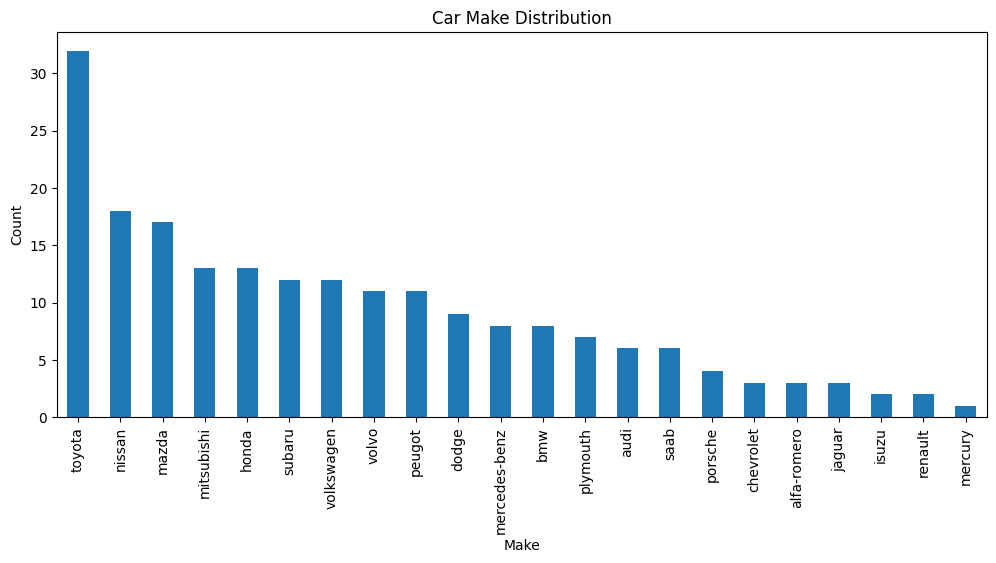

In [59]:
df['make'].value_counts().plot(kind='bar', figsize=(12,5), title='Car Make Distribution')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


### fuel-type
 - What to check: Petrol vs Diesel distribution.

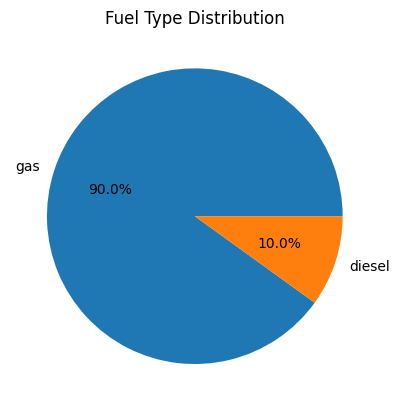

In [60]:
df['fuel-type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Fuel Type Distribution')
plt.ylabel('')
plt.show()

### body-style
- What to check:Popular car body types (sedan, hatchback, etc.)

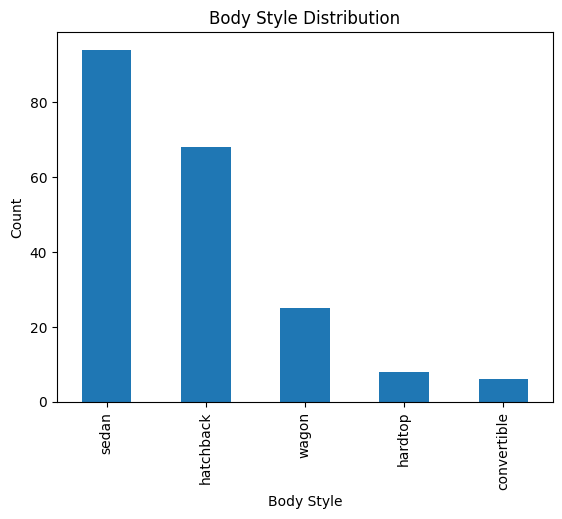

In [61]:
df['body-style'].value_counts().plot(kind='bar', title='Body Style Distribution')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()


### drive-wheels
- What to check: FWD, RWD, 4WD frequency.

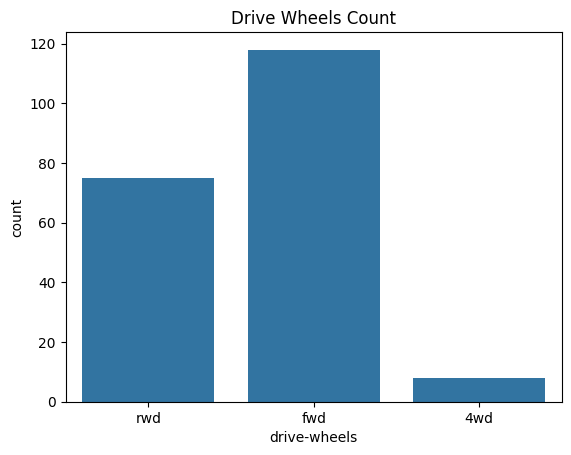

In [62]:
sns.countplot(data=df, x='drive-wheels')
plt.title('Drive Wheels Count')
plt.show()

### engine-location
- What to check: Most cars likely have front engine.

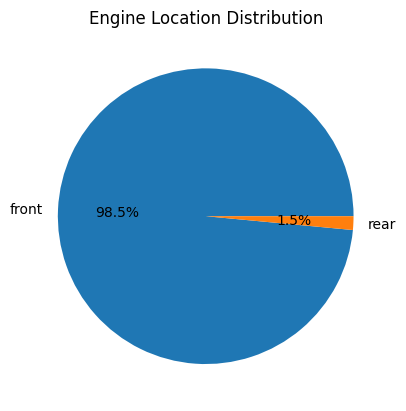

In [63]:
df['engine-location'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Engine Location Distribution')
plt.ylabel('')
plt.show()

### engine-type
- What to check: Frequency of each engine type (ohc, ohcv, etc.)

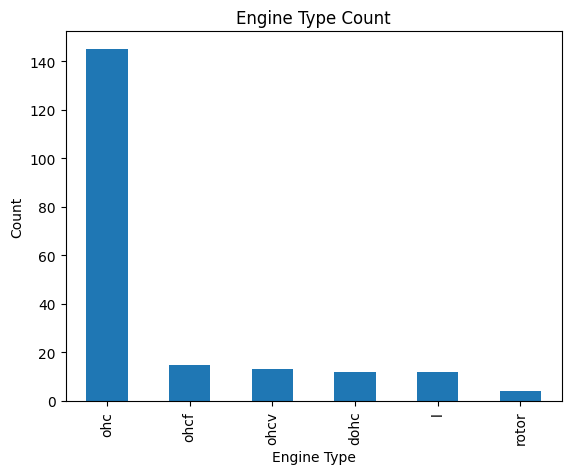

In [64]:
df['engine-type'].value_counts().plot(kind='bar', title='Engine Type Count')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.show()

### num-of-cylinders
- What to check:Distribution of cylinder count (already discussed).

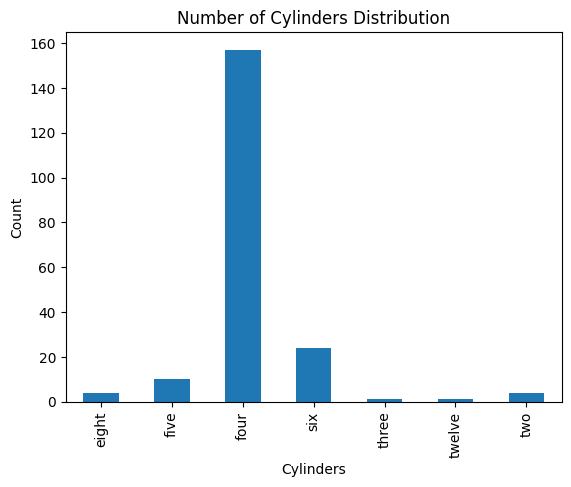

In [65]:
df['num-of-cylinders'].value_counts().sort_index().plot(kind='bar', title='Number of Cylinders Distribution')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.show()

### Fuel-system
- What to check: Most/least used fuel system (mpfi, 2bbl, etc.)

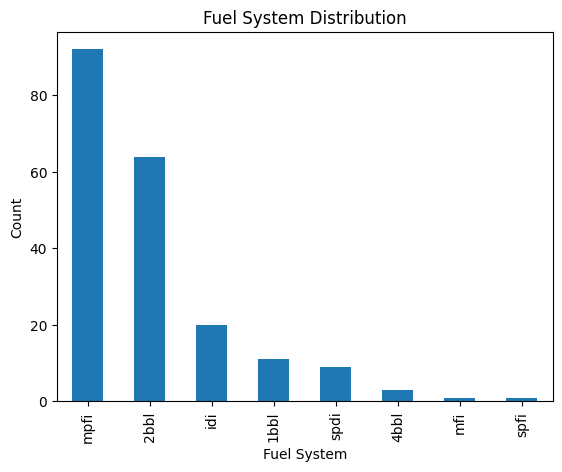

In [66]:
df['fuel-system'].value_counts().plot(kind='bar', title='Fuel System Distribution')
plt.xlabel('Fuel System')
plt.ylabel('Count')
plt.show()

### Bivariate/Multivariate Analysis

### **We have a target variable like `price` (continuous):**

We’ll do **Bivariate Analysis** of each categorical feature **with respect to price** using:

1. **Box plots** – To see price distribution per category
2. **GroupBy mean/median plots** – To compare average prices
3. **Count plots** – To understand frequency per category

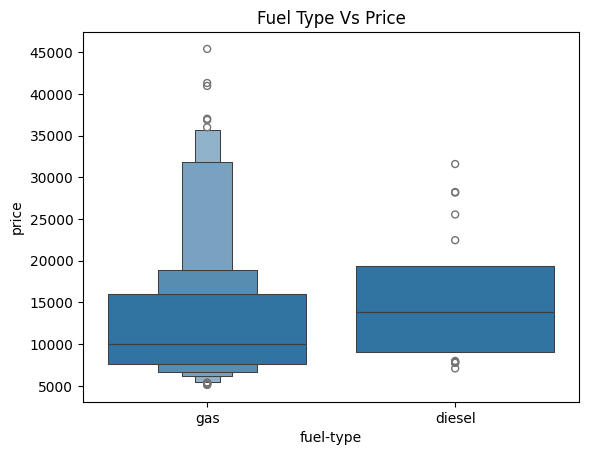

In [67]:
sns.boxenplot(x='fuel-type',y='price',data=df)
plt.title('Fuel Type Vs Price')
plt.show()

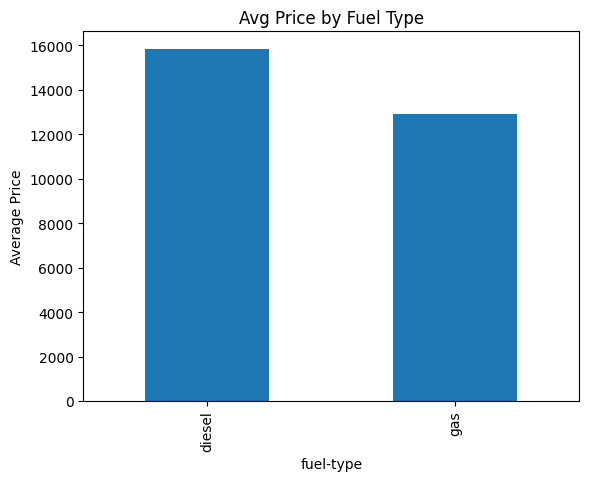

In [68]:
df.groupby('fuel-type')['price'].mean().plot(kind='bar',title='Avg Price by Fuel Type')
plt.ylabel('Average Price')
plt.show()

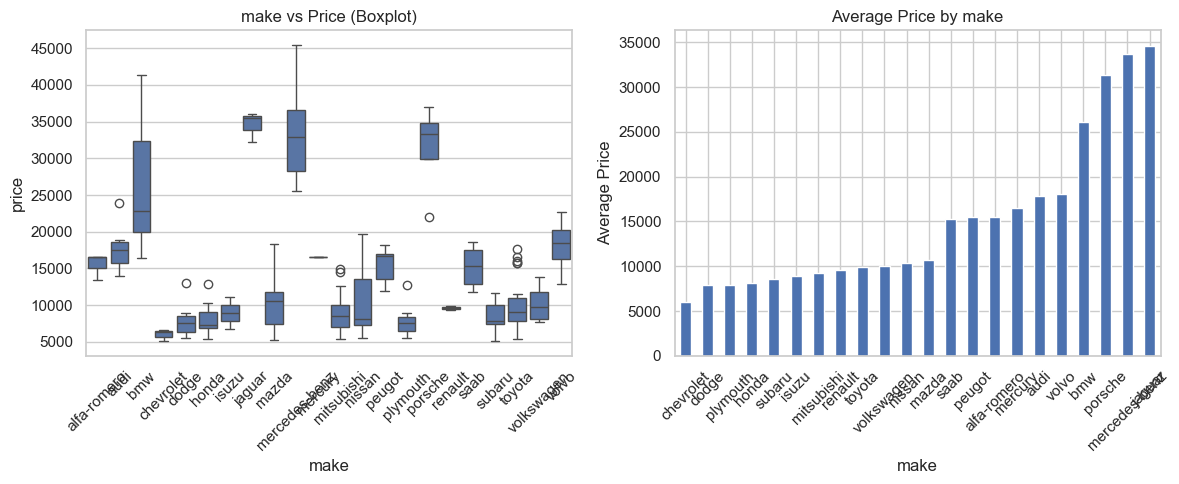

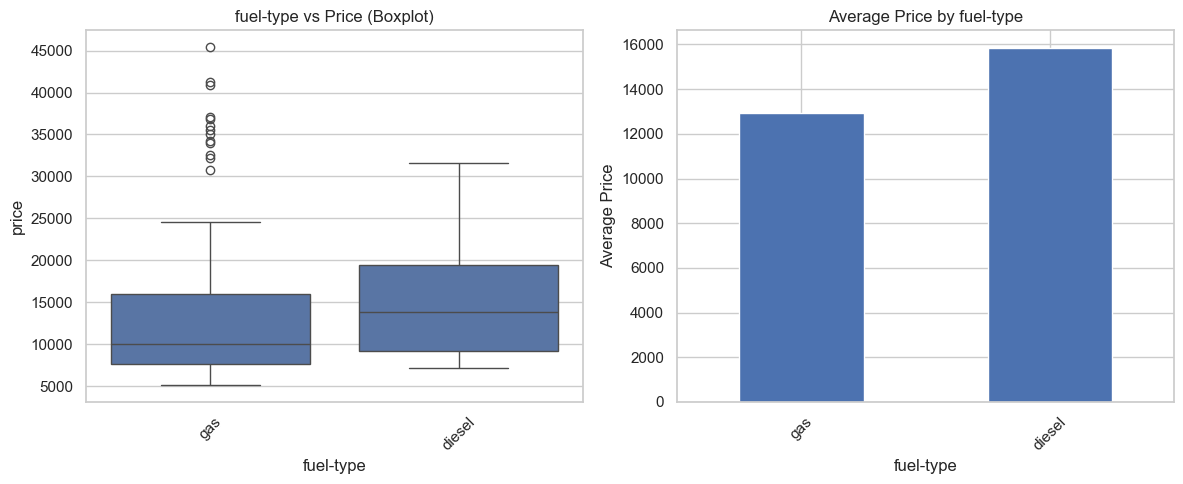

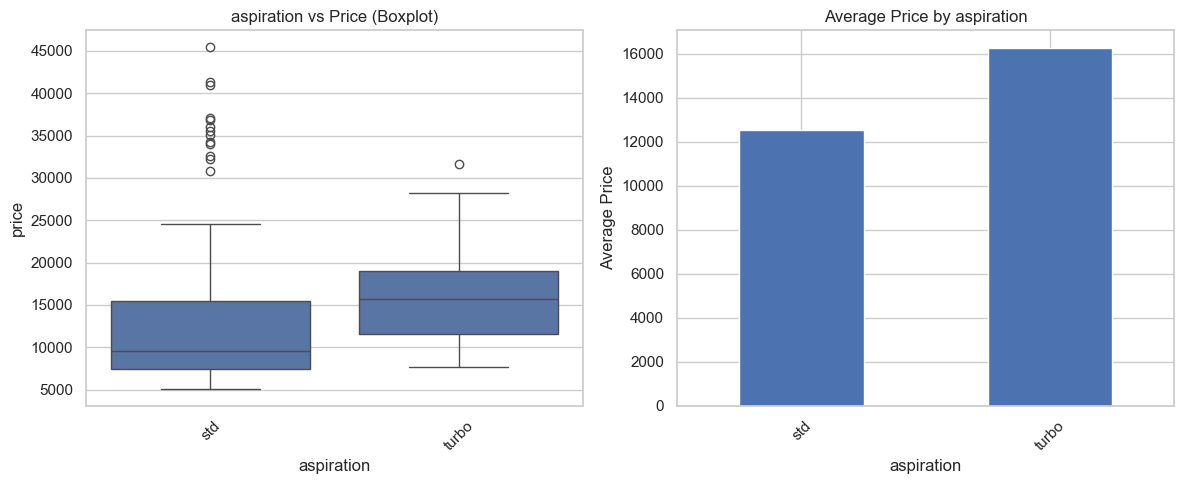

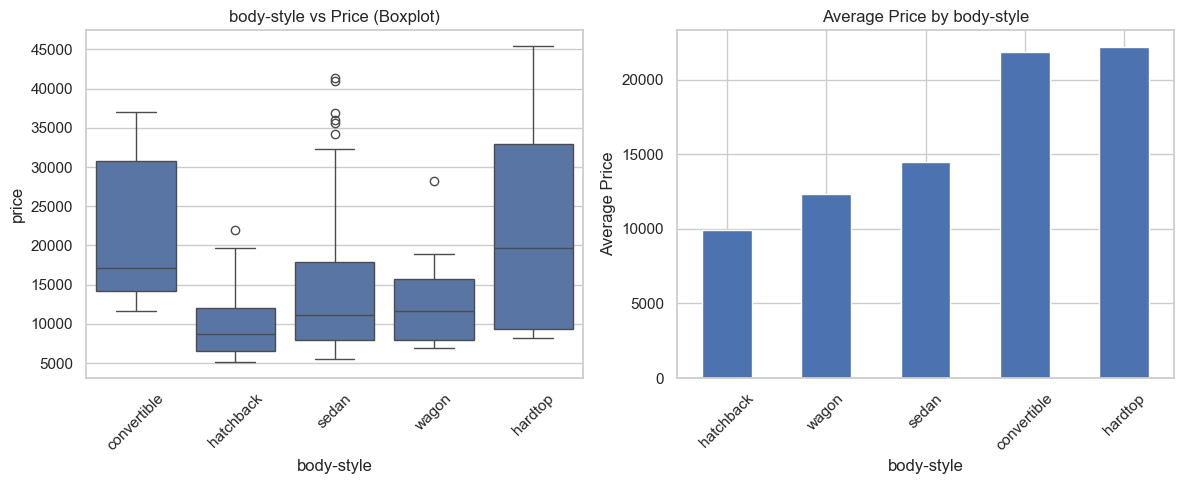

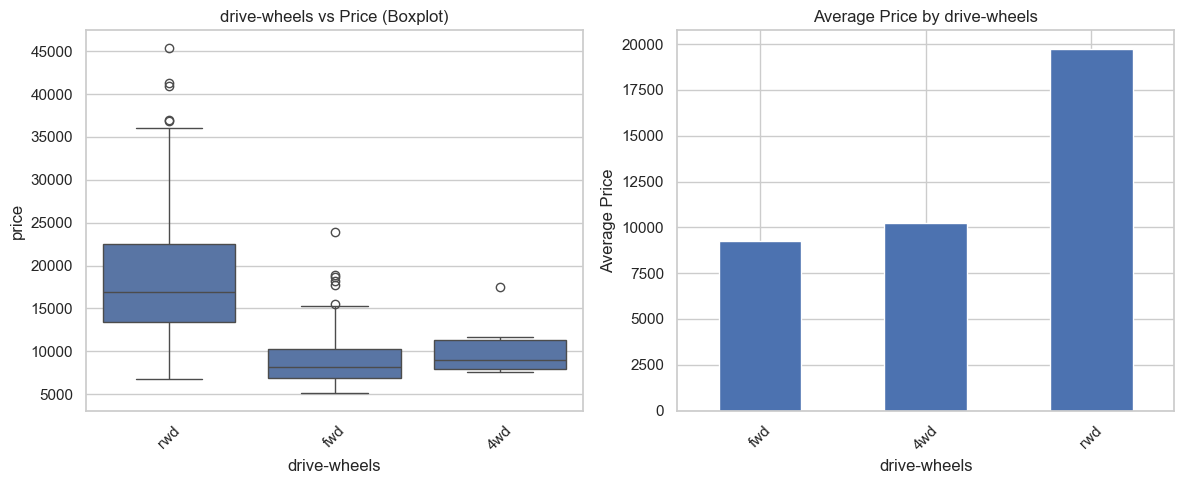

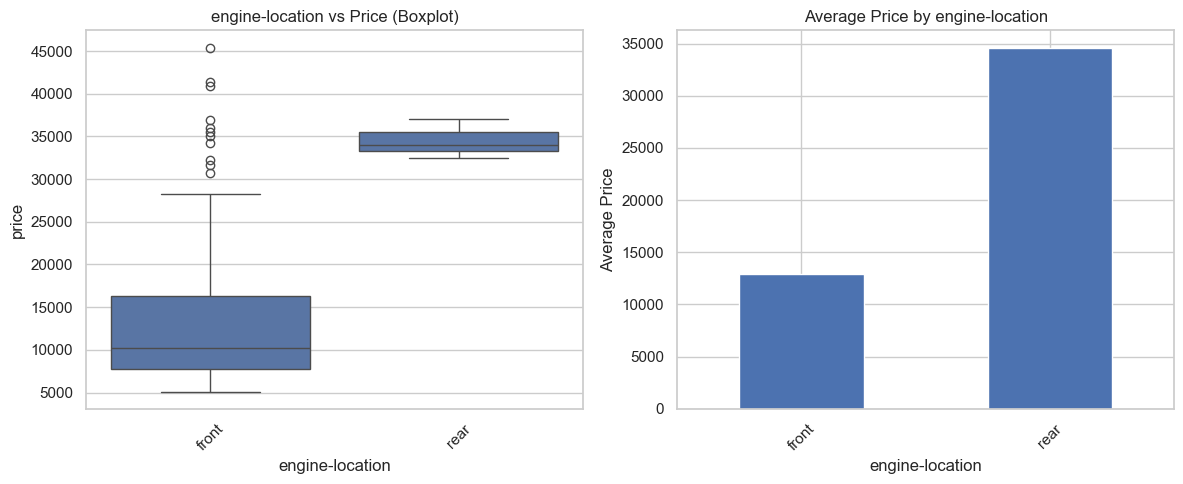

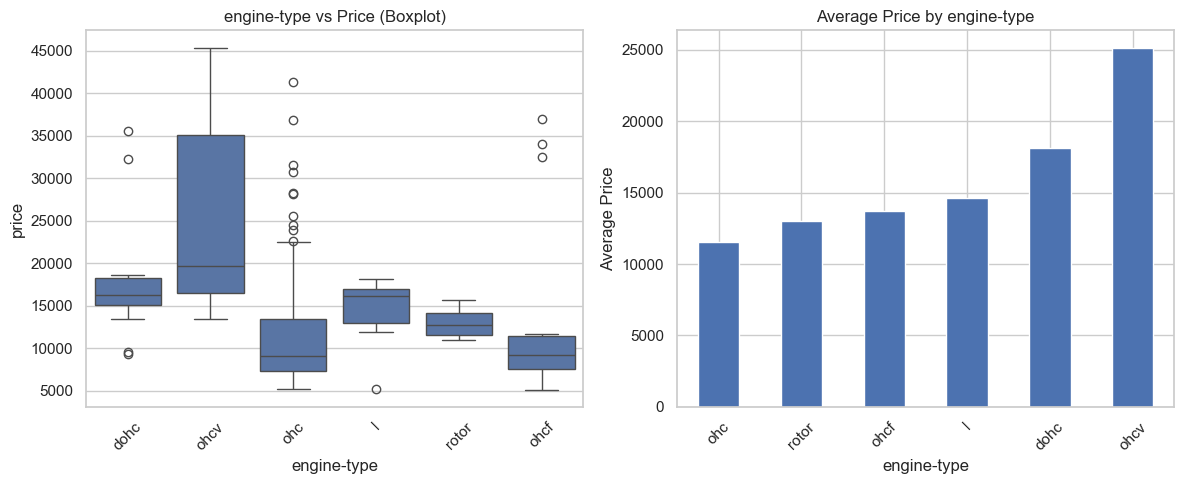

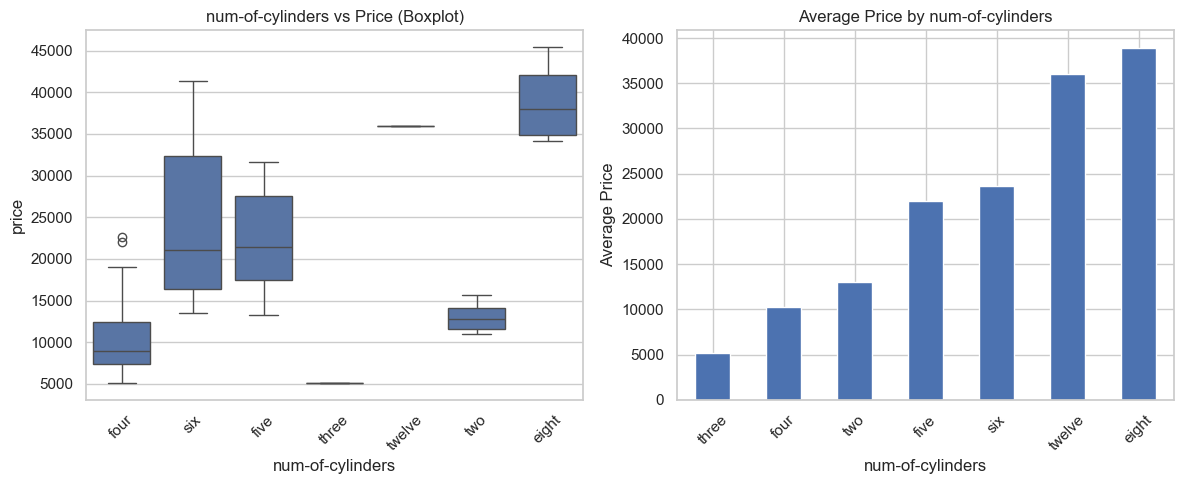

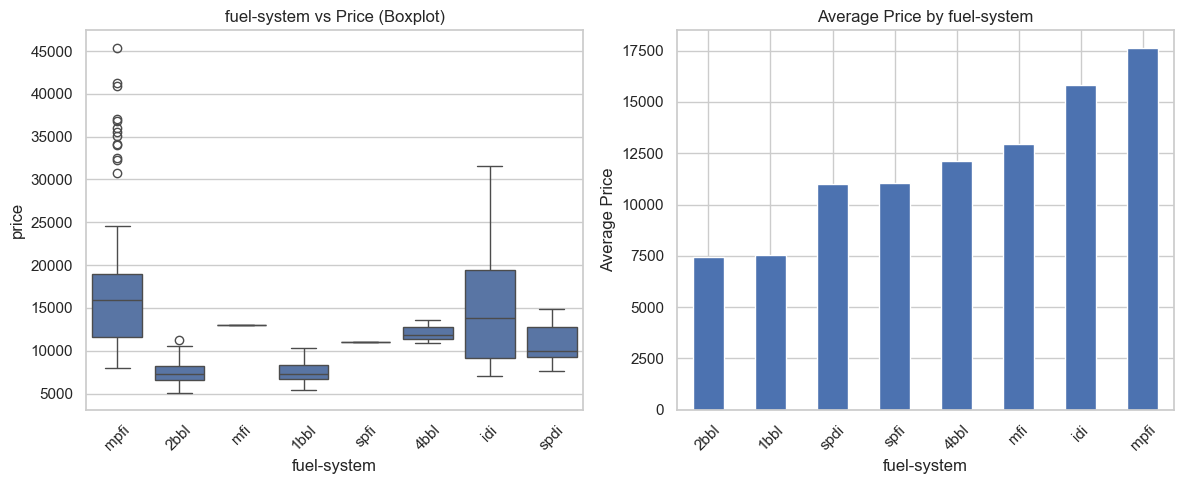

In [70]:
# List of categorical features
categorical_features = [
    'make',
    'fuel-type',
    'aspiration',
    'body-style',
    'drive-wheels',
    'engine-location',
    'engine-type',
    'num-of-cylinders',
    'fuel-system'
]

# Set plot style
sns.set(style="whitegrid")

for feature in categorical_features:
    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=feature, y='price', data=df)
    plt.xticks(rotation=45)
    plt.title(f'{feature} vs Price (Boxplot)')

    # Bar plot of mean prices
    plt.subplot(1, 2, 2)
    df.groupby(feature)['price'].mean().sort_values().plot(kind='bar')
    plt.ylabel('Average Price')
    plt.title(f'Average Price by {feature}')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


### Multivariate Analysis

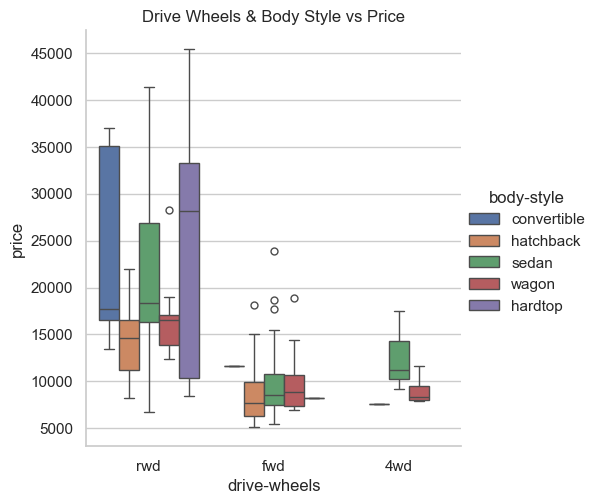

In [71]:
sns.catplot(x='drive-wheels', y='price', hue='body-style', kind='box', data=df)
plt.title('Drive Wheels & Body Style vs Price')
plt.show()

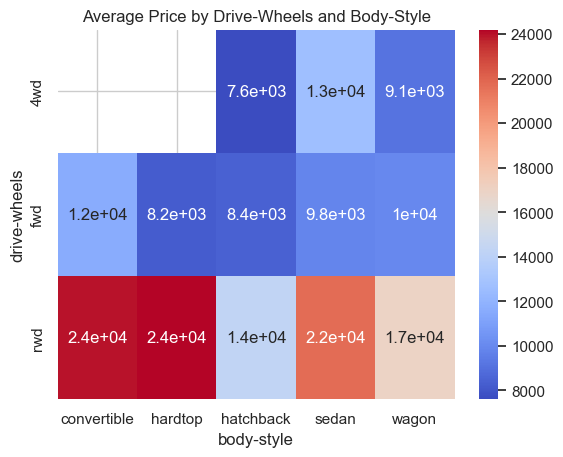

In [72]:
# Pivot table heatmap
pivot = df.pivot_table(index='drive-wheels', columns='body-style', values='price', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Average Price by Drive-Wheels and Body-Style')
plt.show()

- Key Insights to Look For:
    - Does any category have a significantly higher/lower price?
    - Do combinations of features (like drive-wheels + body-style) affect price?
    - Are certain categories dominant (class imbalance)?

In [76]:
# List of categorical features for analysis
cat_features = [
    'make', 'fuel-type', 'aspiration', 'body-style',
    'drive-wheels', 'engine-location', 'engine-type',
    'num-of-cylinders', 'fuel-system'
]

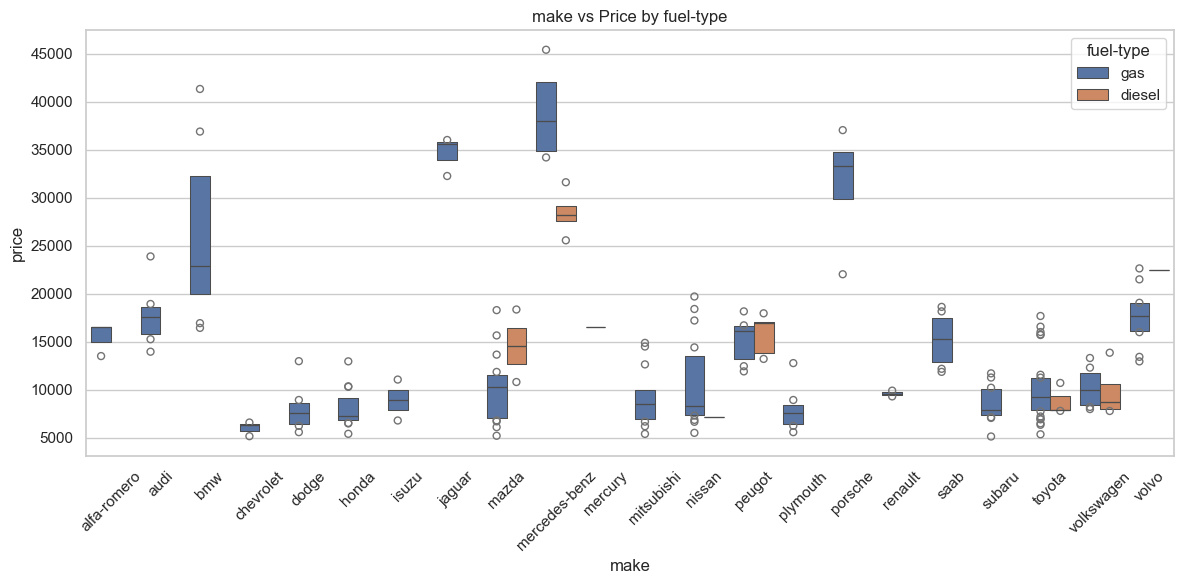

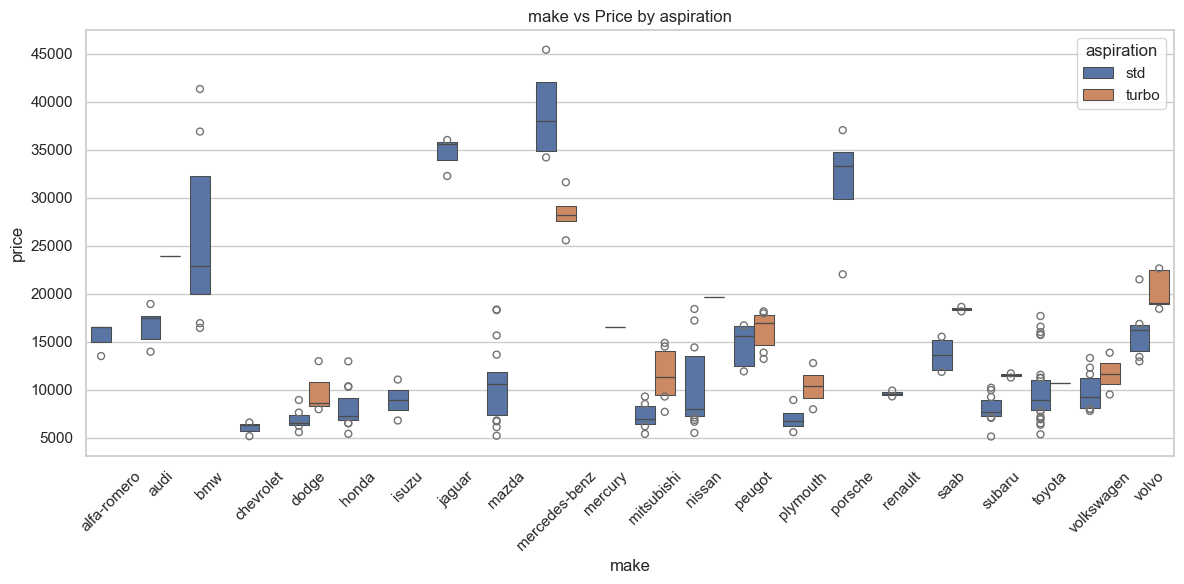

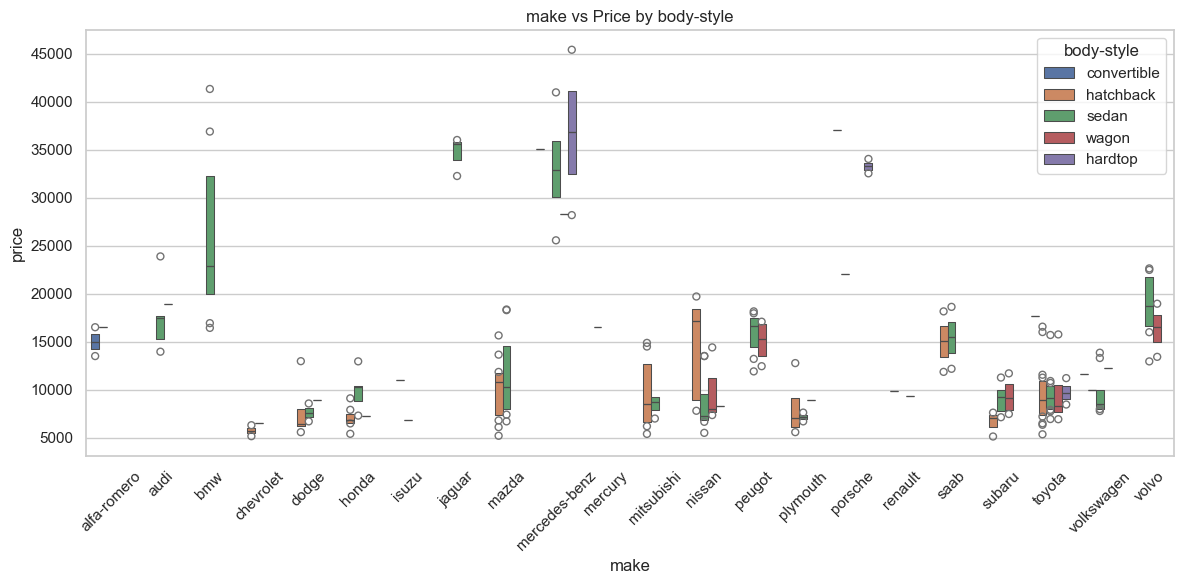

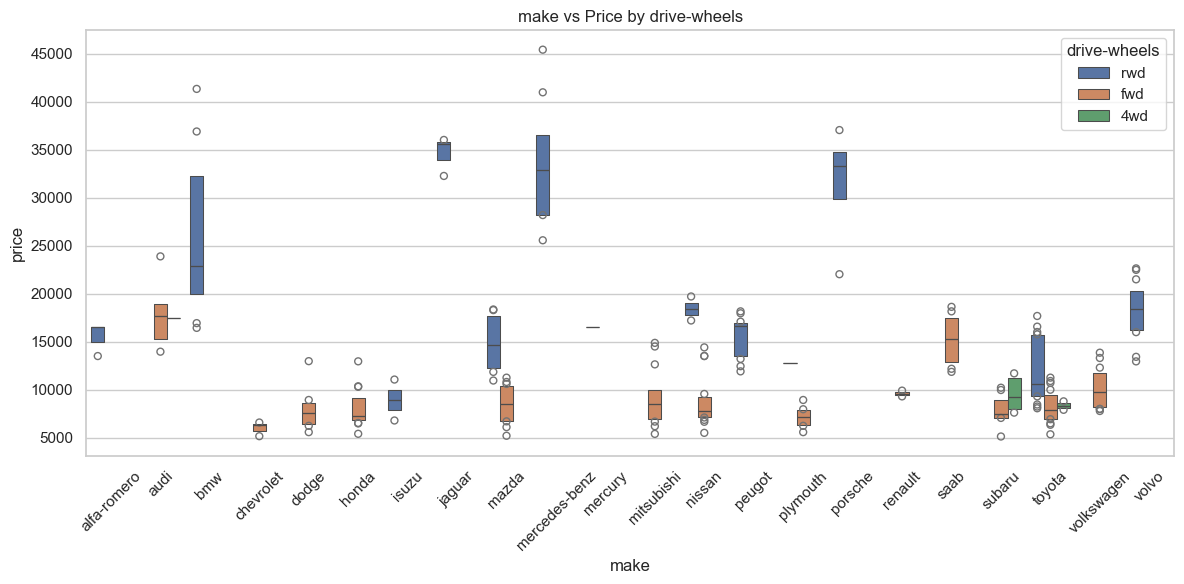

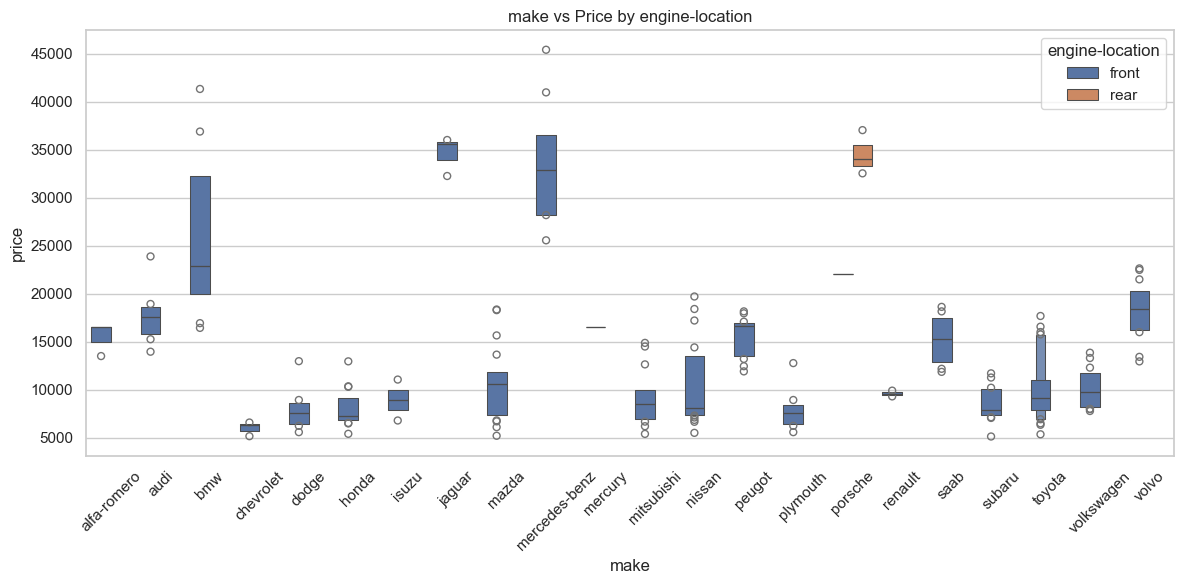

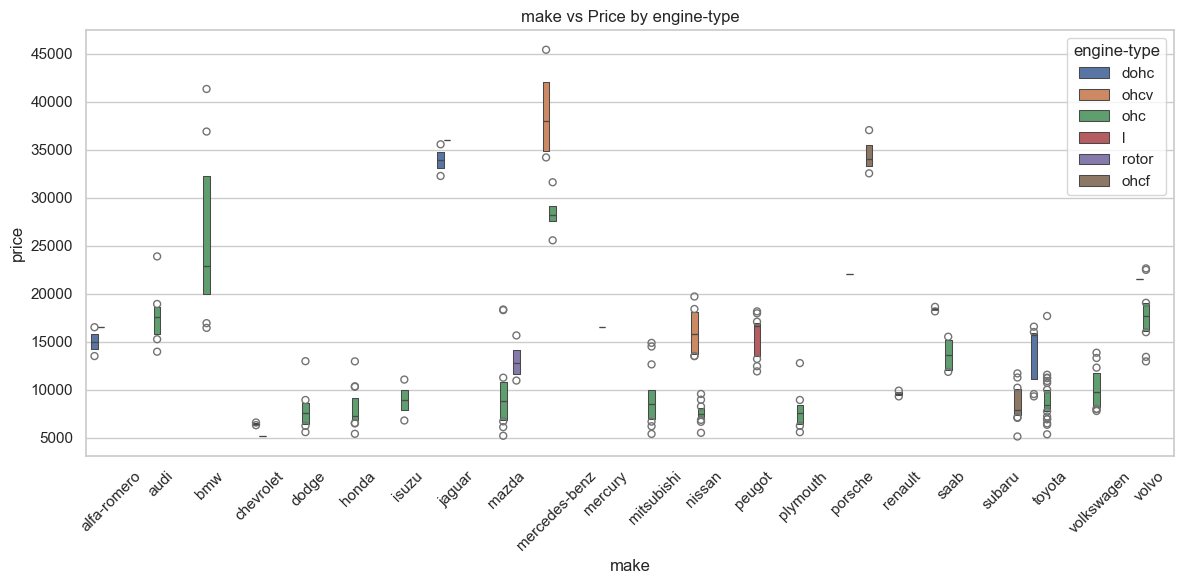

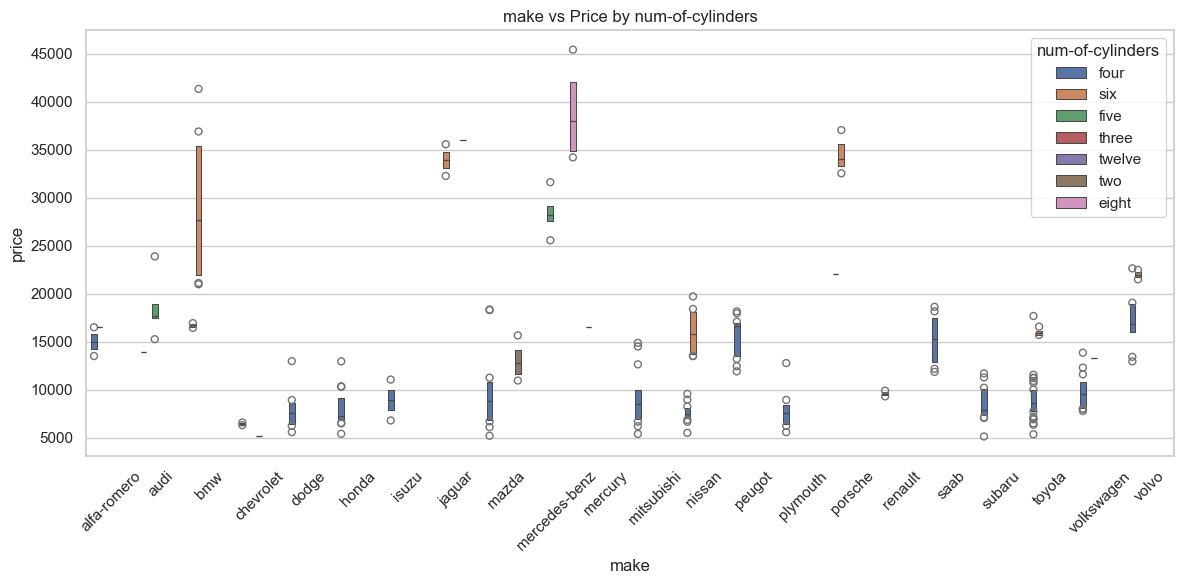

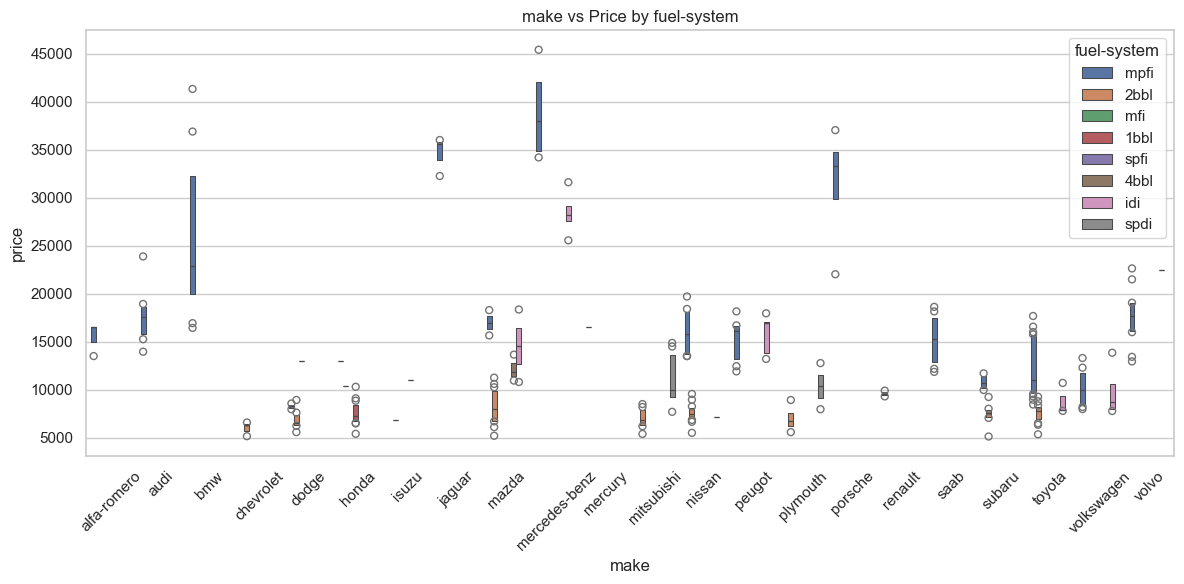

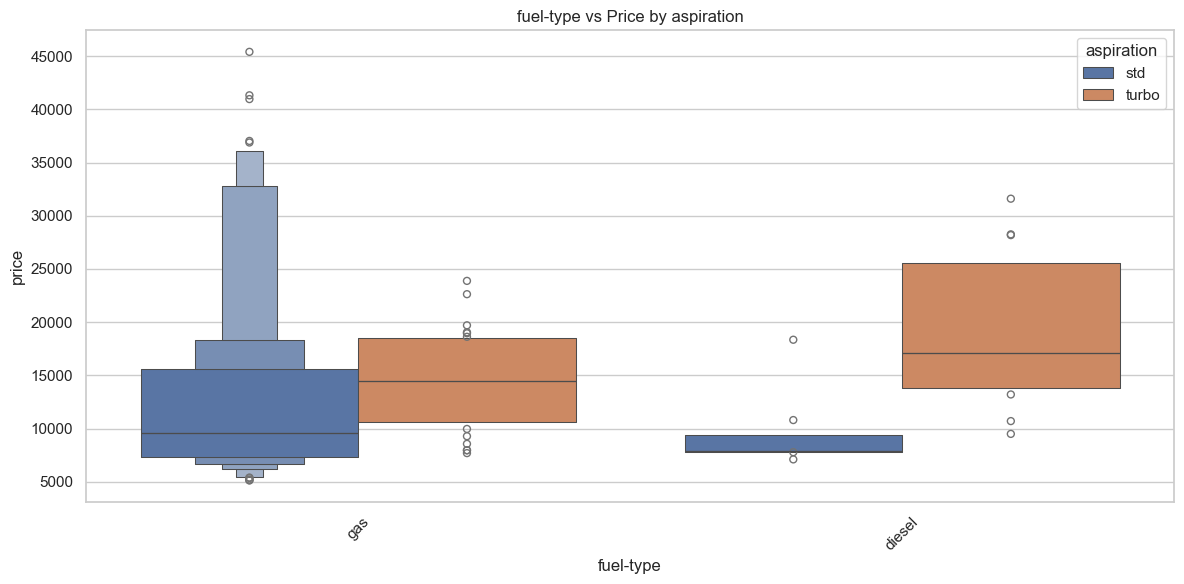

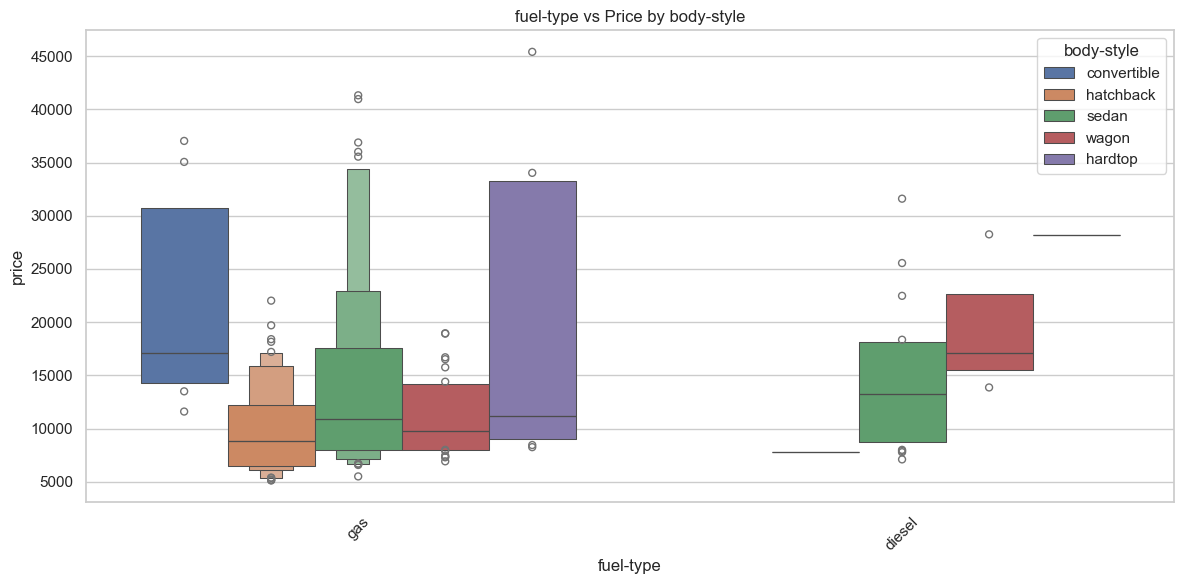

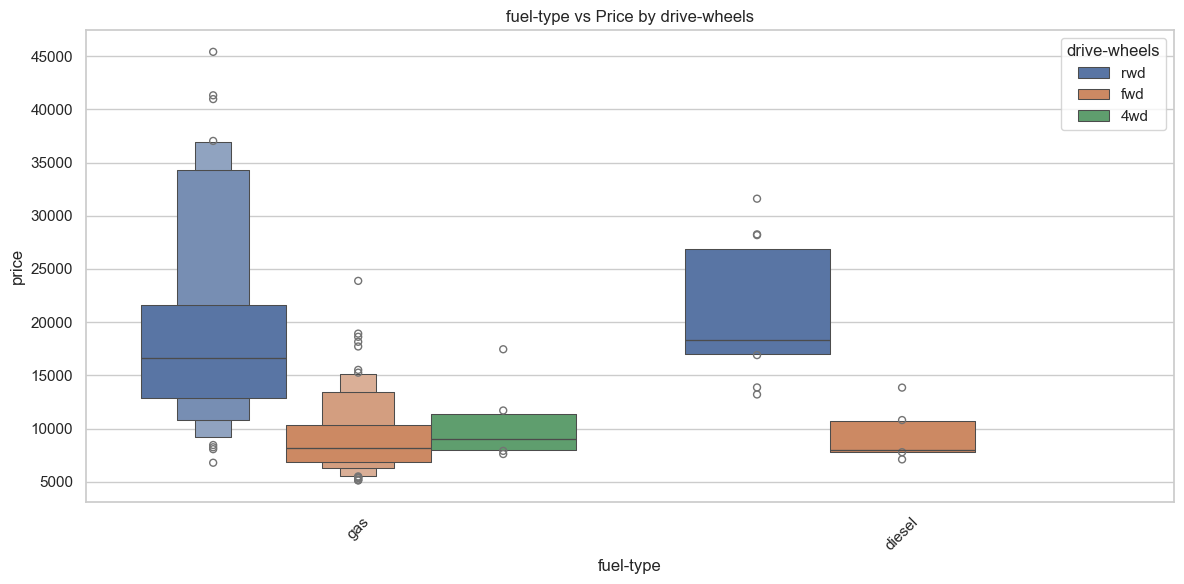

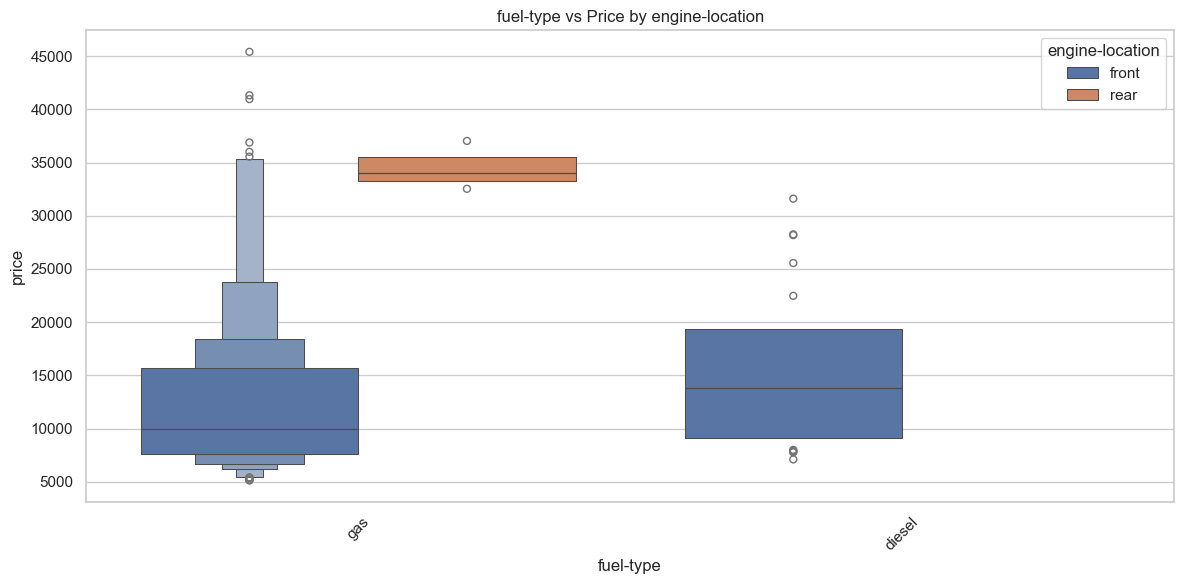

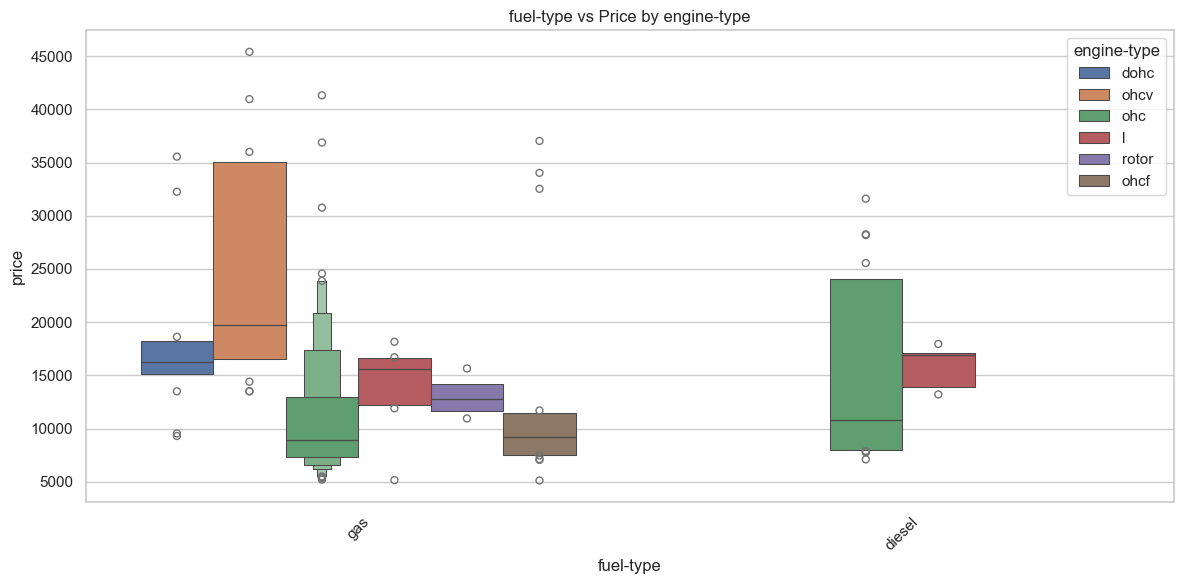

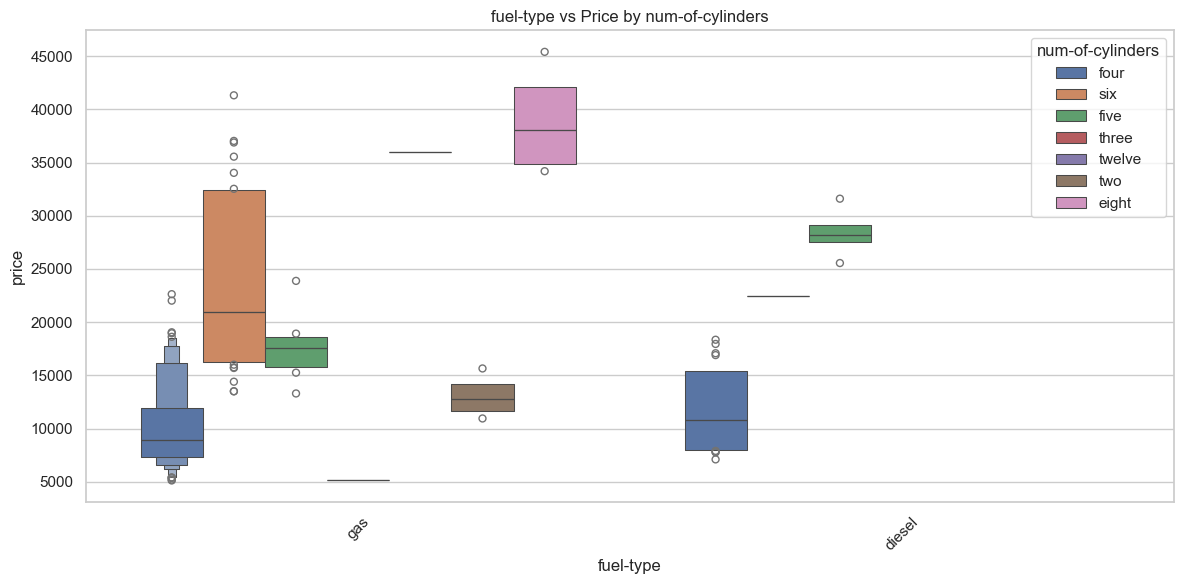

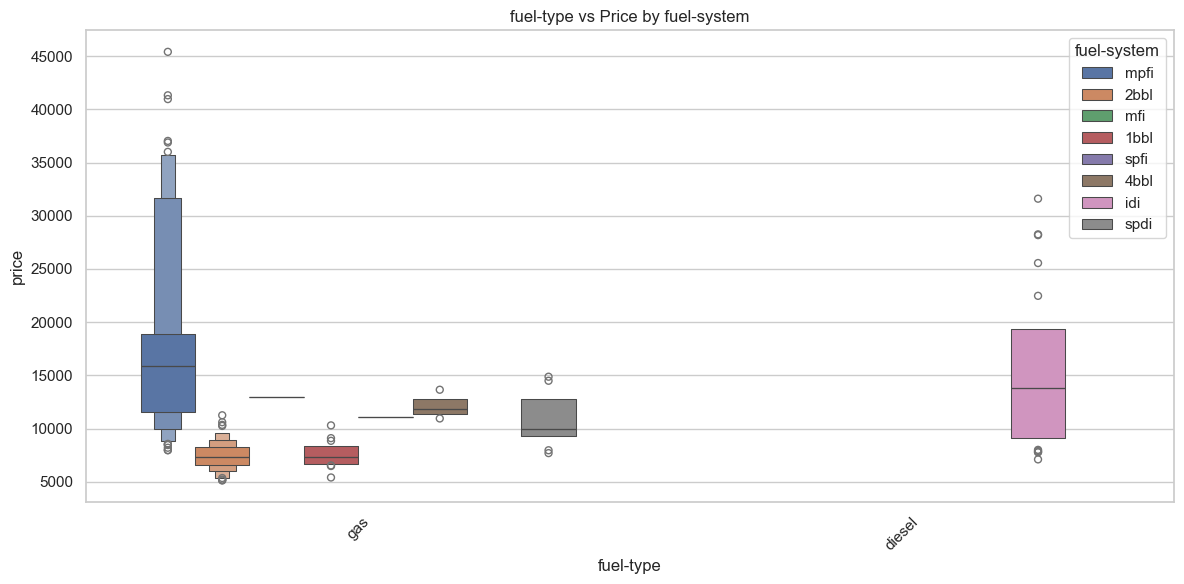

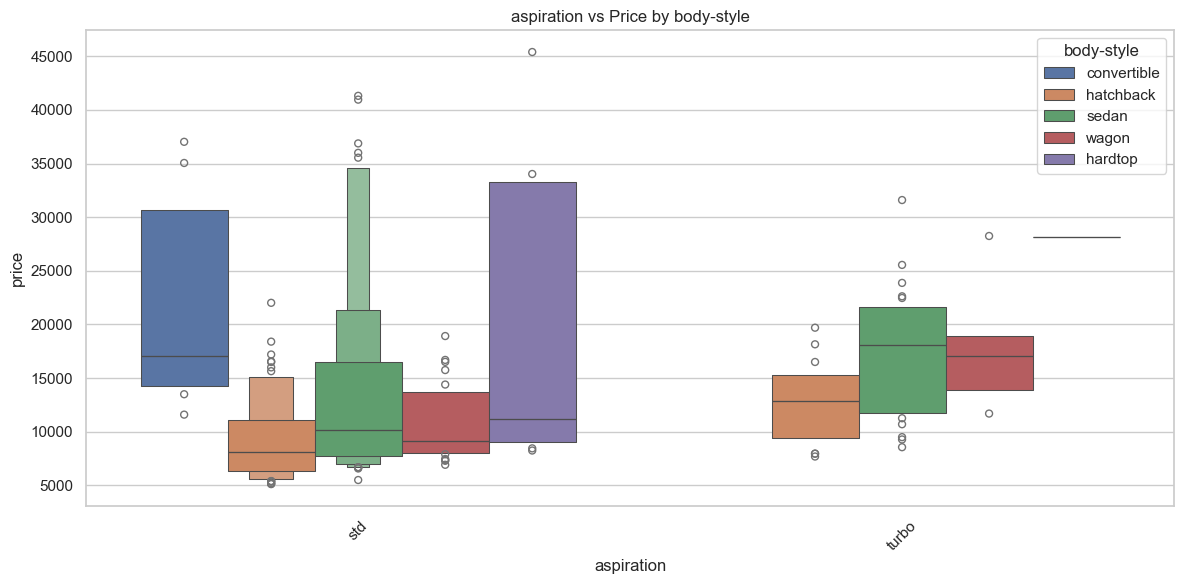

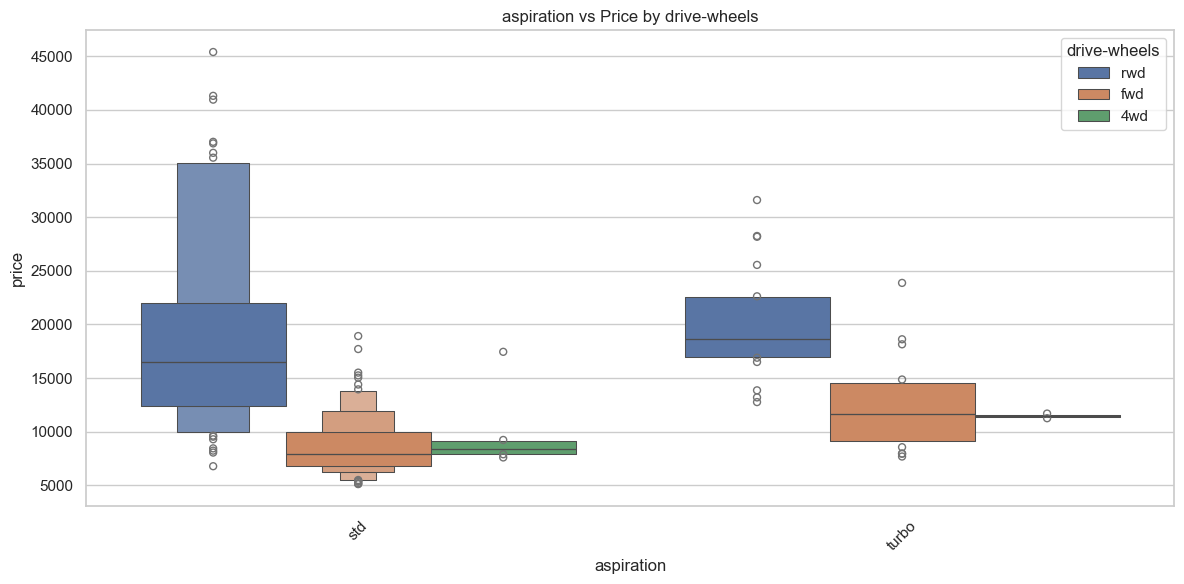

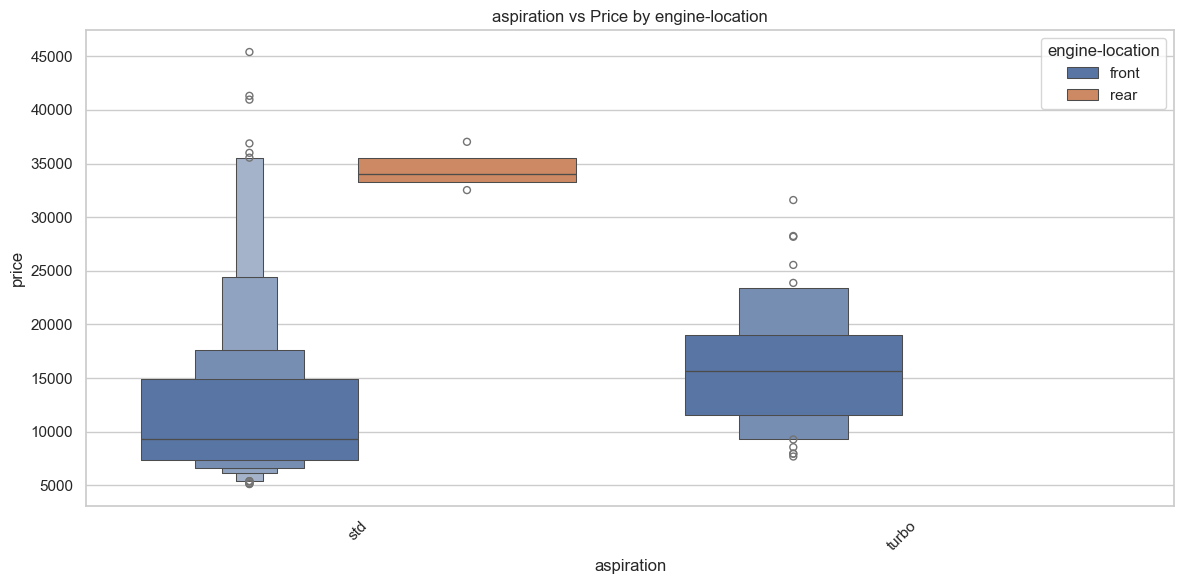

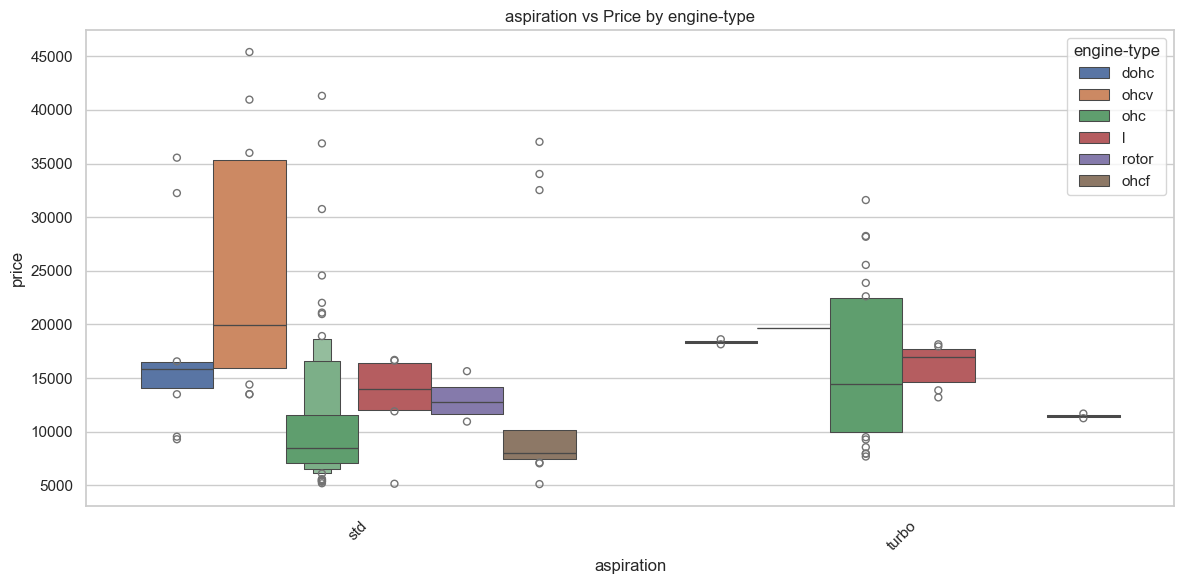

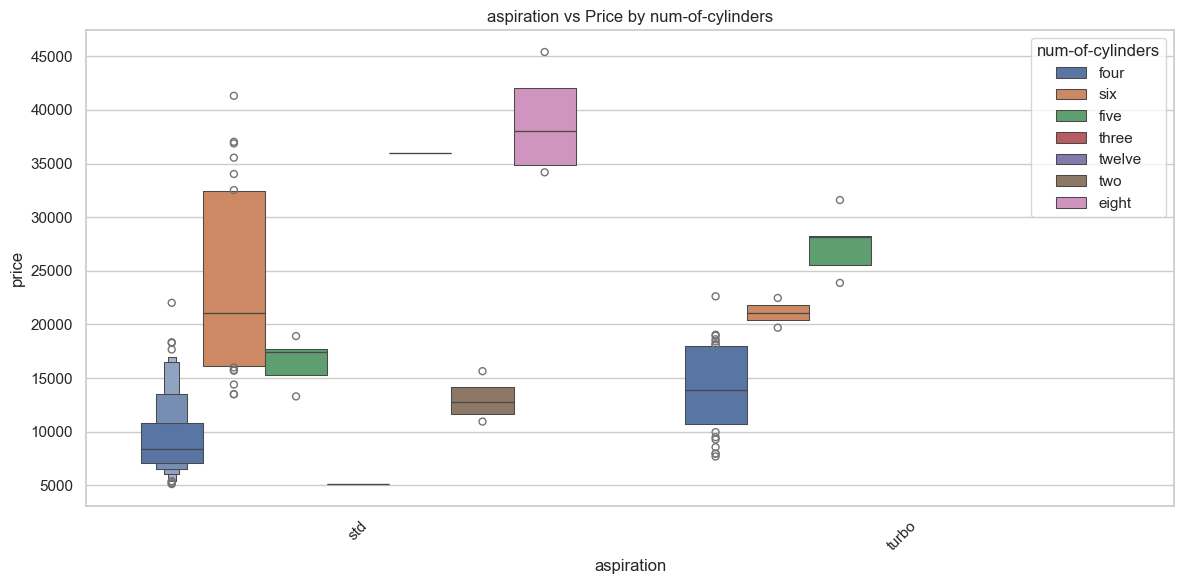

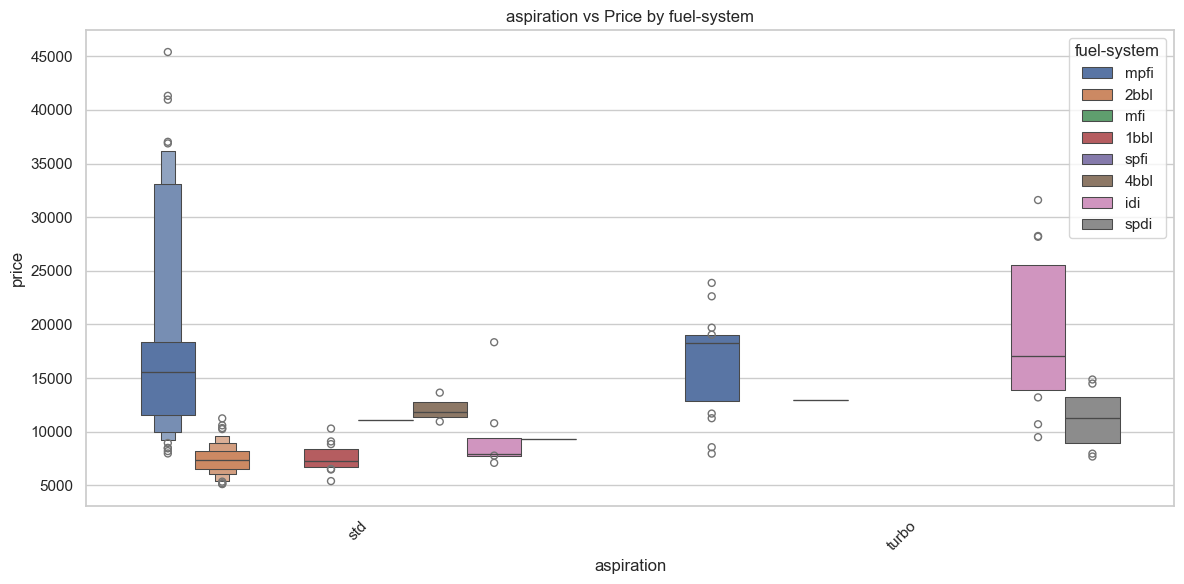

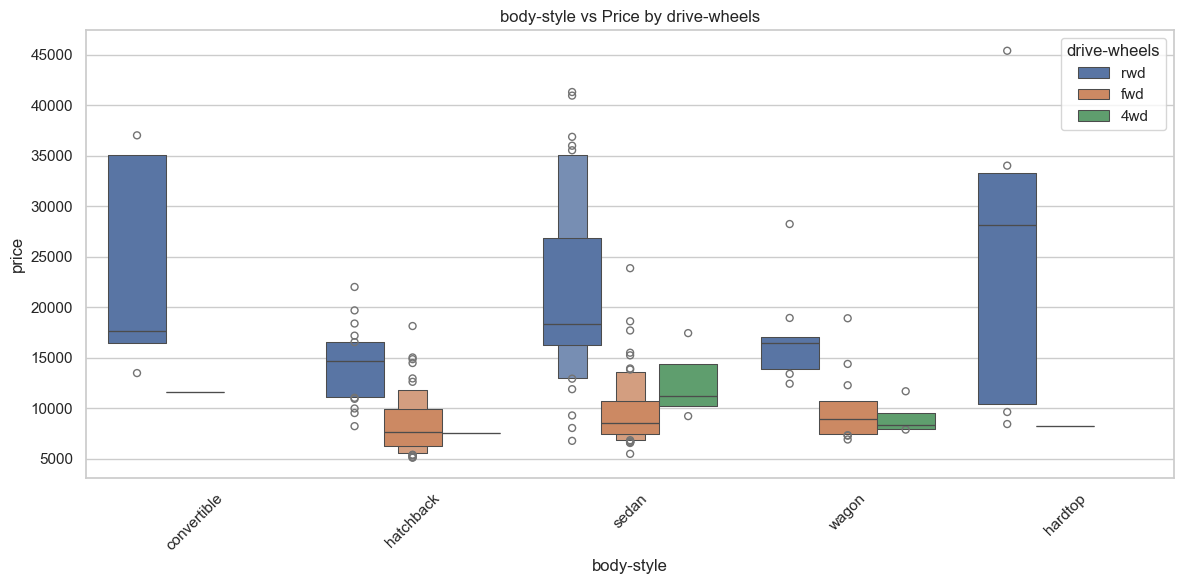

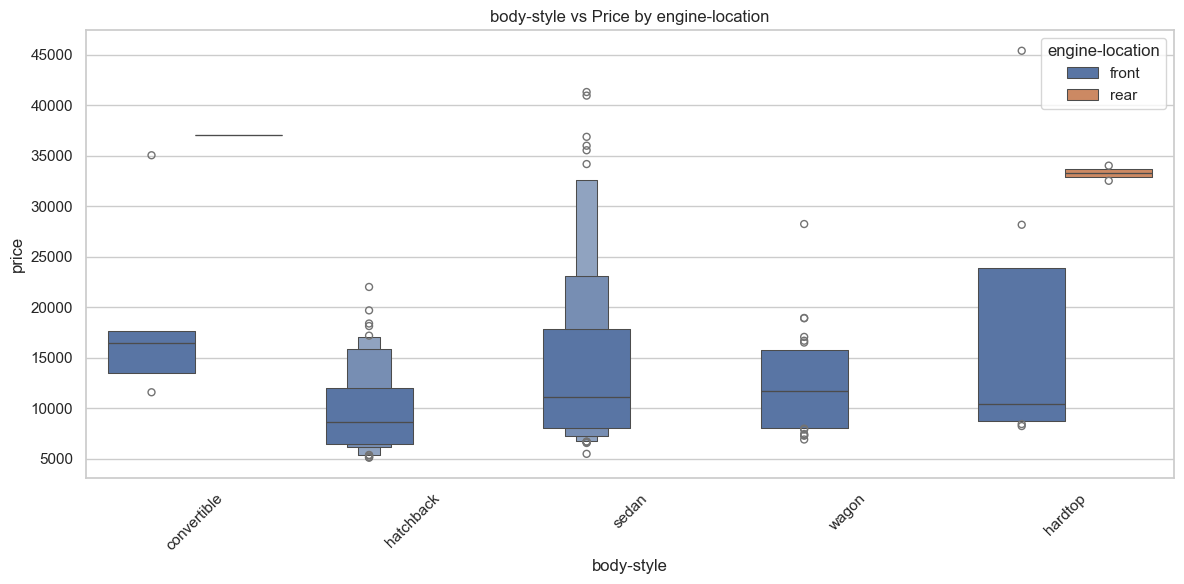

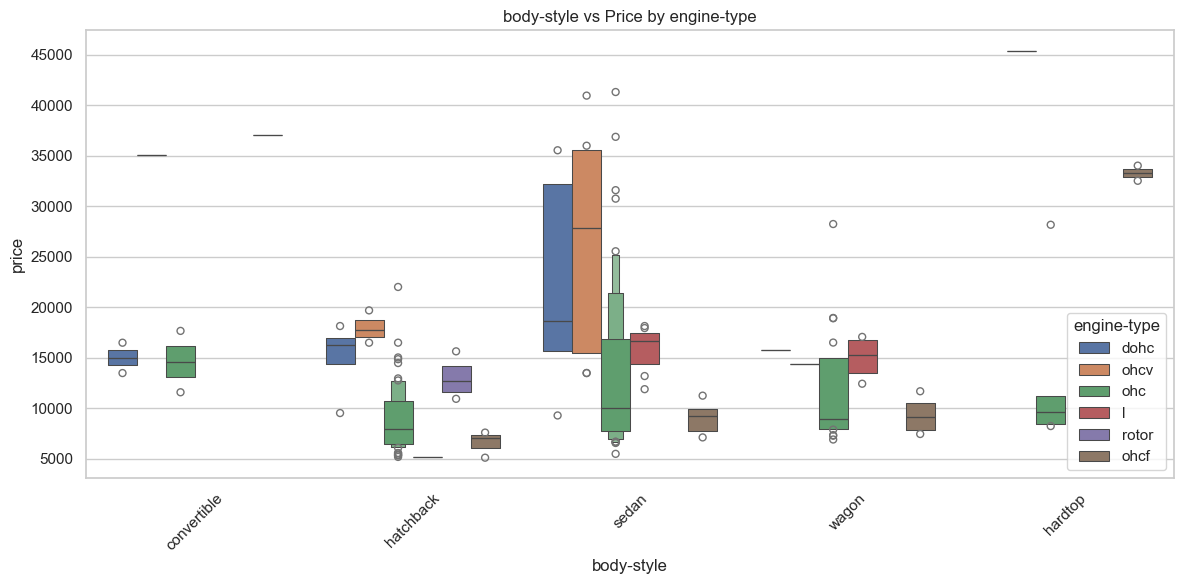

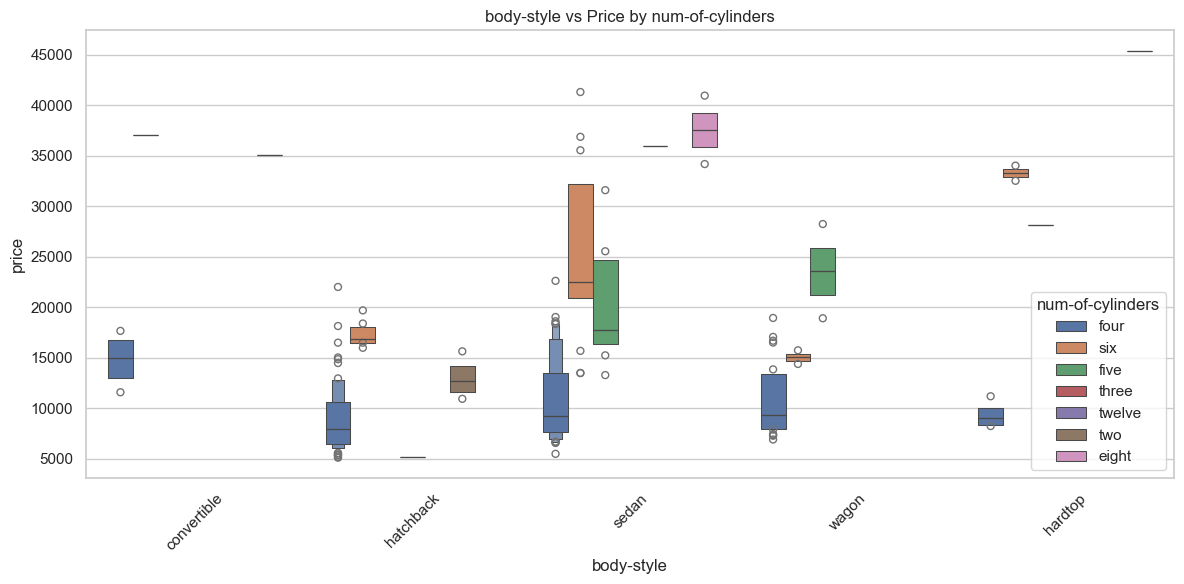

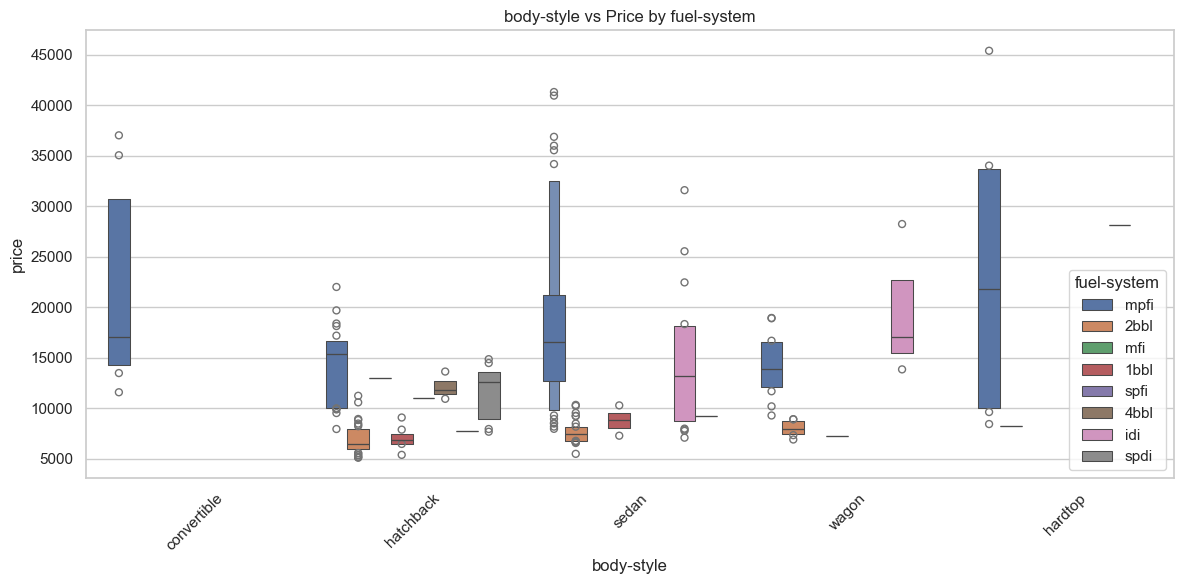

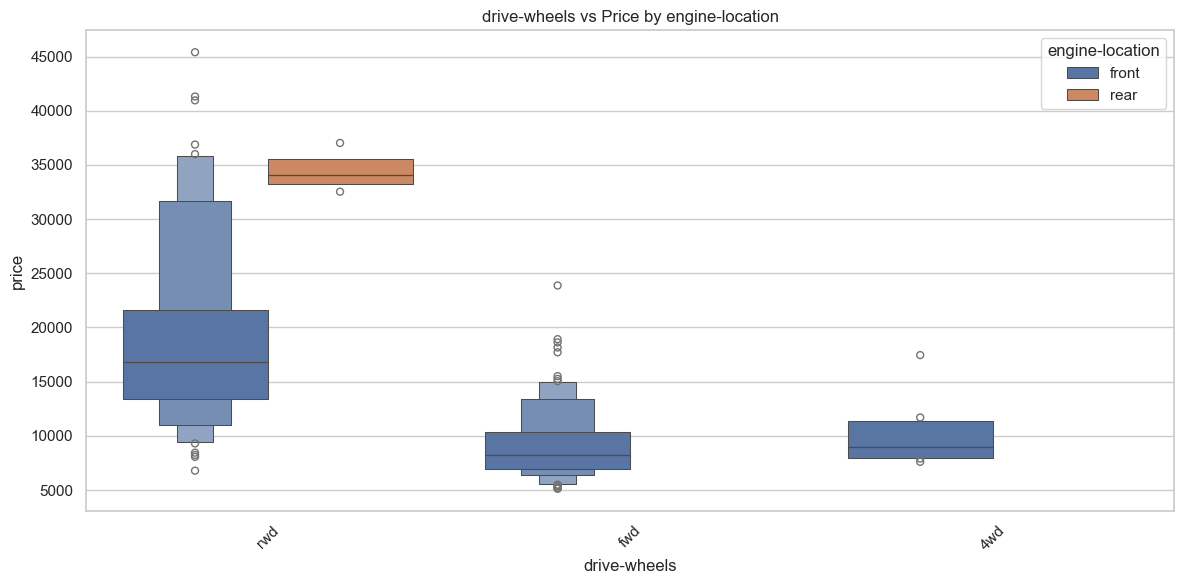

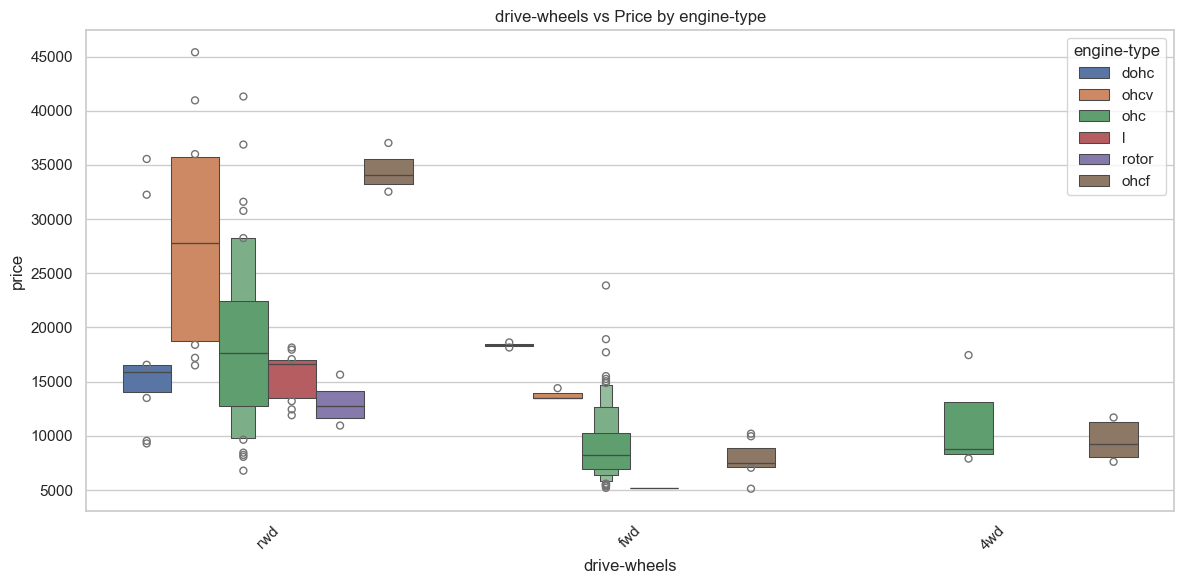

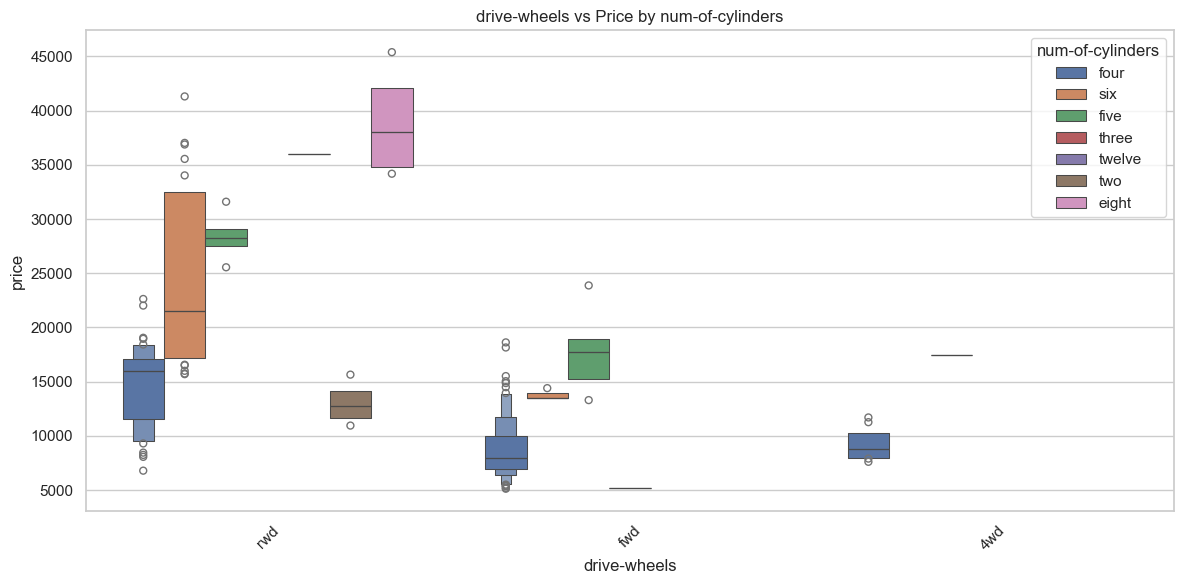

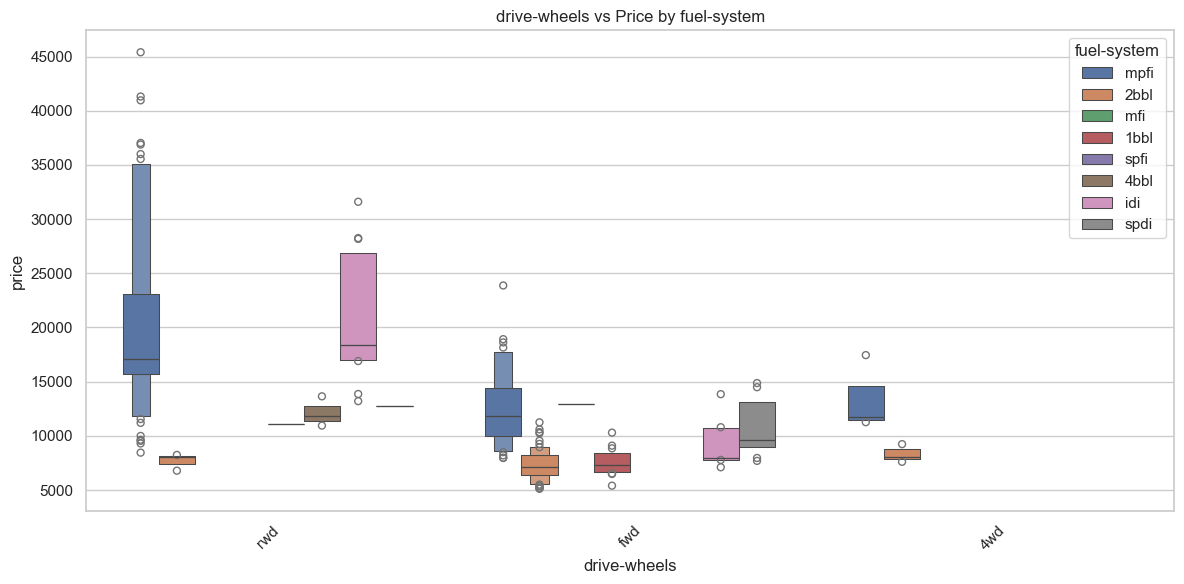

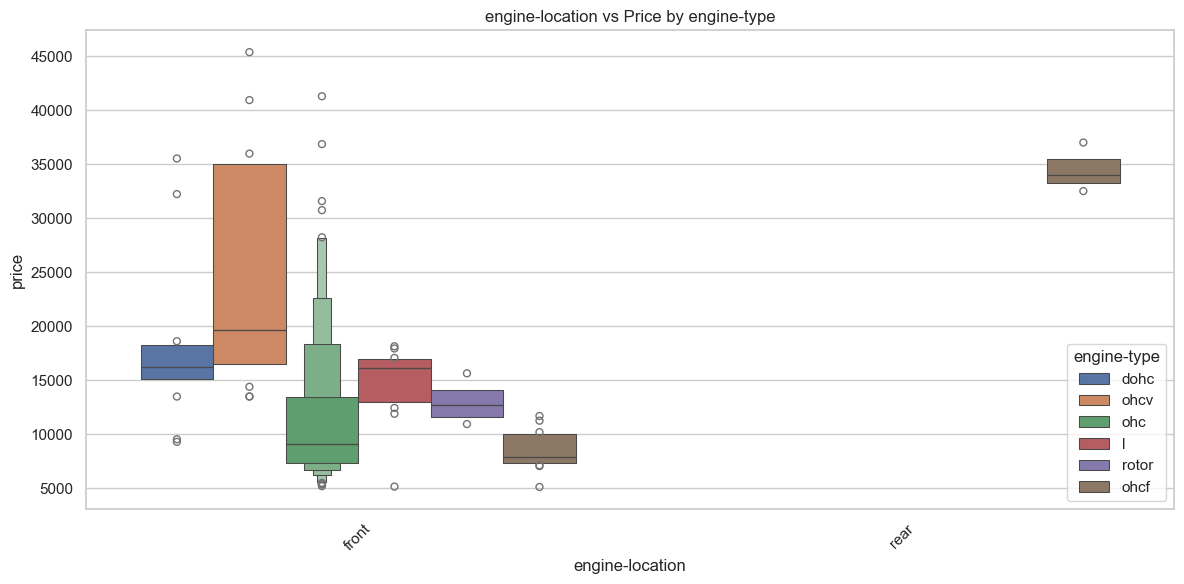

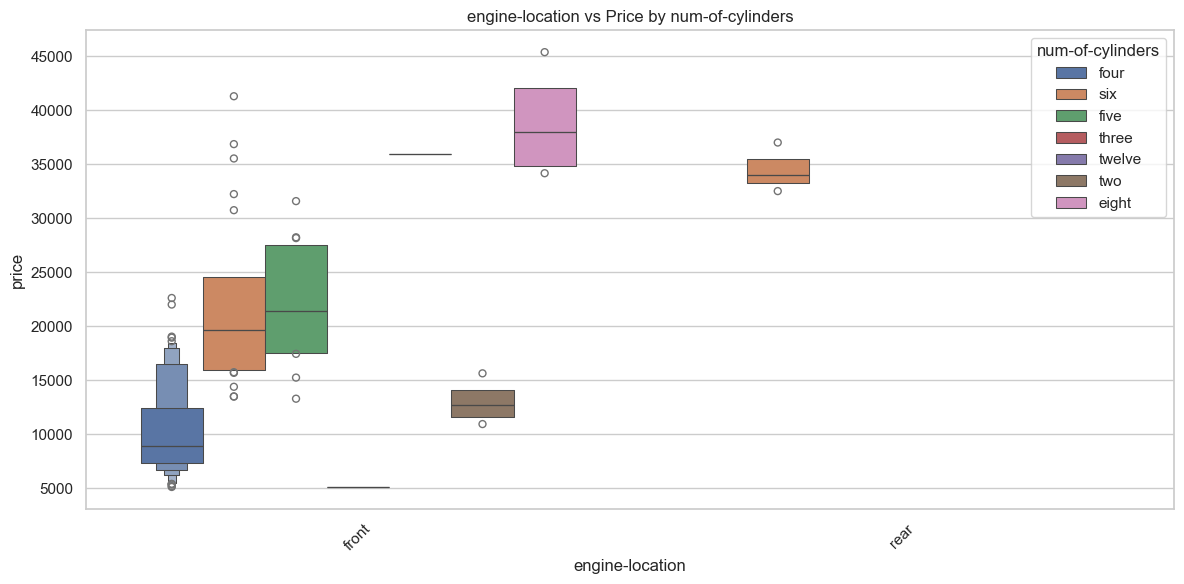

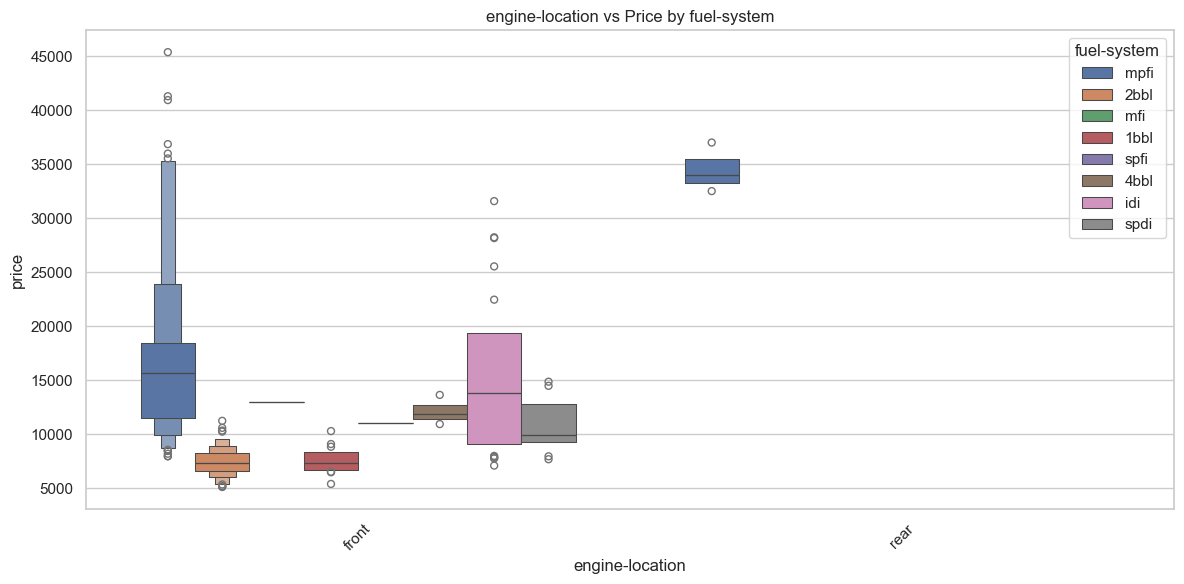

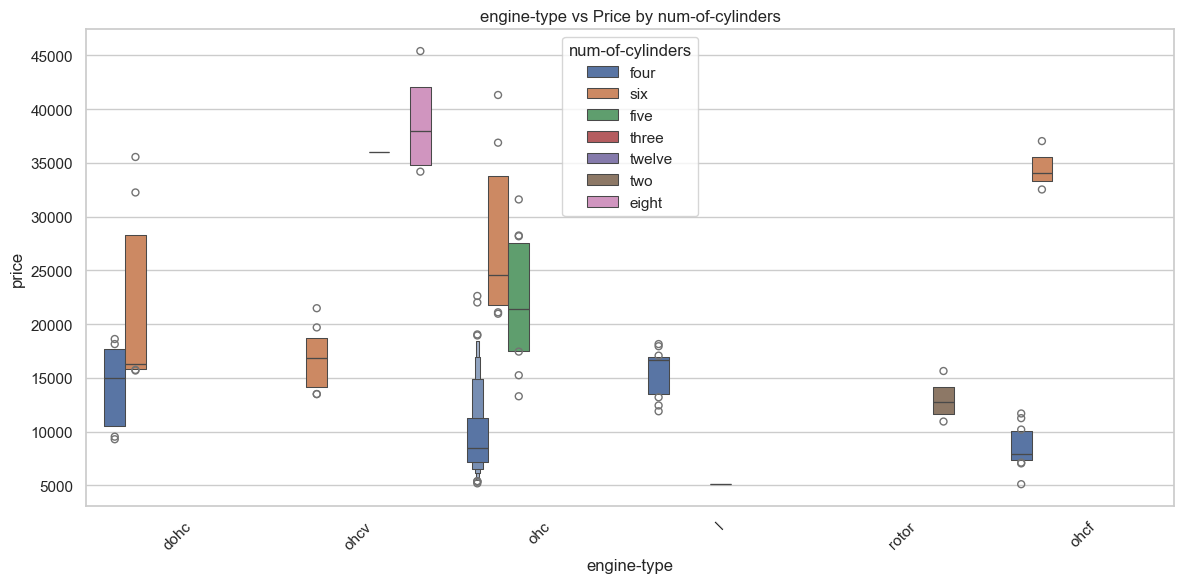

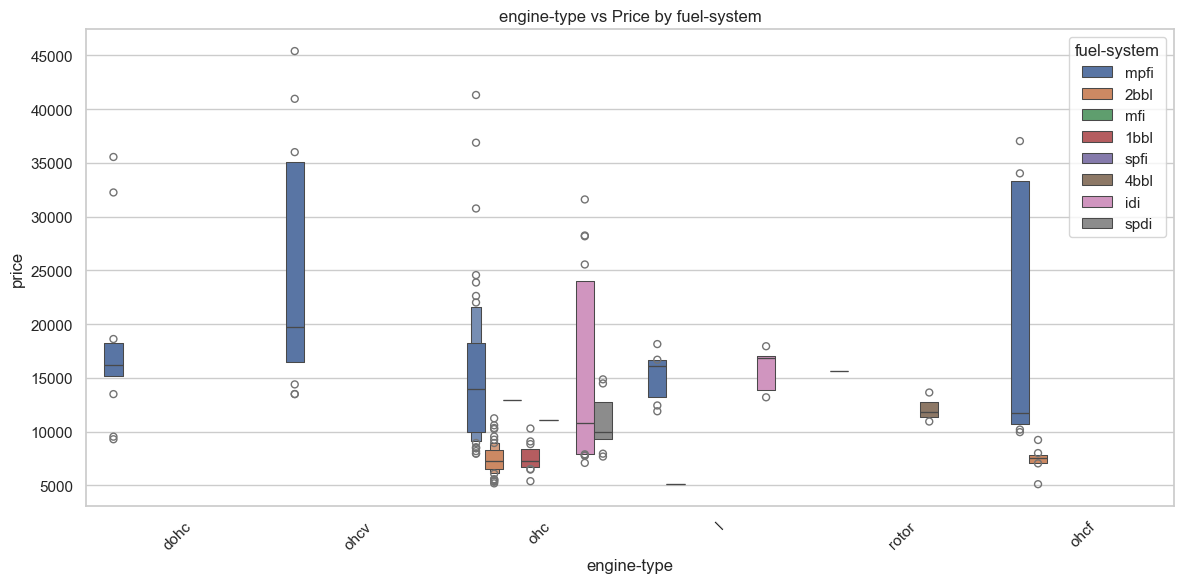

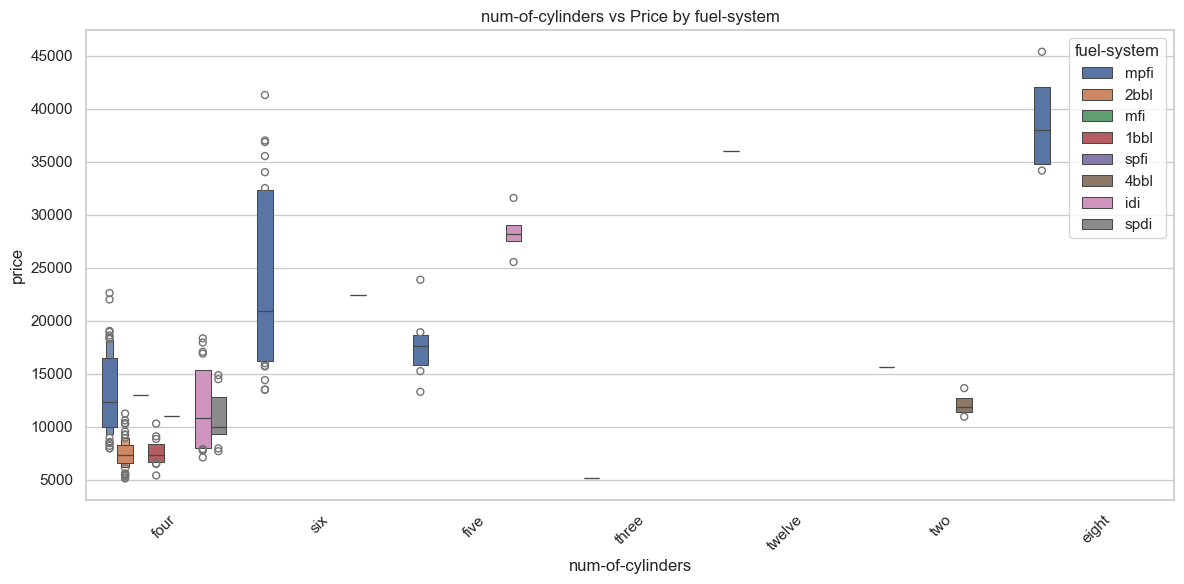

In [78]:
for i in range(len(cat_features)):
    for j in range(i+1, len(cat_features)):
        plt.figure(figsize=(12,6))
        sns.boxenplot(x=cat_features[i],y='price',hue=cat_features[j],data=df)
        plt.title(f'{cat_features[i]} vs Price by {cat_features[j]}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

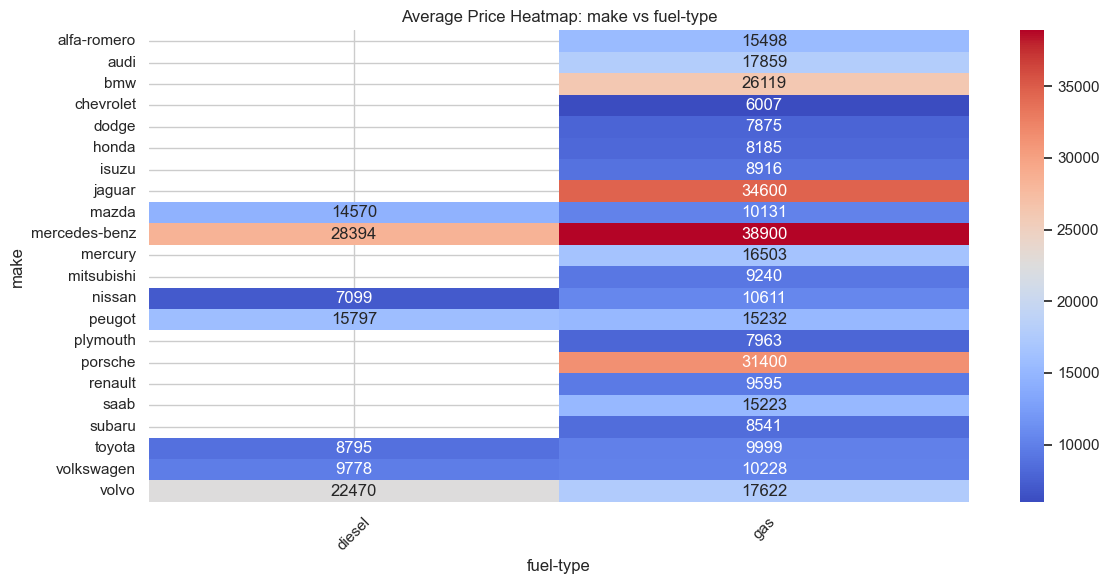

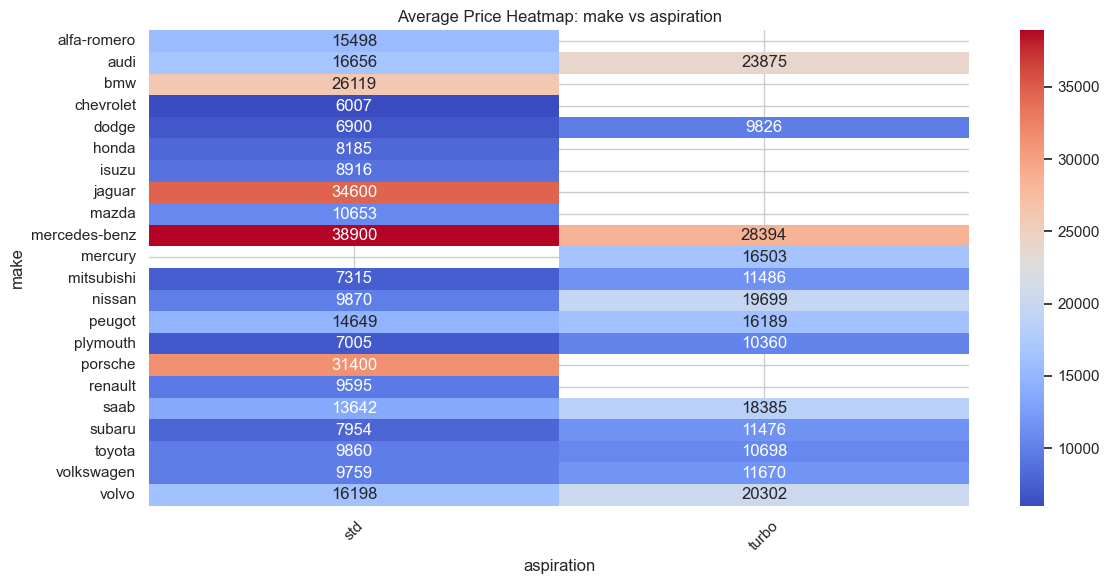

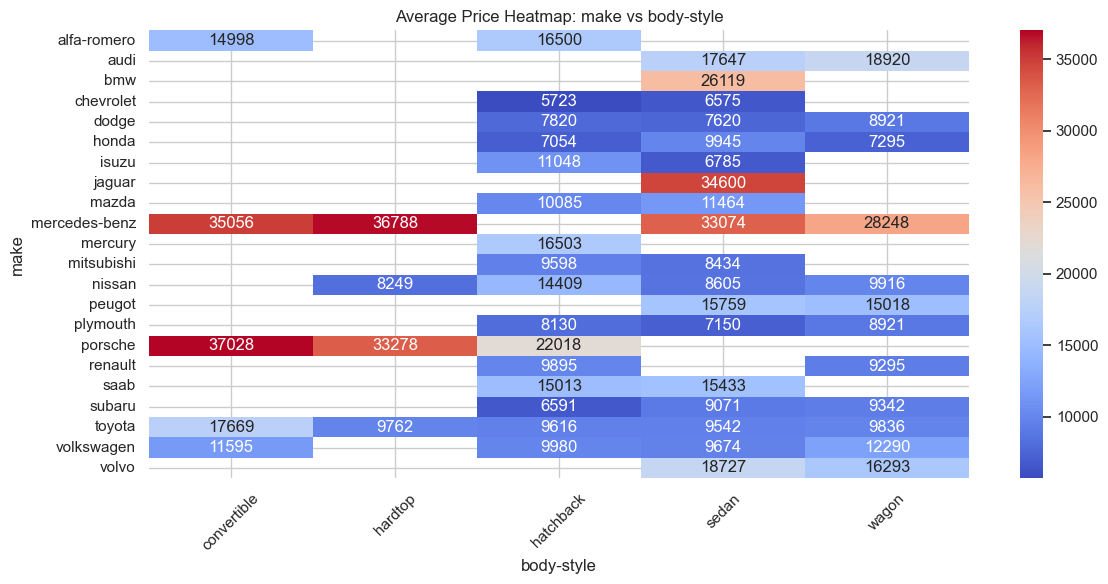

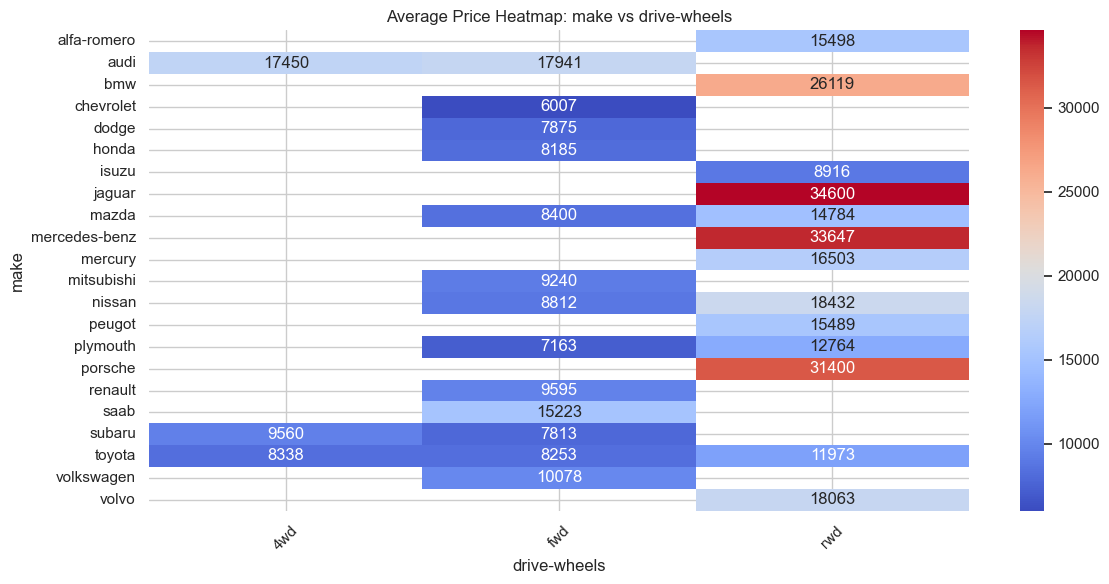

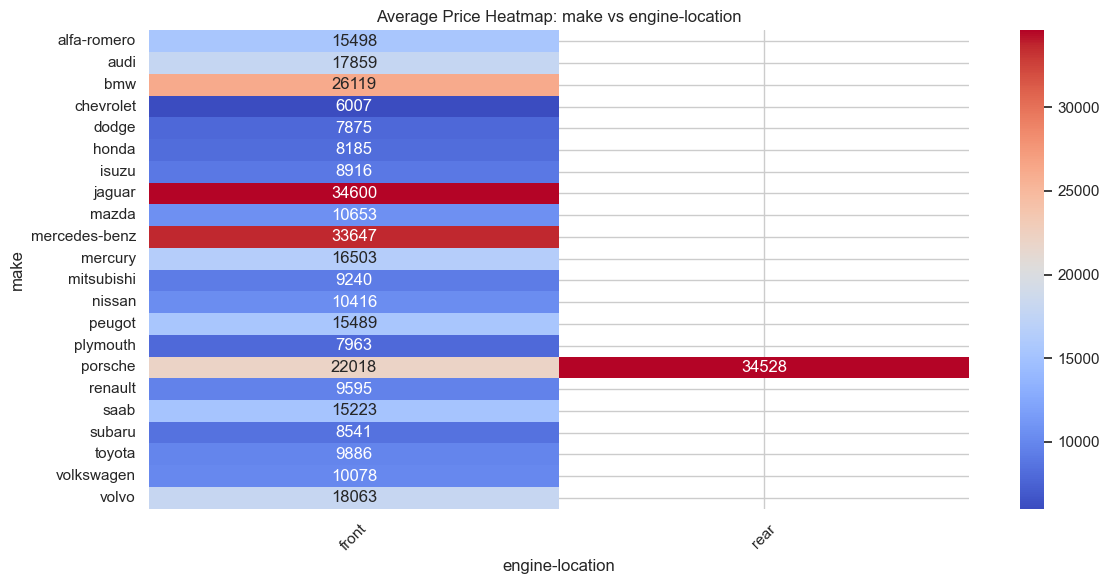

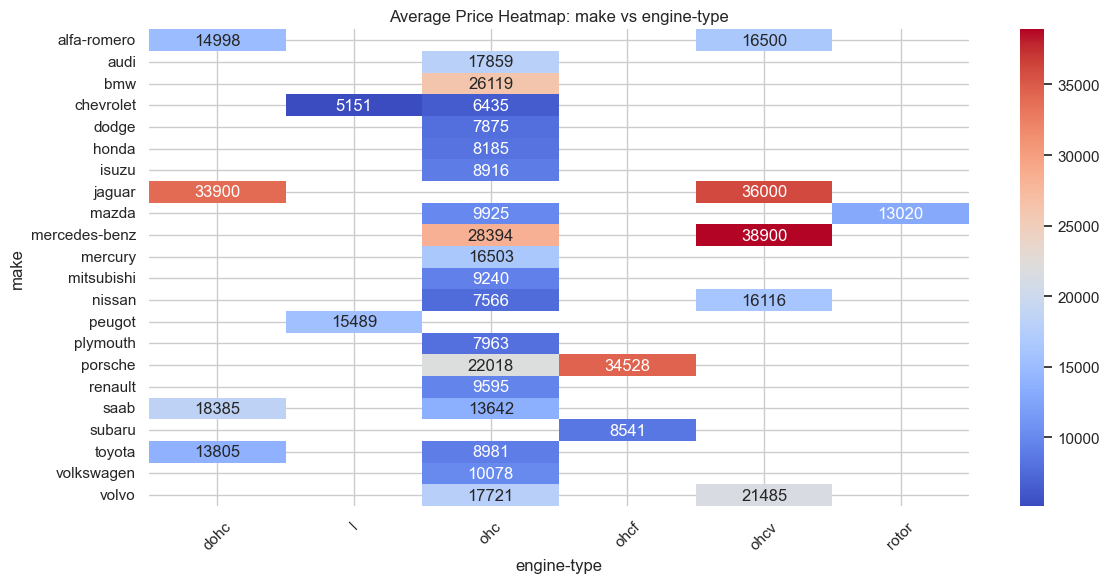

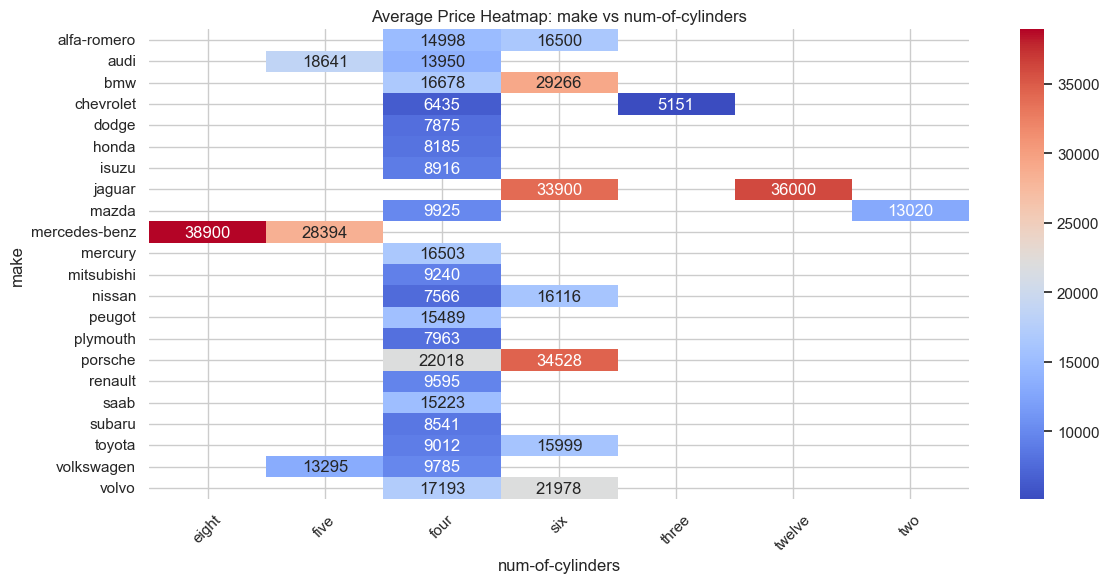

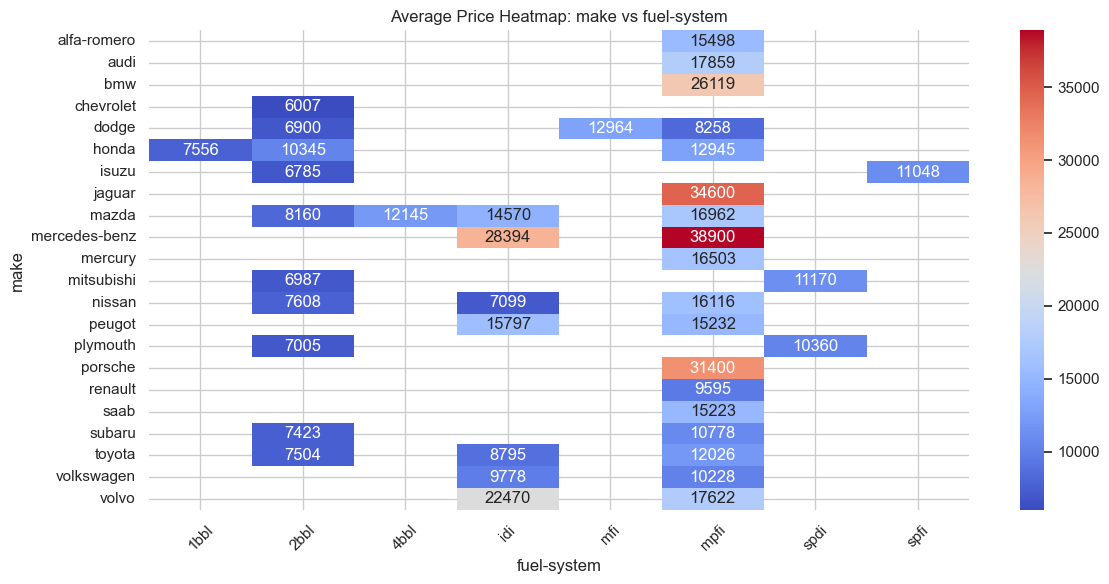

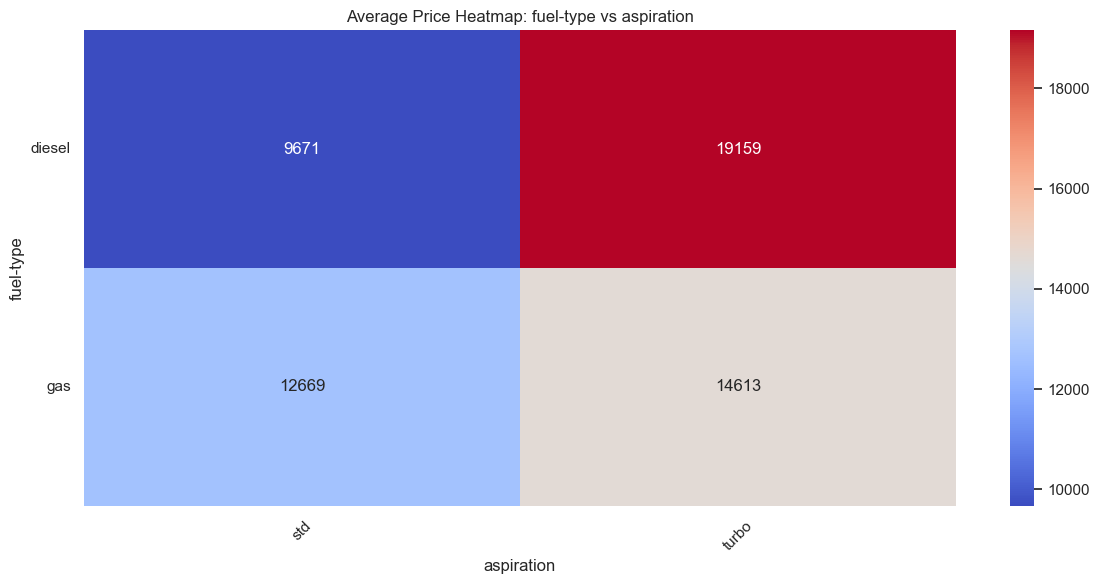

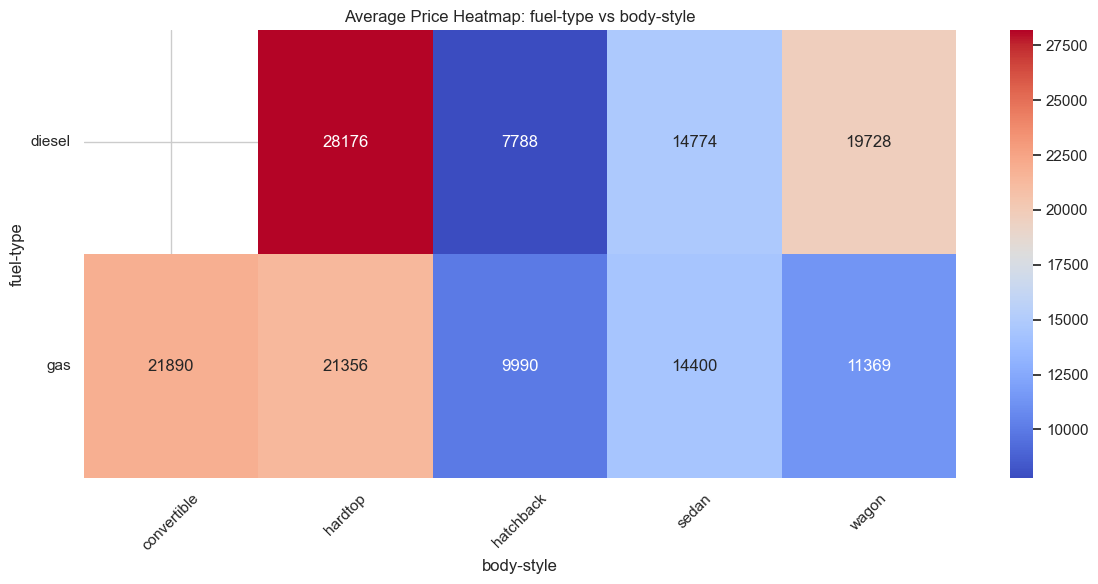

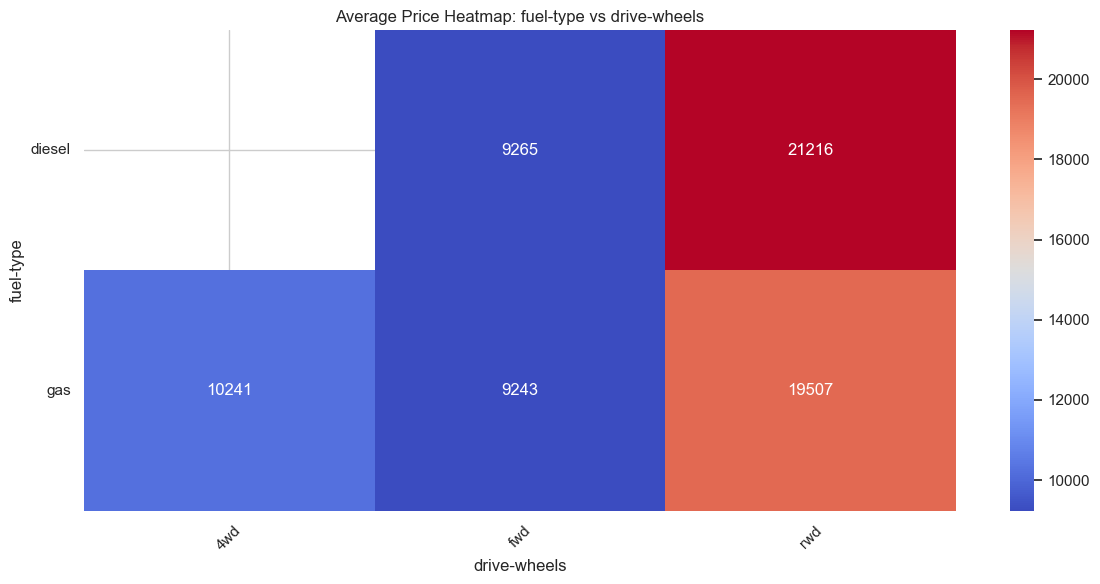

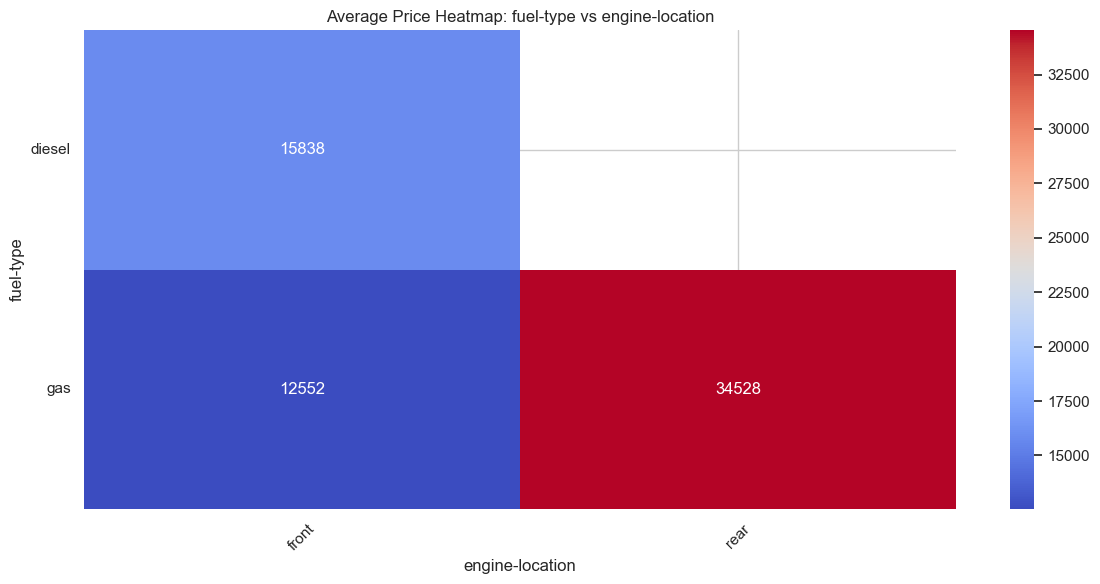

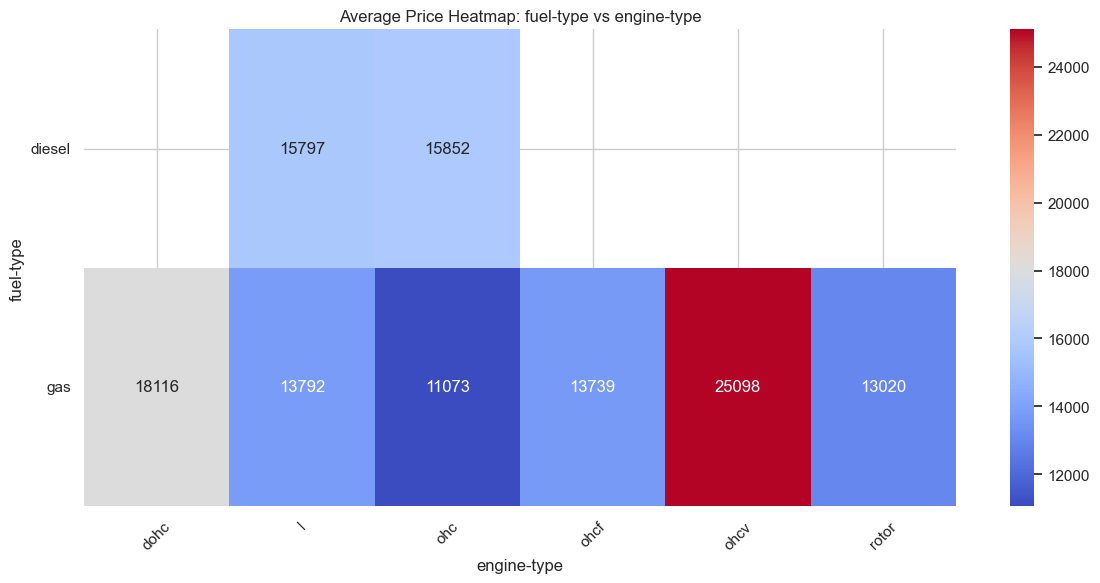

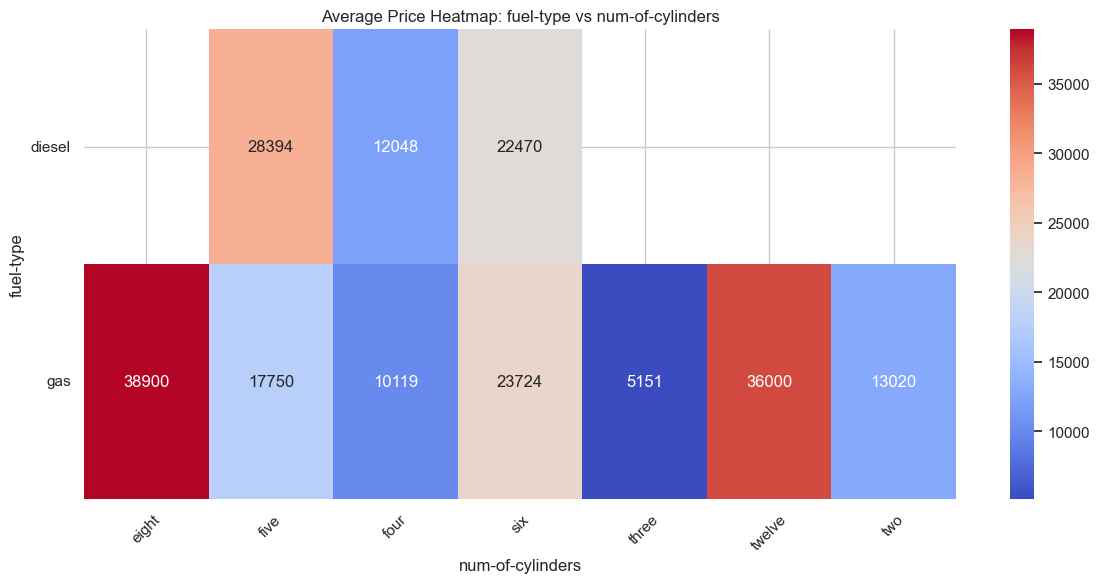

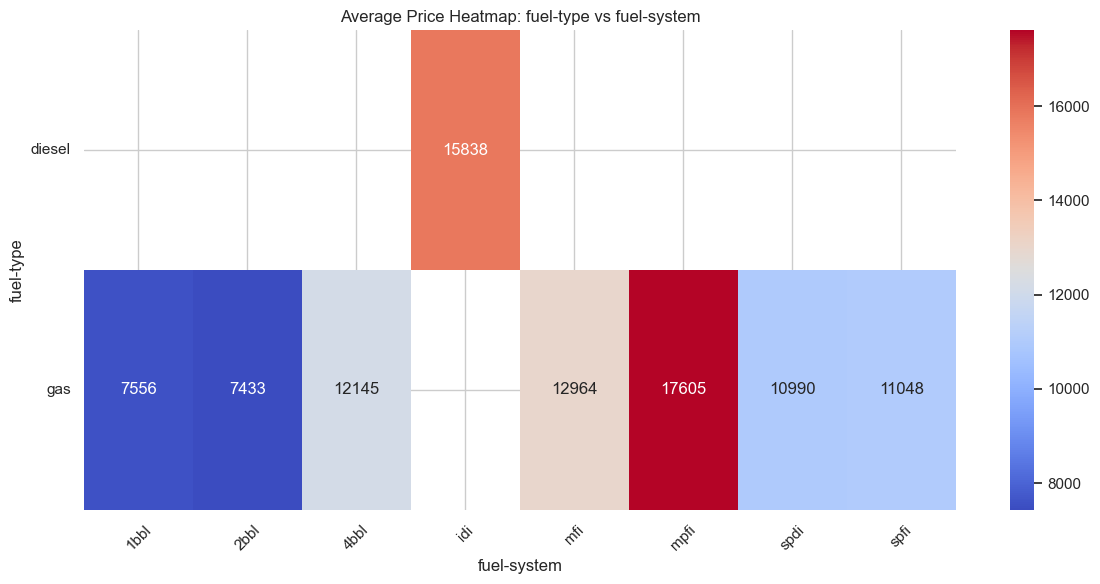

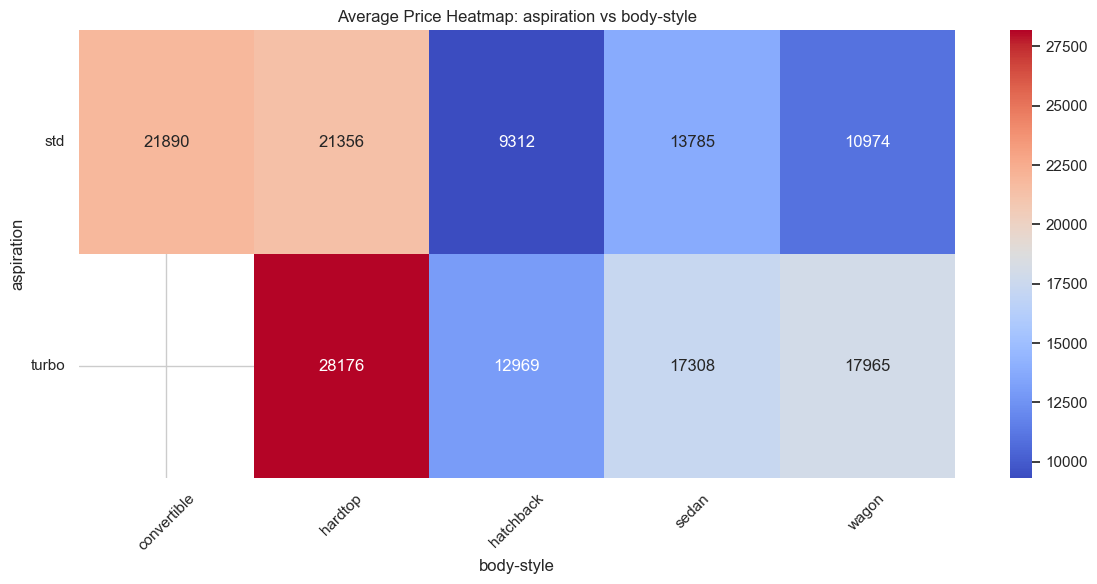

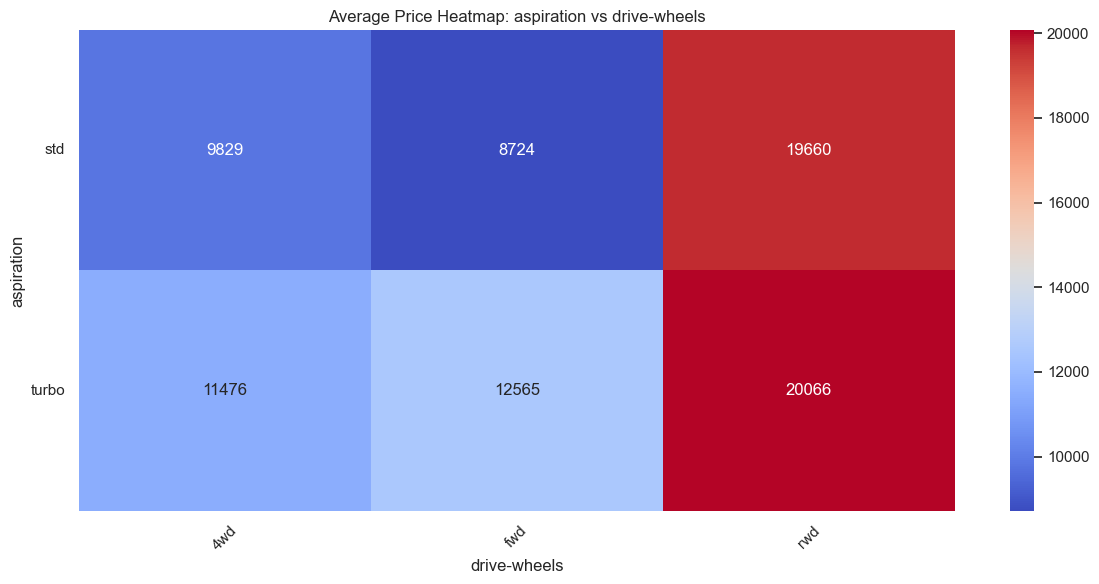

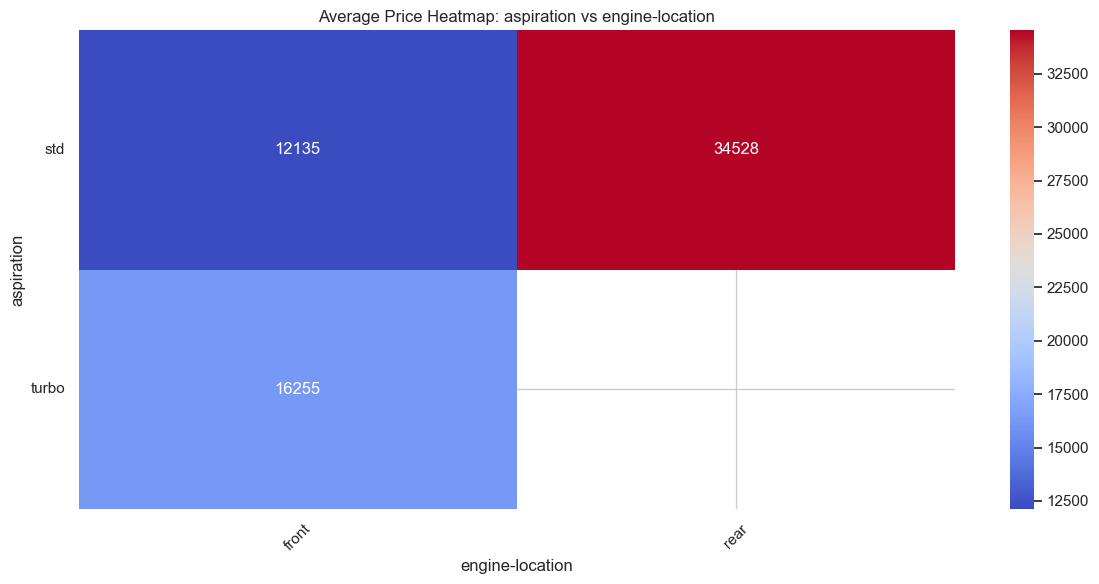

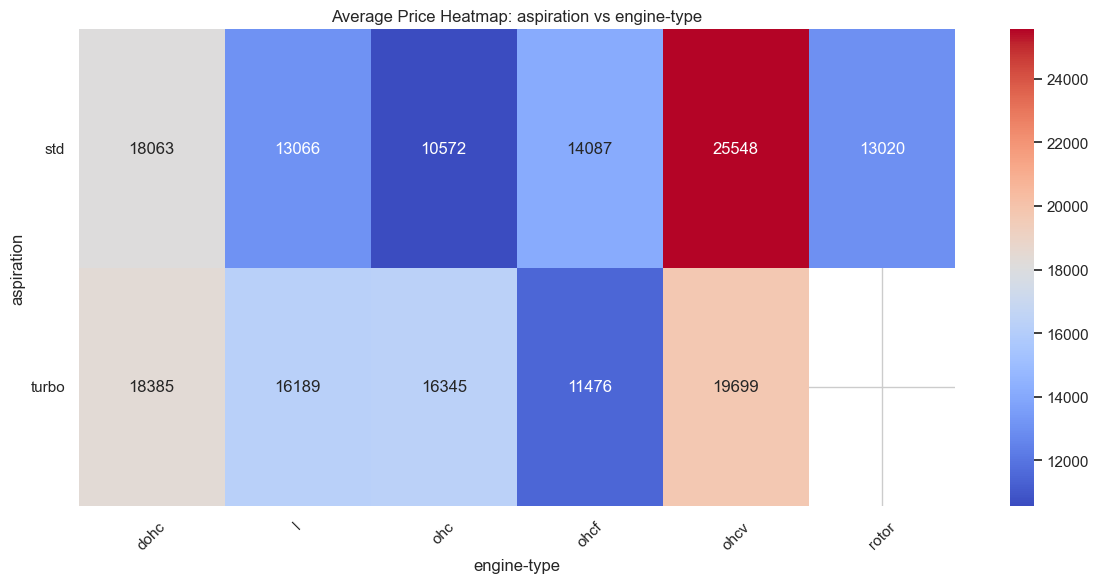

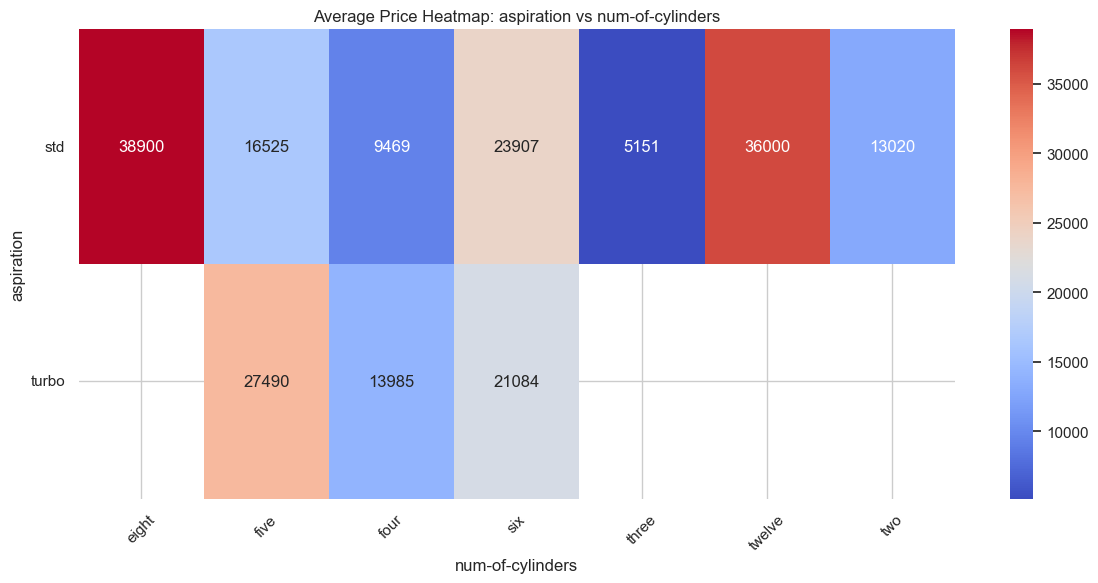

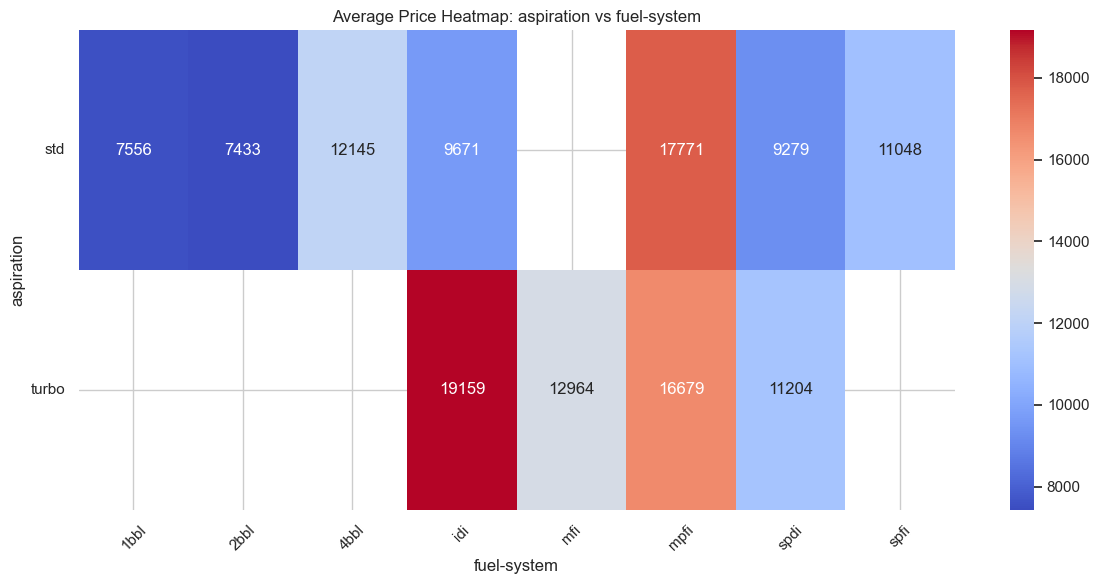

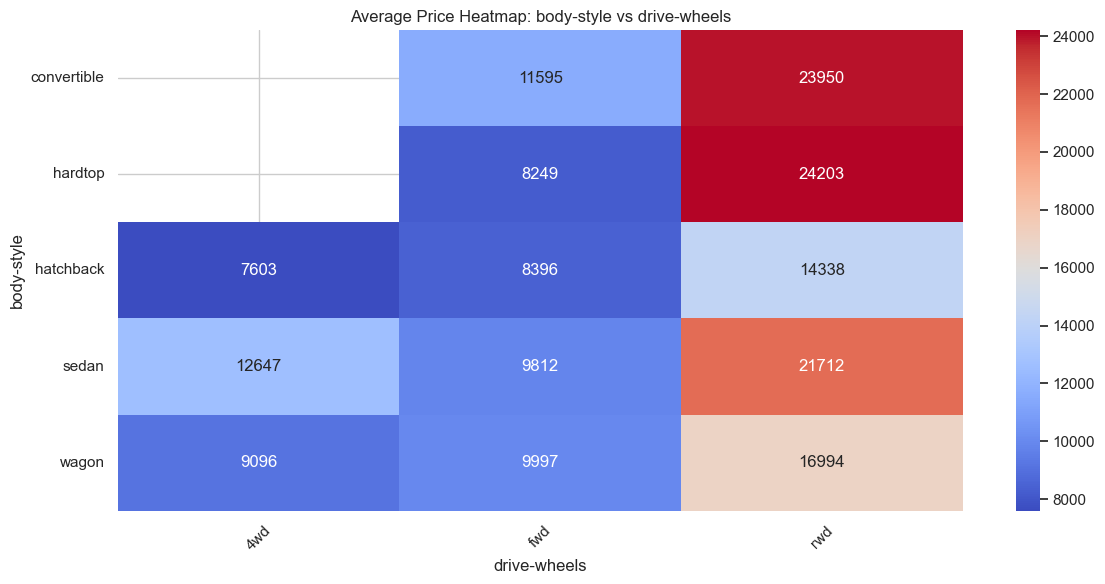

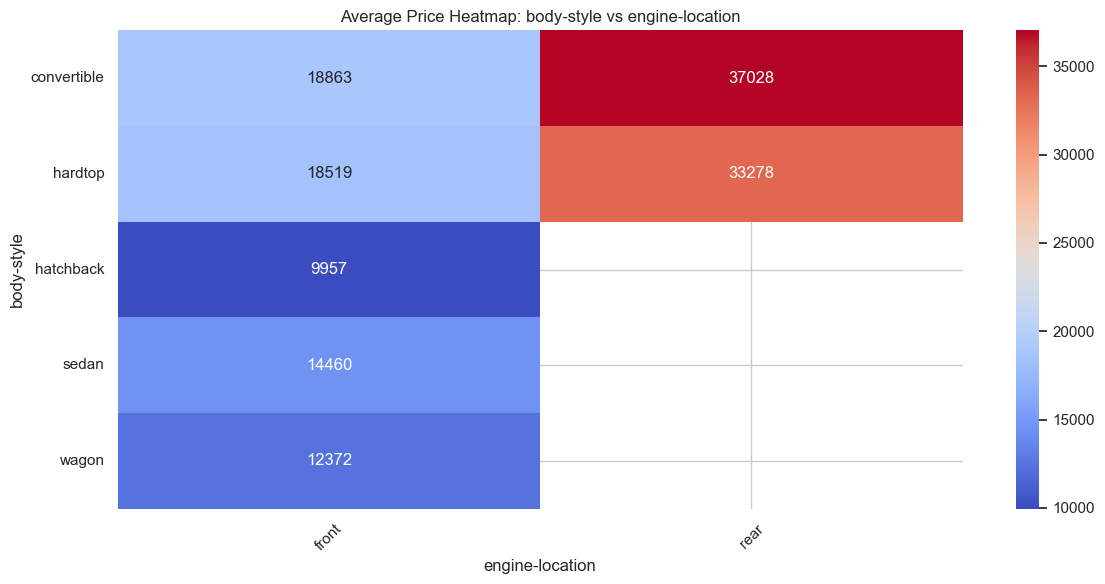

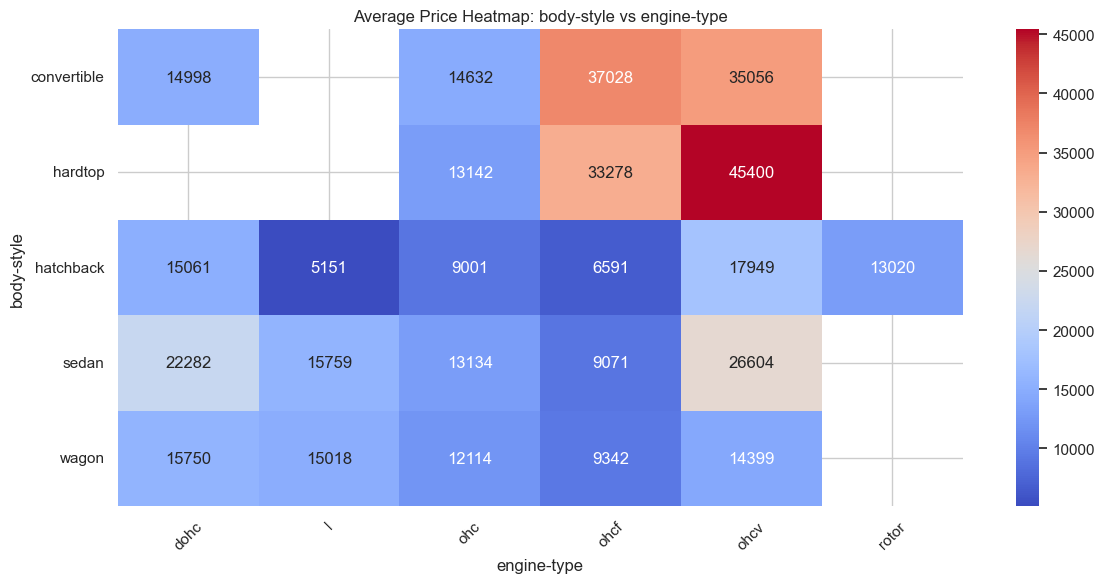

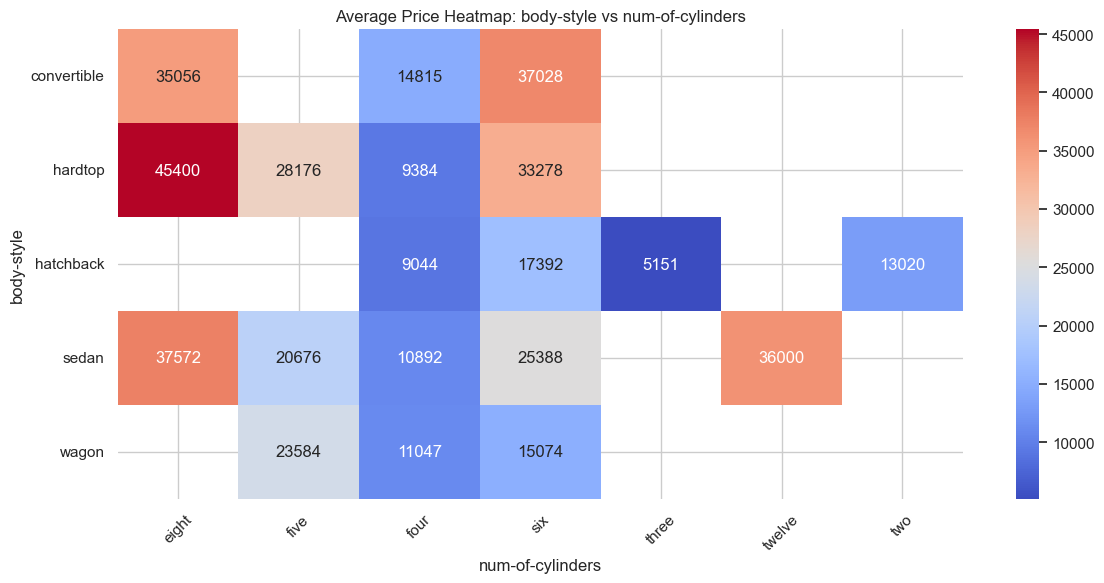

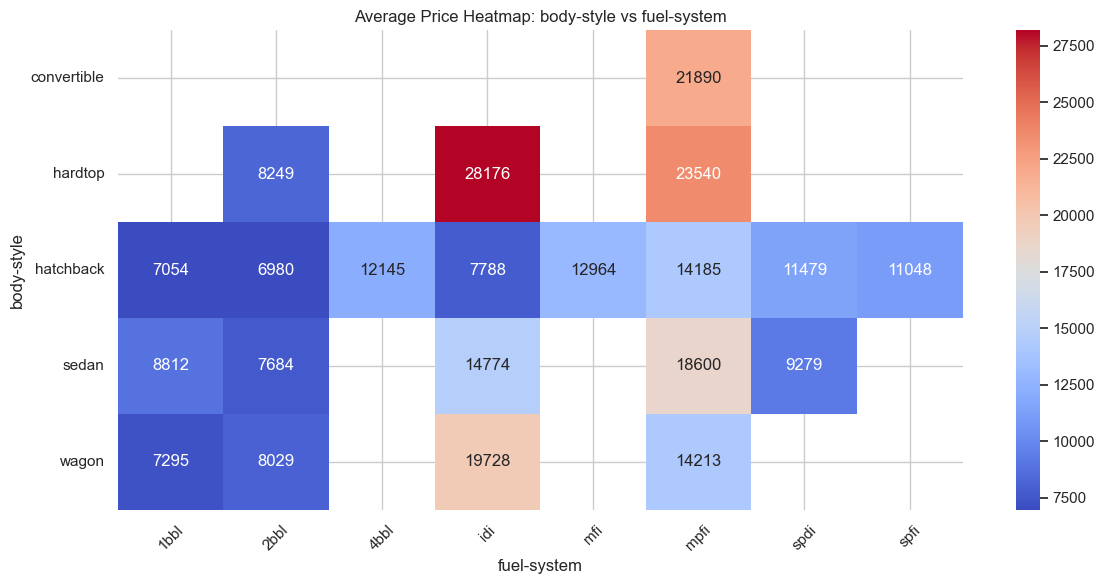

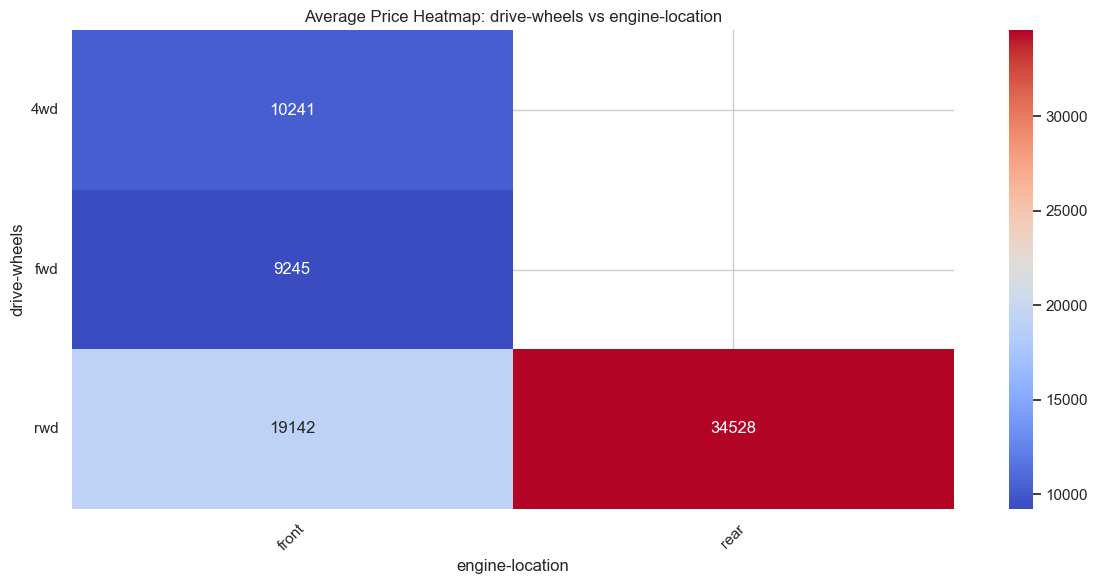

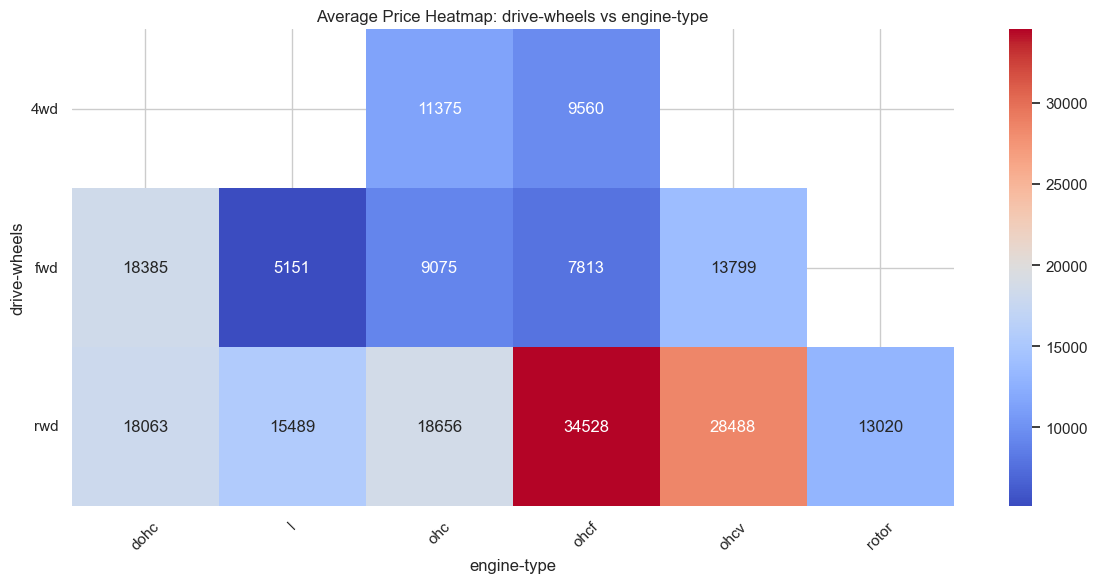

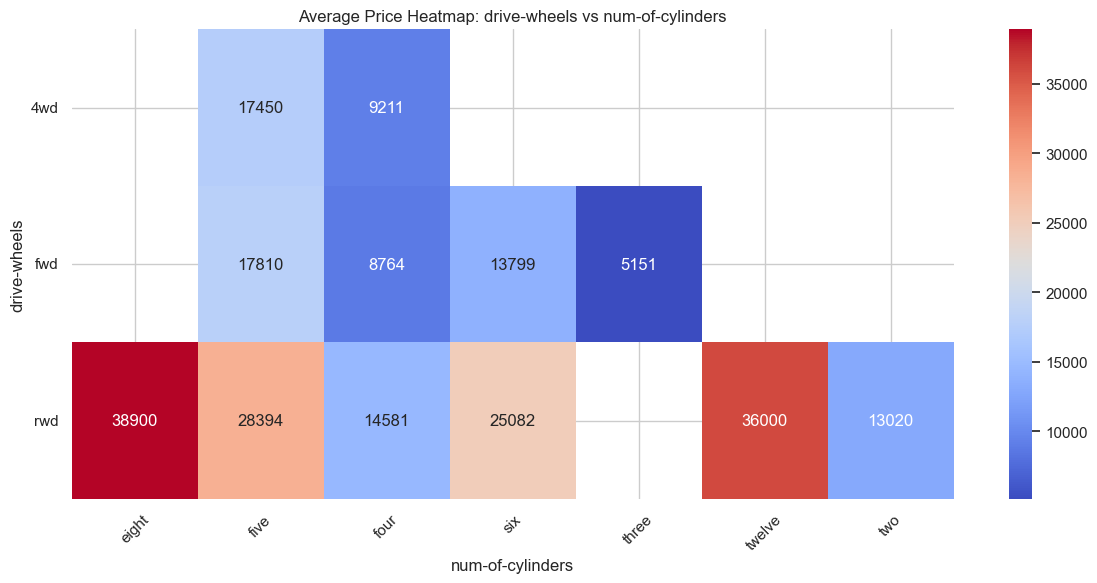

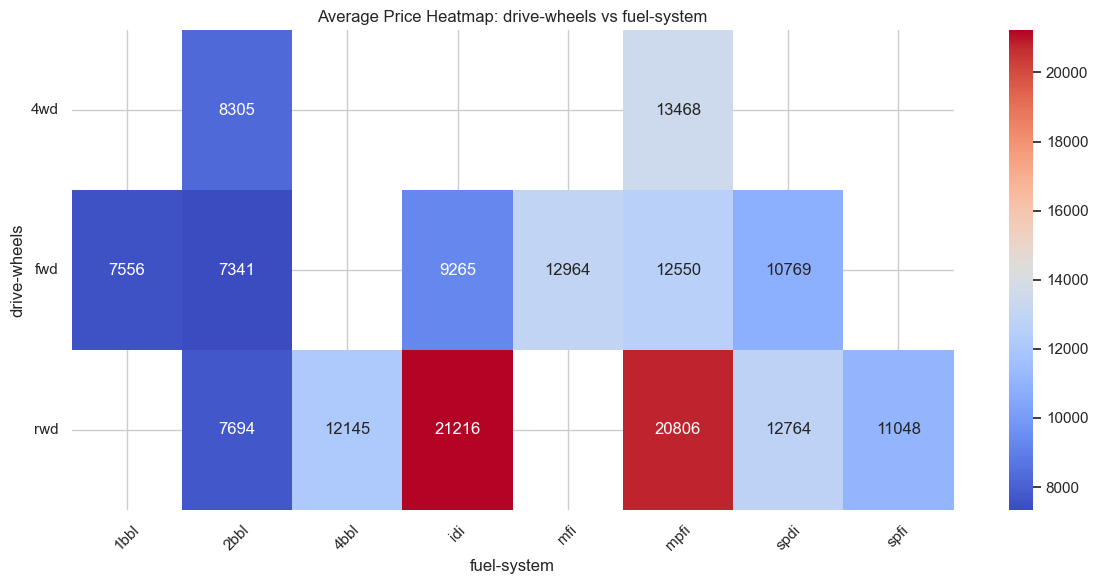

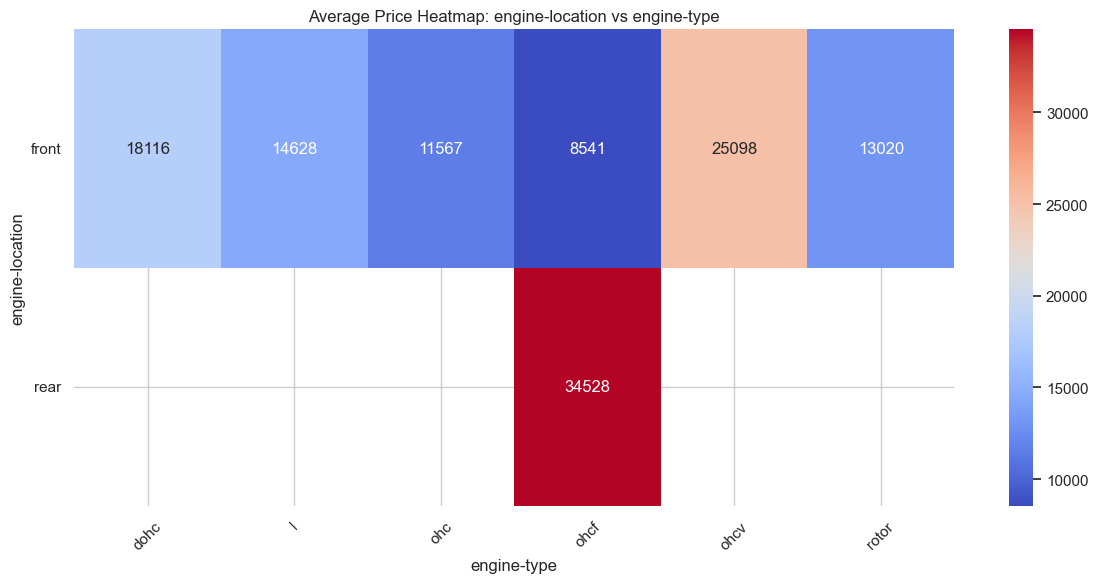

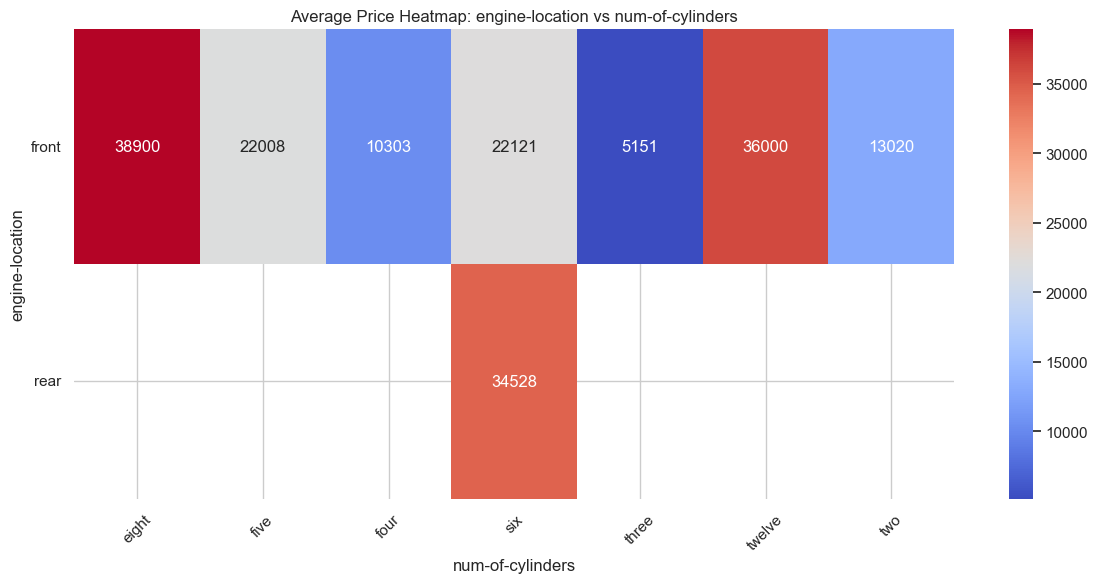

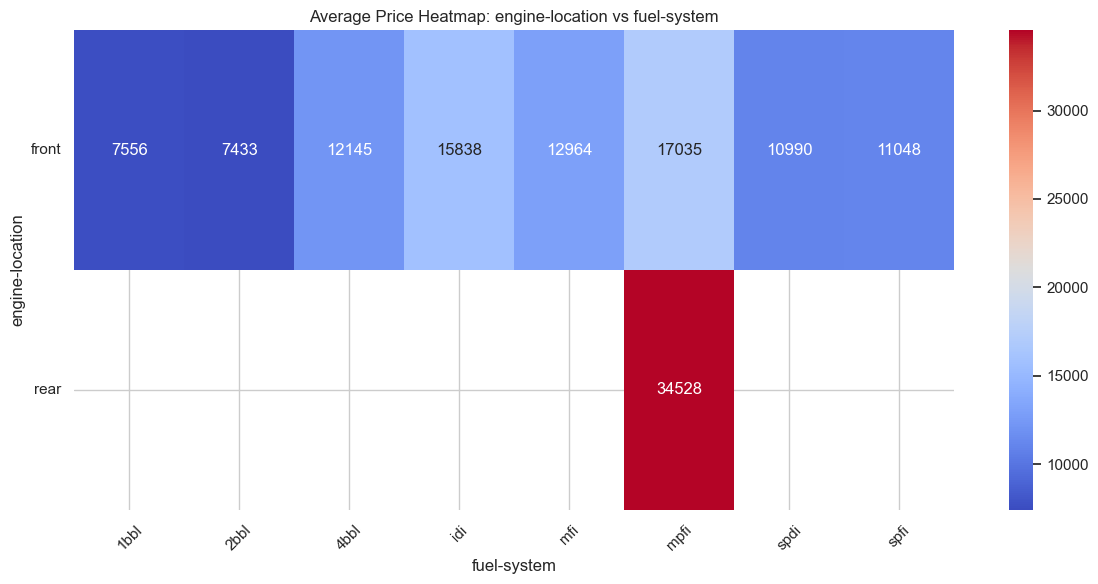

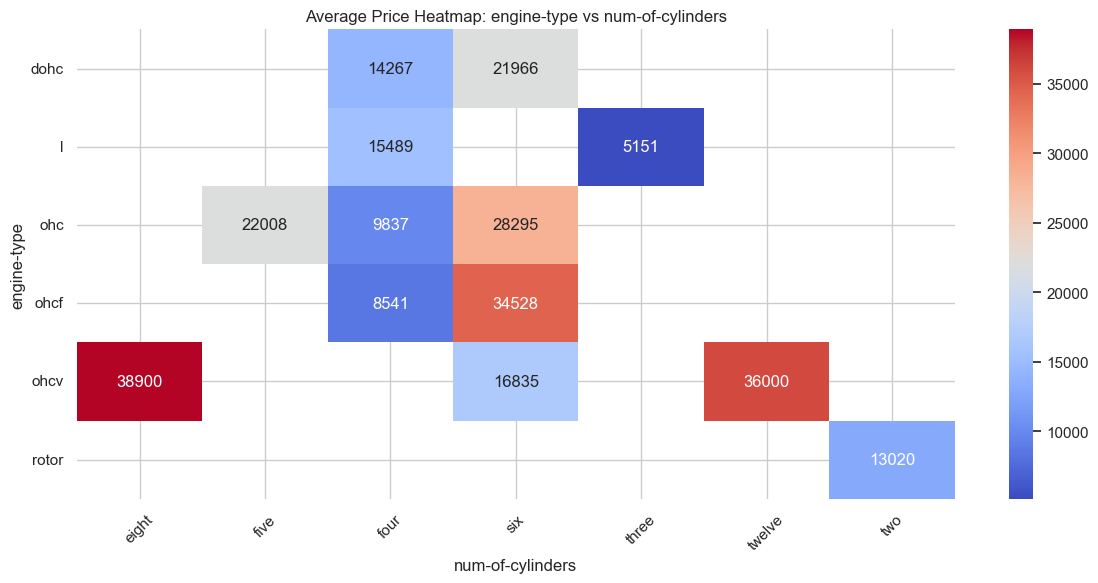

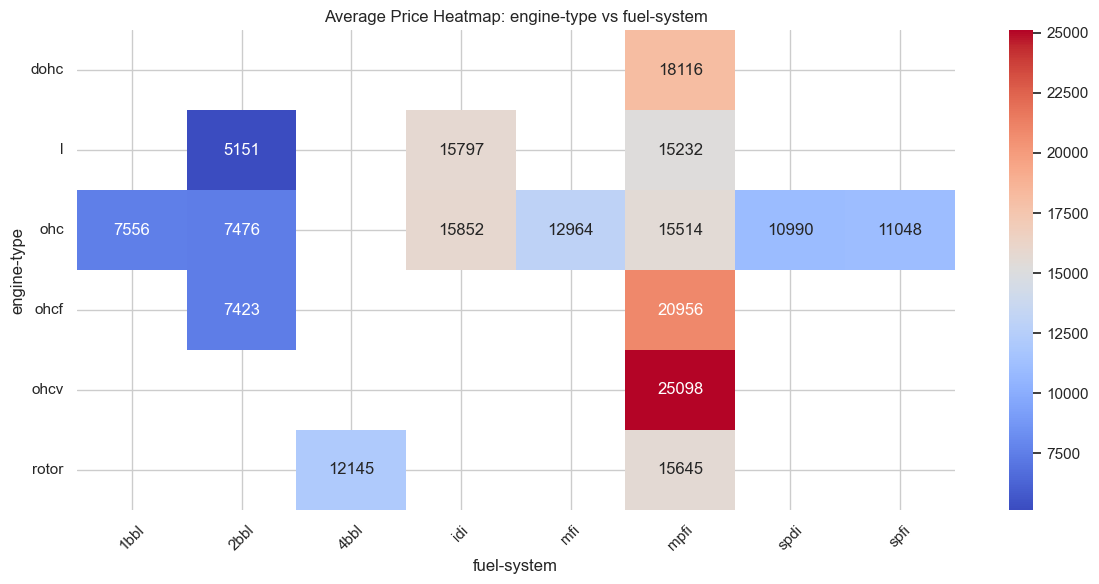

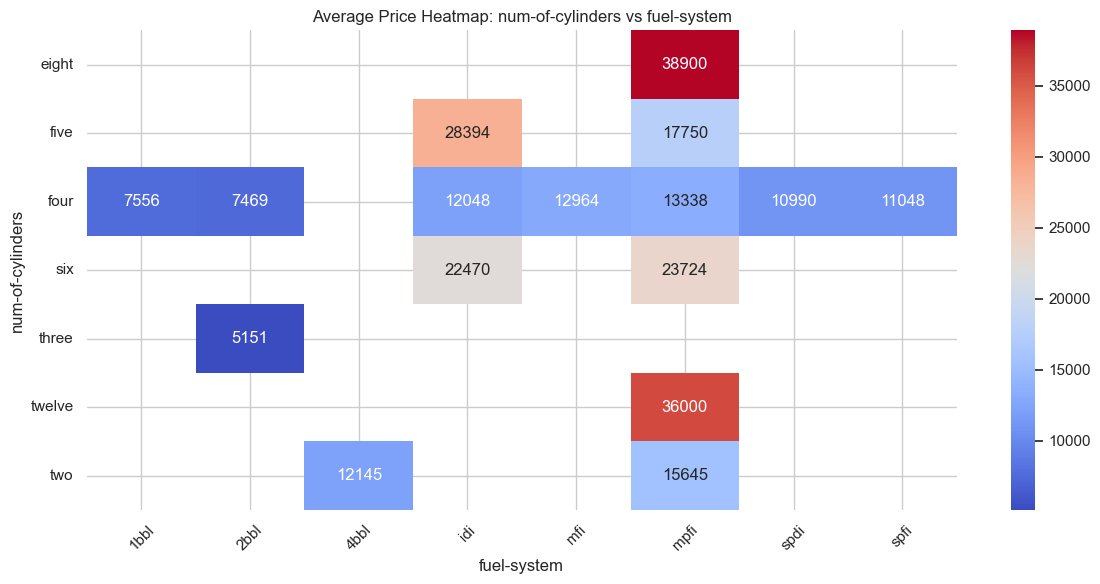

In [79]:
for i in range(len(cat_features)):
    for j in range(i+1,len(cat_features)):
        pivot = pd.pivot_table(df, index=cat_features[i], columns=cat_features[j], values='price', aggfunc='mean')
        plt.figure(figsize=(12, 6))
        sns.heatmap(pivot, annot=True, fmt='.0f', cmap='coolwarm')
        plt.title(f'Average Price Heatmap: {cat_features[i]} vs {cat_features[j]}')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

### Let’s proceed with bivariate/multivariate analysis for numerical columns.

#### Pairwise Relationship (Multivariate)

In [85]:
# Automatically detect numerical columns
numerical_cols = df.select_dtypes(include=['int64','float']).columns.tolist()
print("Numerical Columns: ",numerical_cols)

Numerical Columns:  ['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'number-of-cylinders']


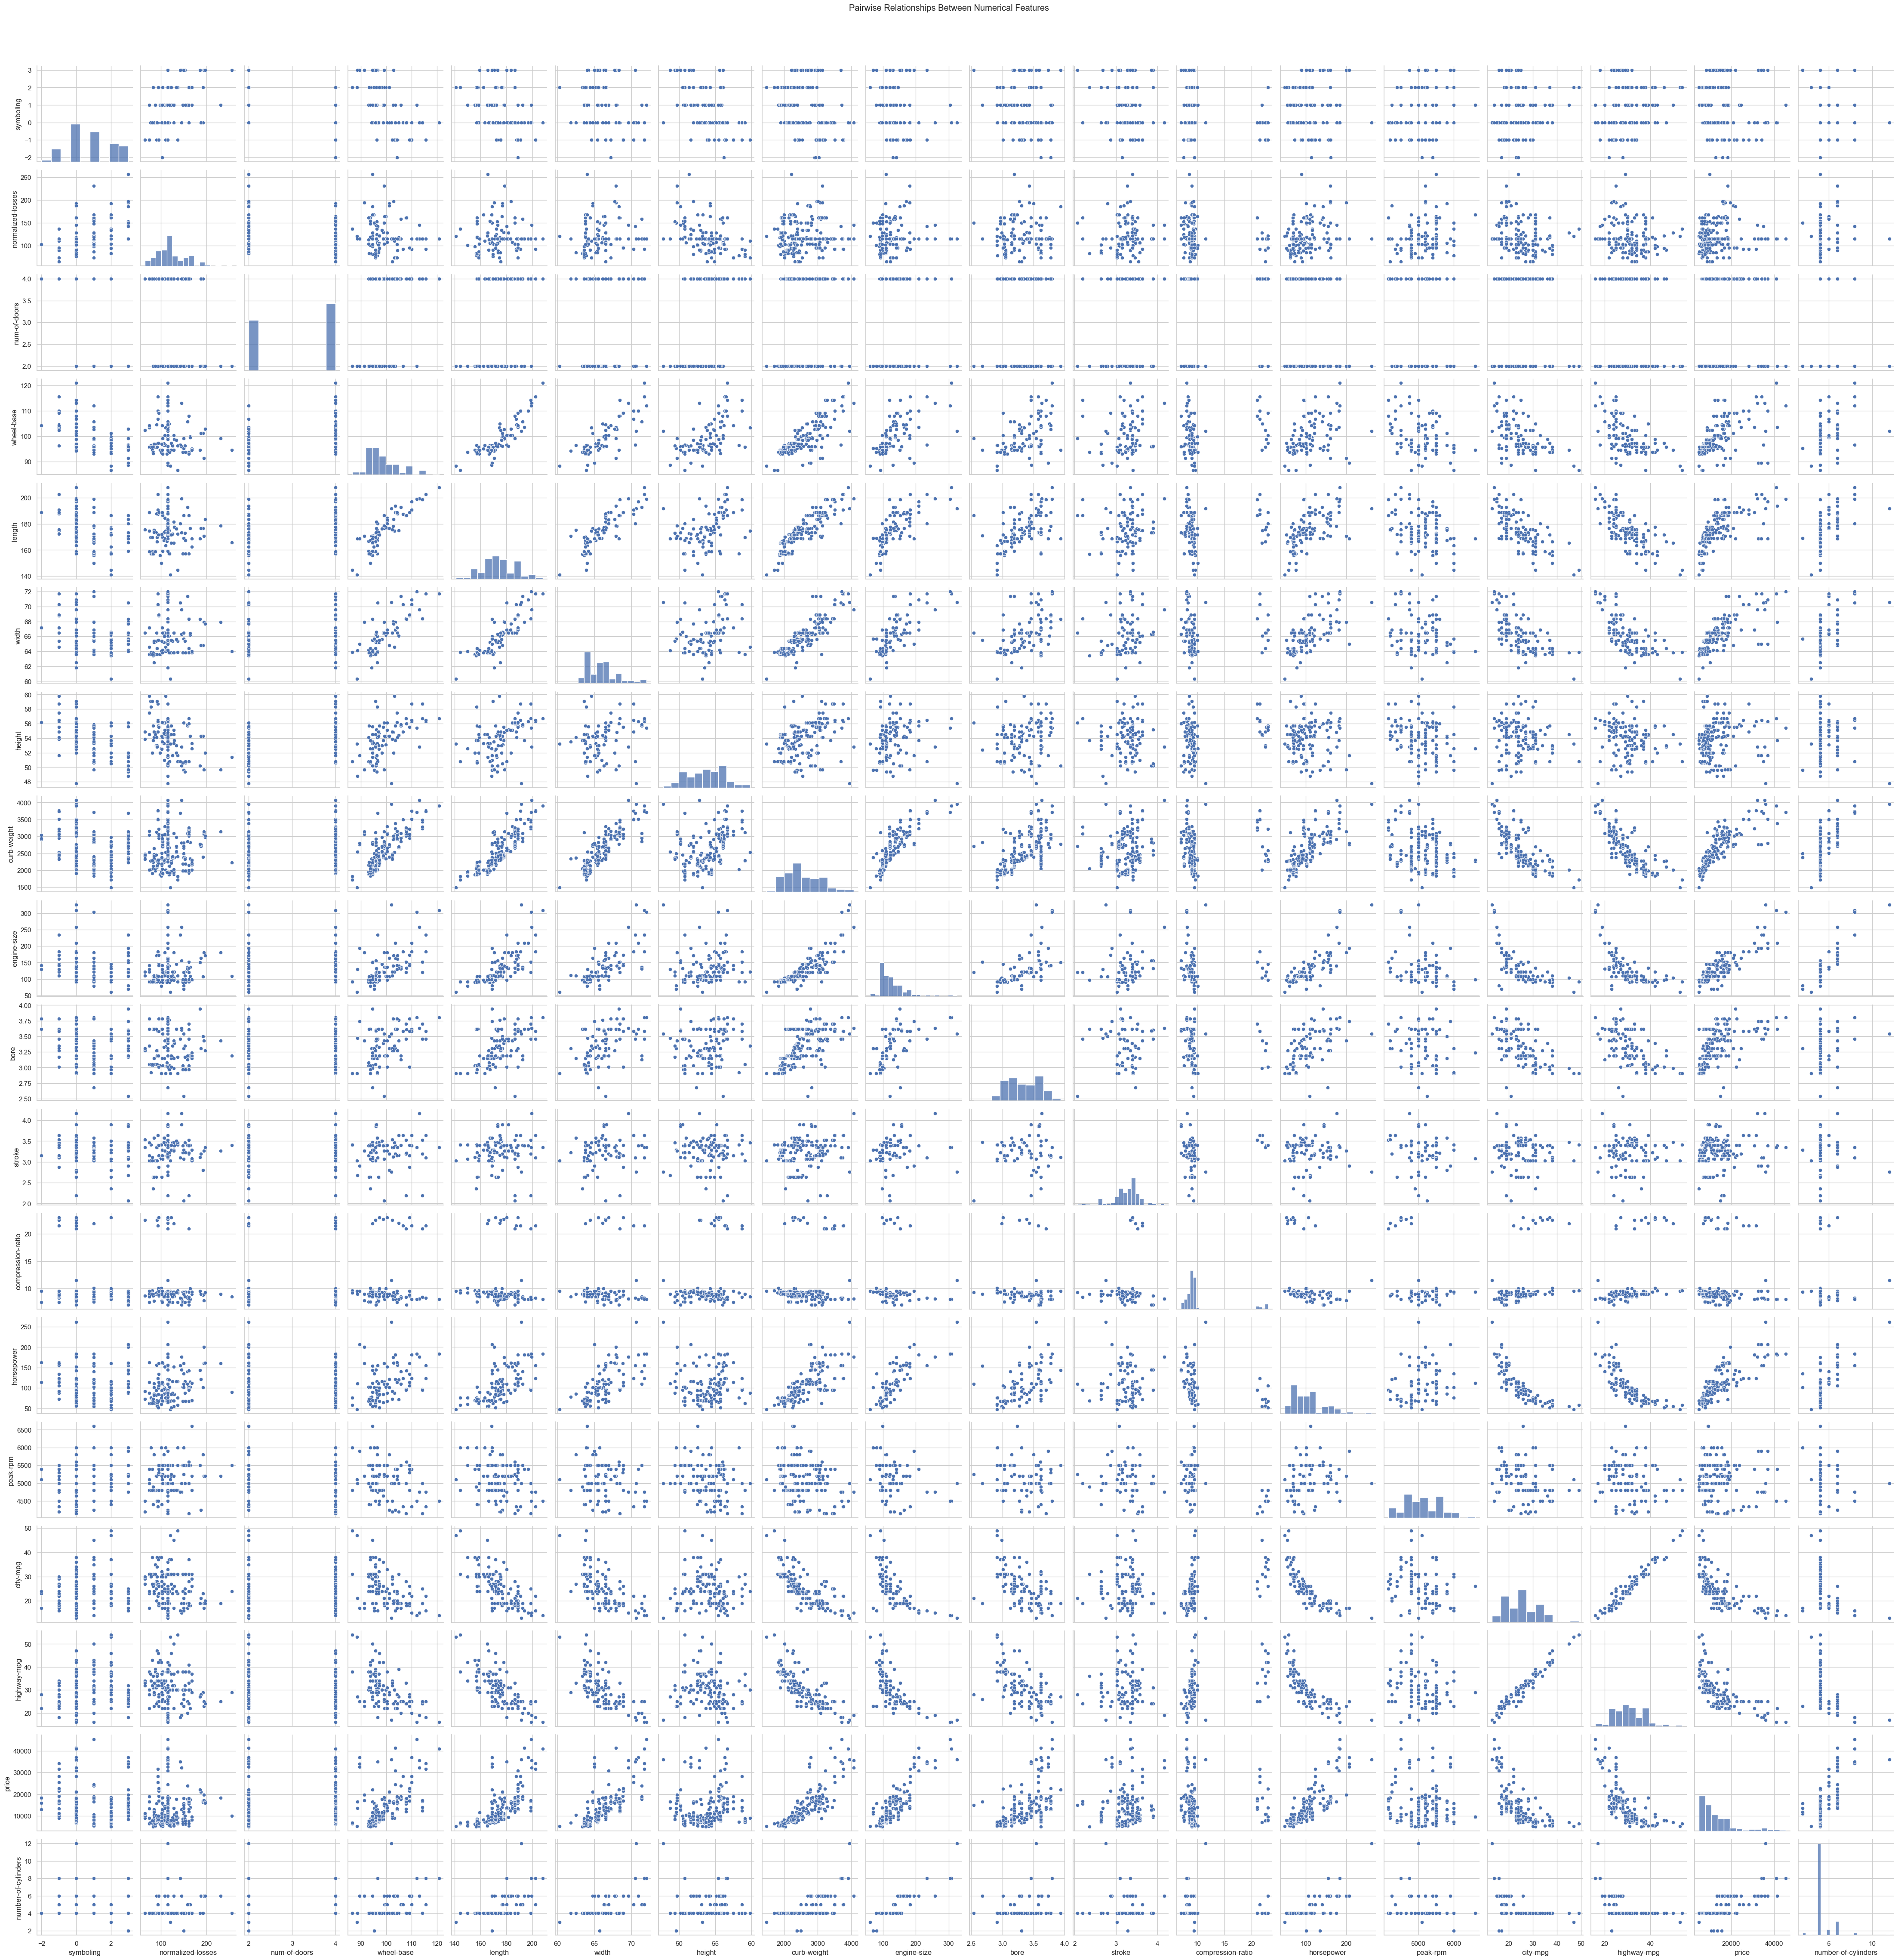

In [86]:
# Pairplot for numerical features
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02)
plt.show()

#### Univariate analysis (Distribution & Boxplot)

Analyzing: symboling


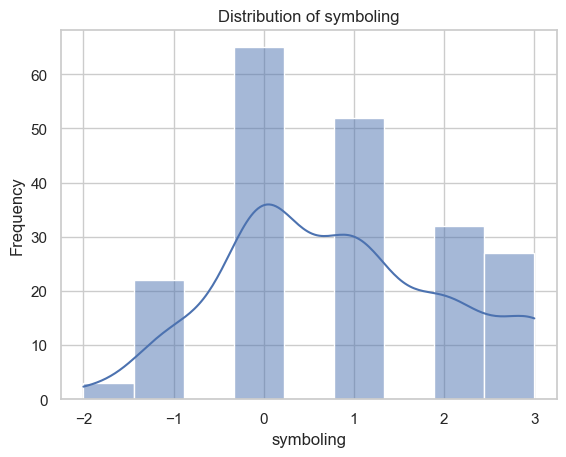

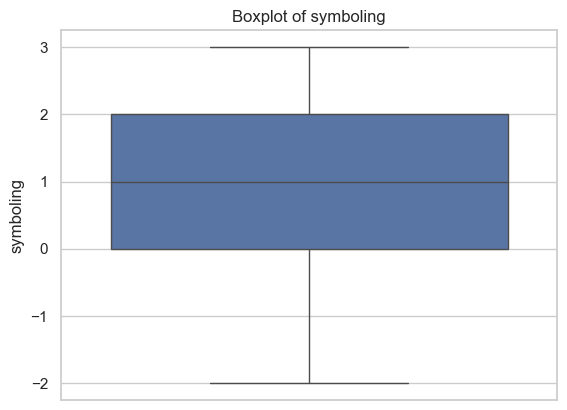

Analyzing: normalized-losses


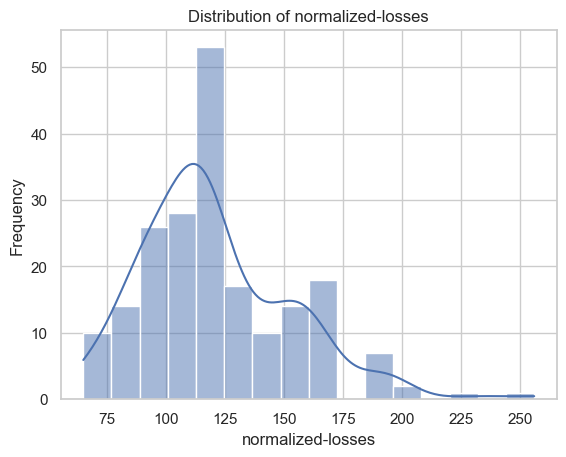

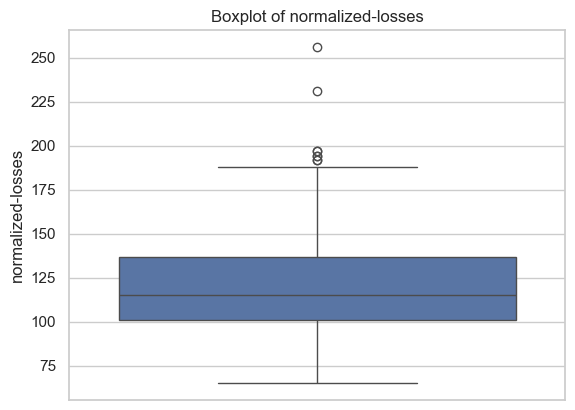

Analyzing: num-of-doors


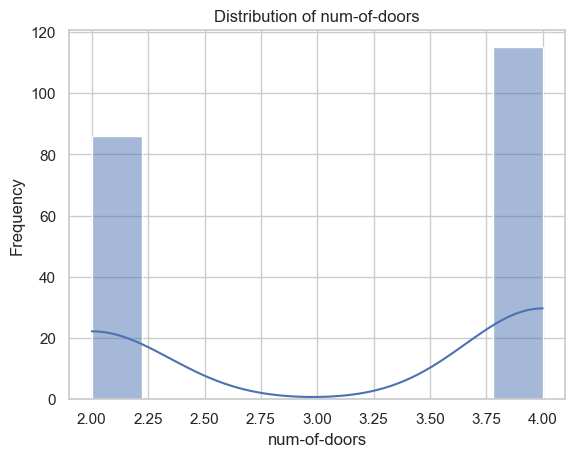

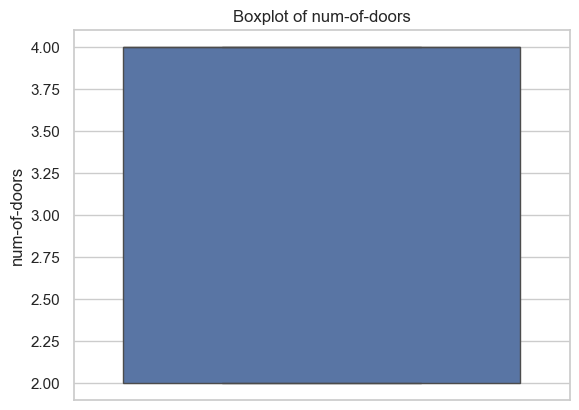

Analyzing: wheel-base


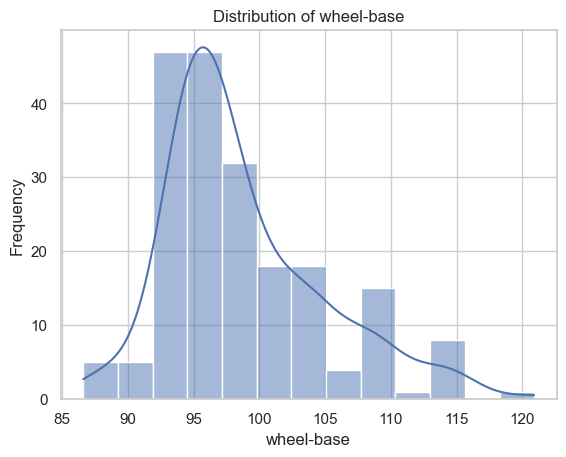

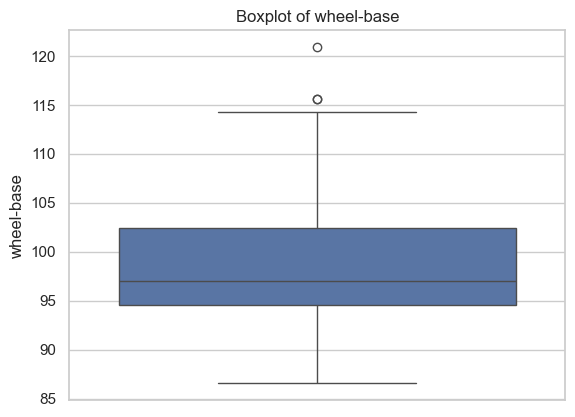

Analyzing: length


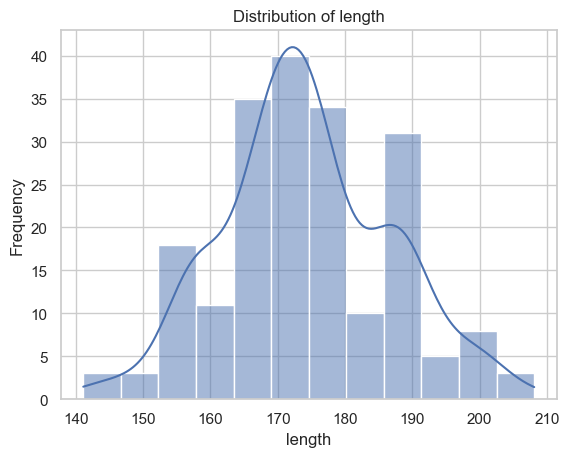

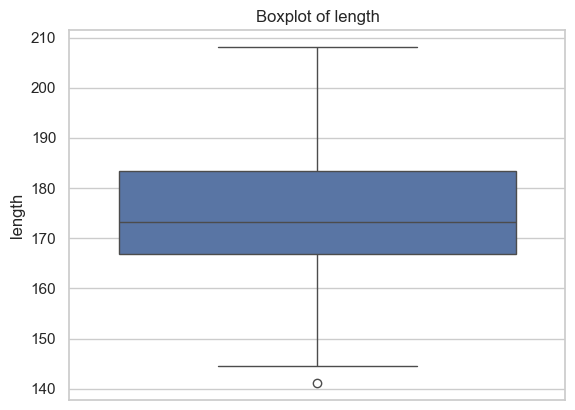

Analyzing: width


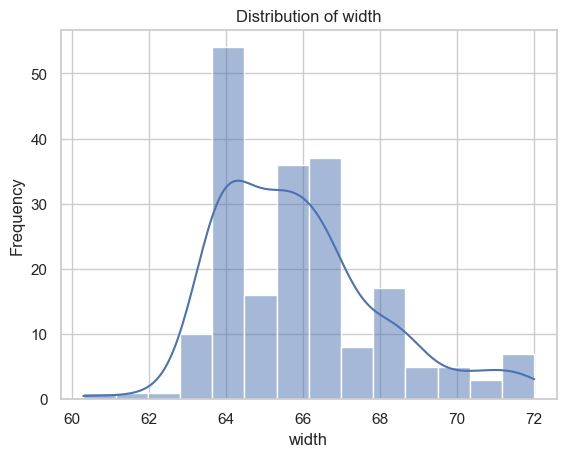

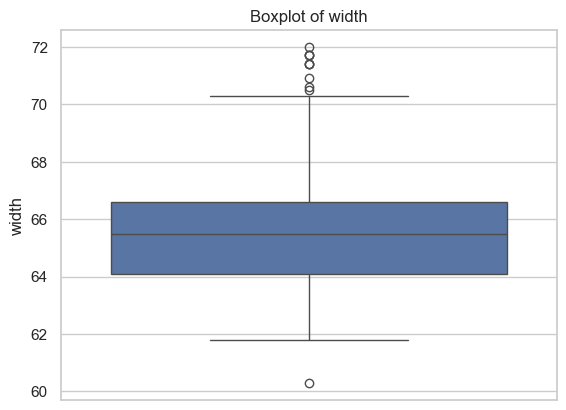

Analyzing: height


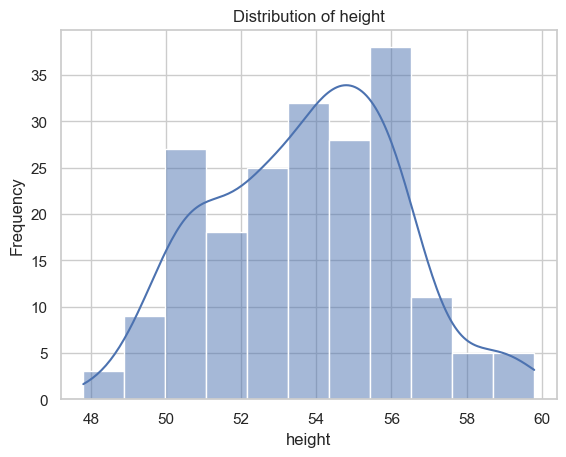

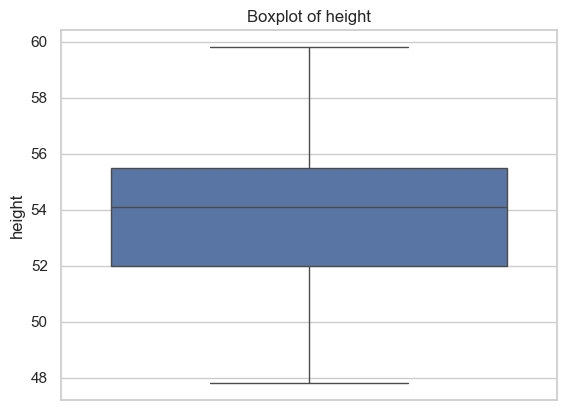

Analyzing: curb-weight


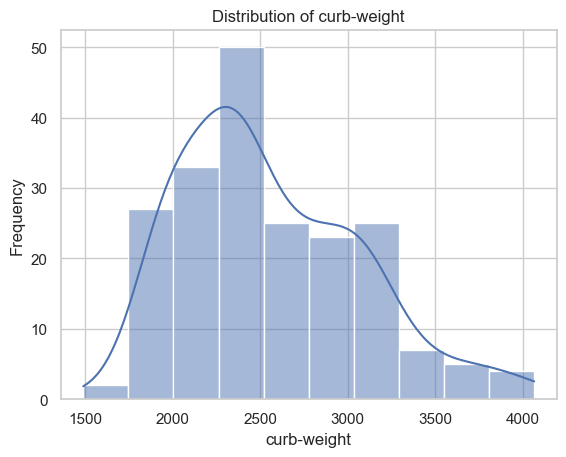

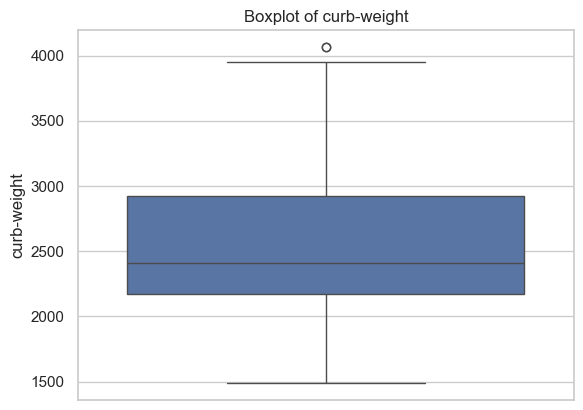

Analyzing: engine-size


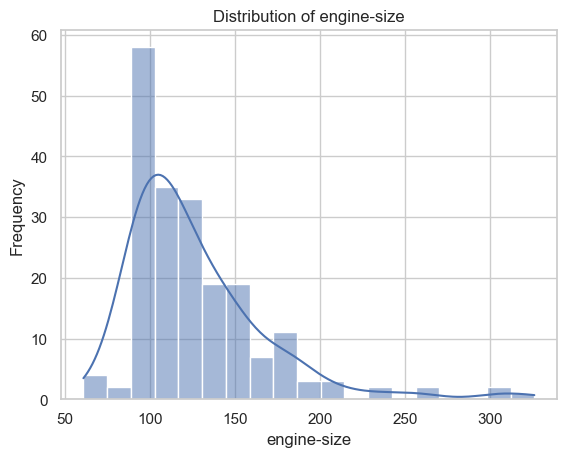

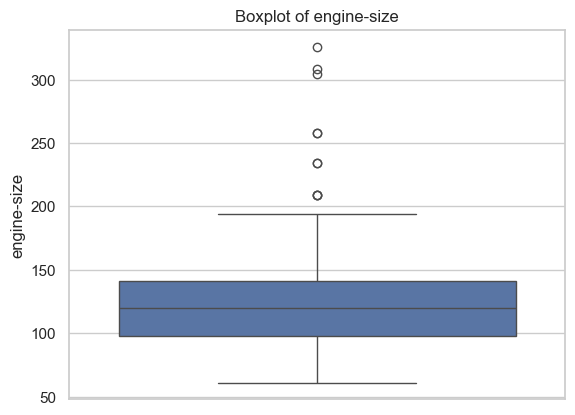

Analyzing: bore


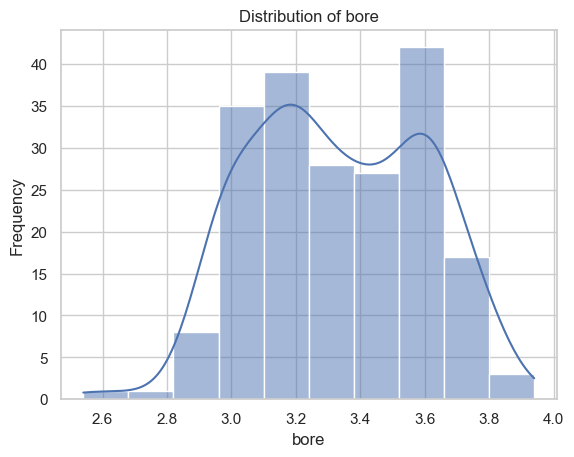

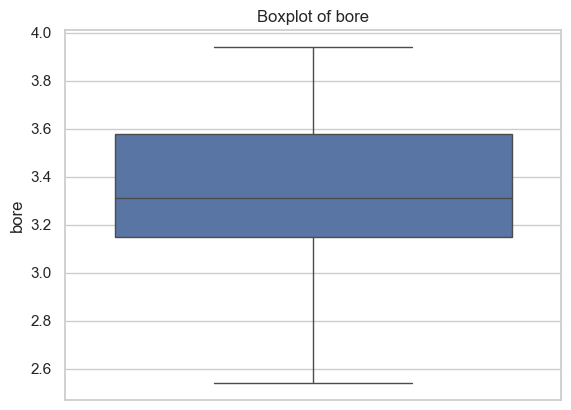

Analyzing: stroke


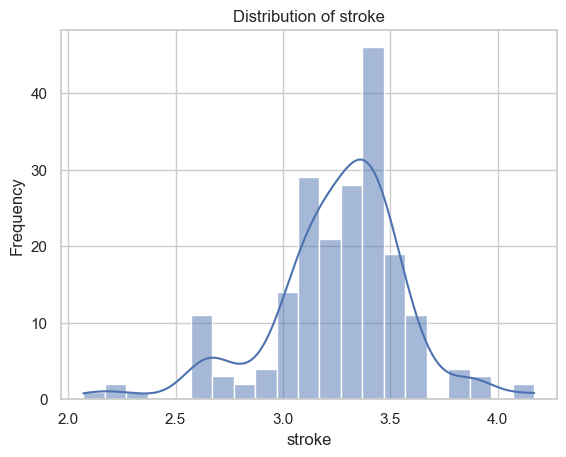

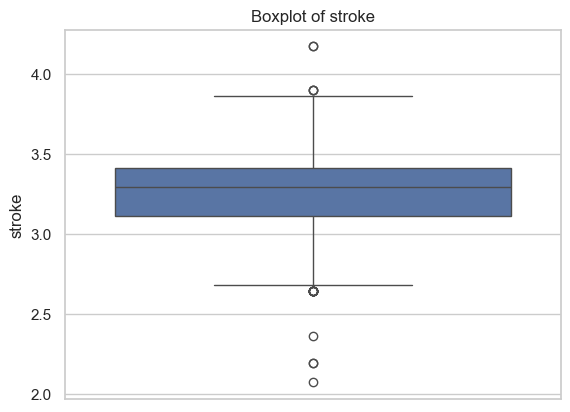

Analyzing: compression-ratio


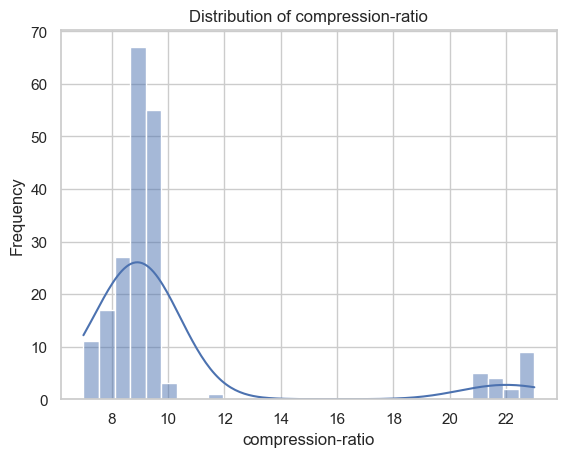

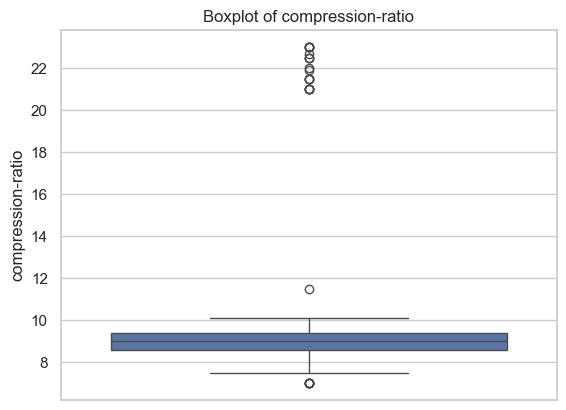

Analyzing: horsepower


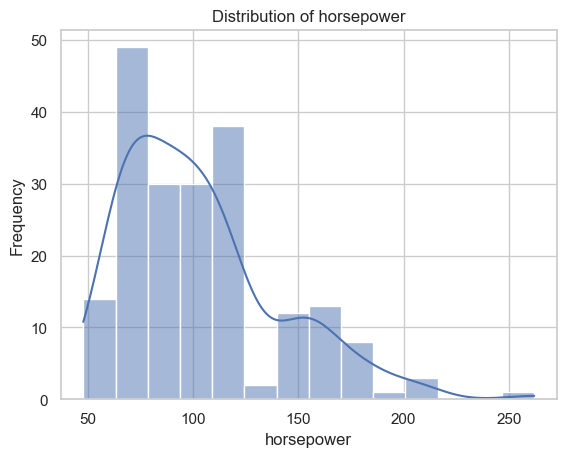

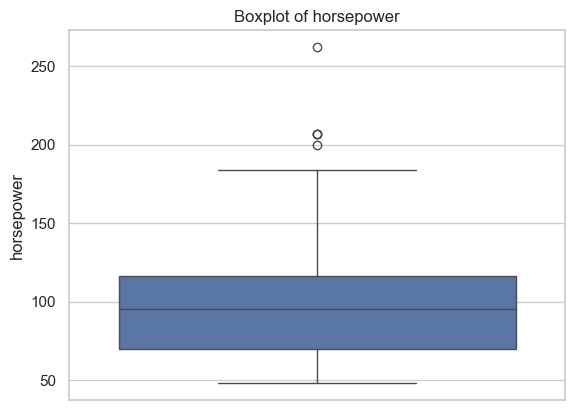

Analyzing: peak-rpm


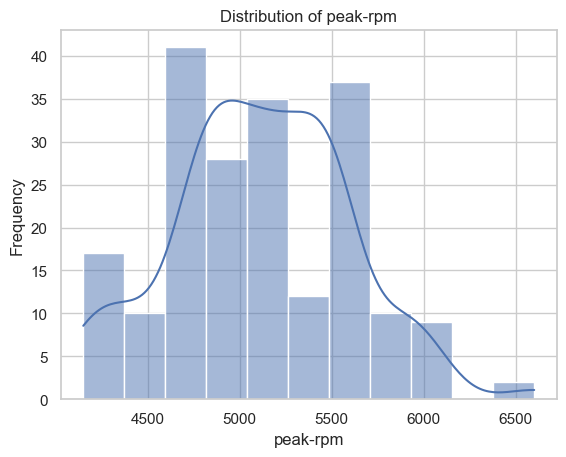

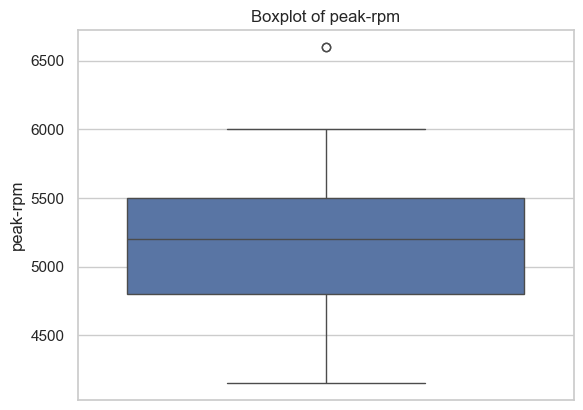

Analyzing: city-mpg


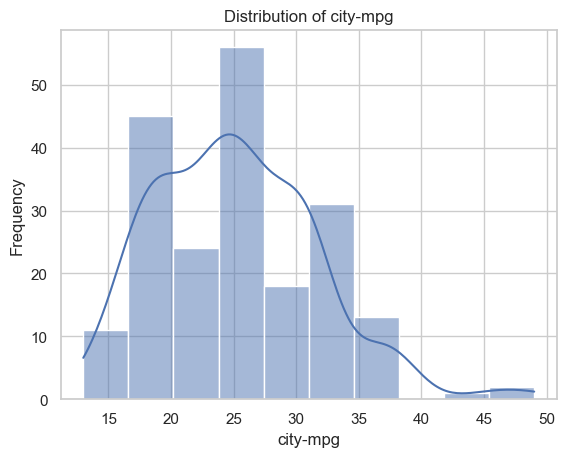

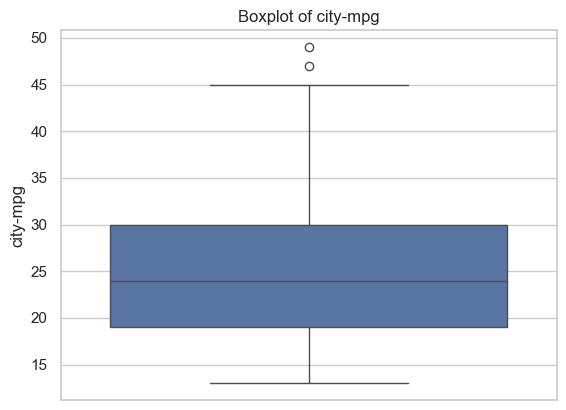

Analyzing: highway-mpg


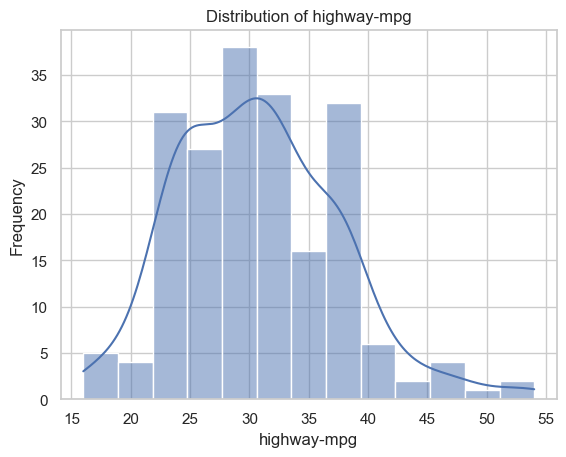

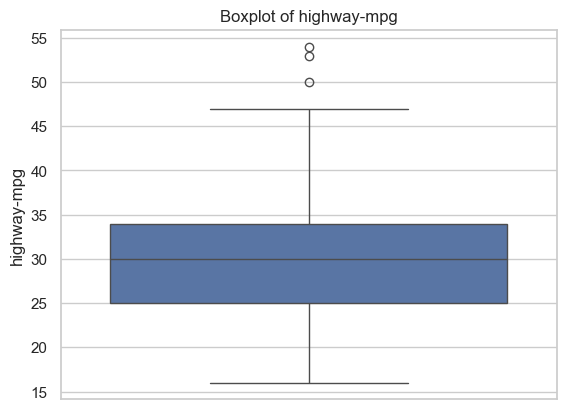

Analyzing: price


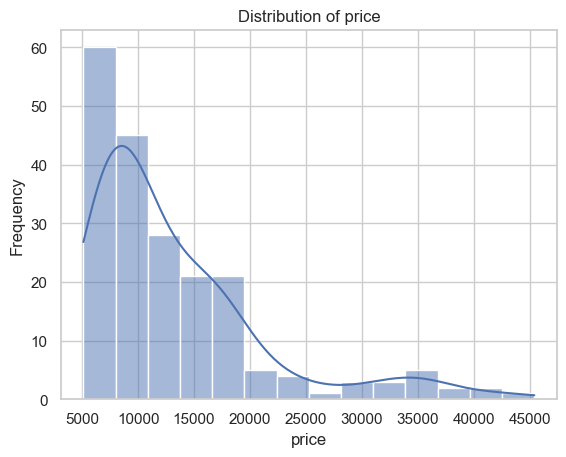

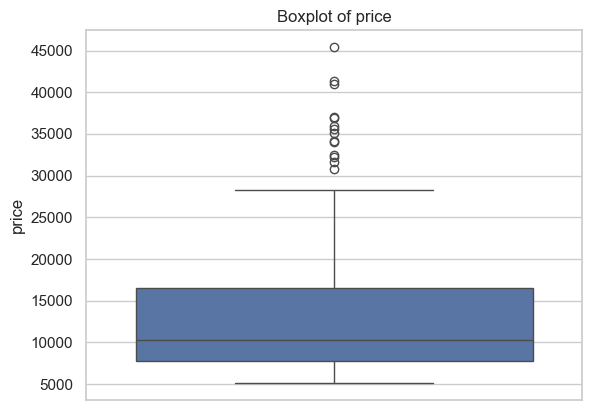

Analyzing: number-of-cylinders


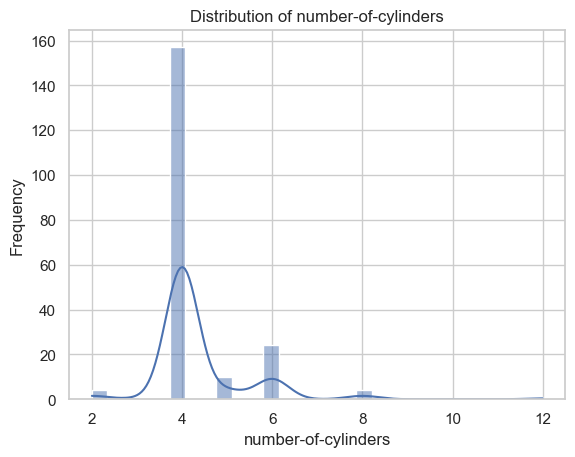

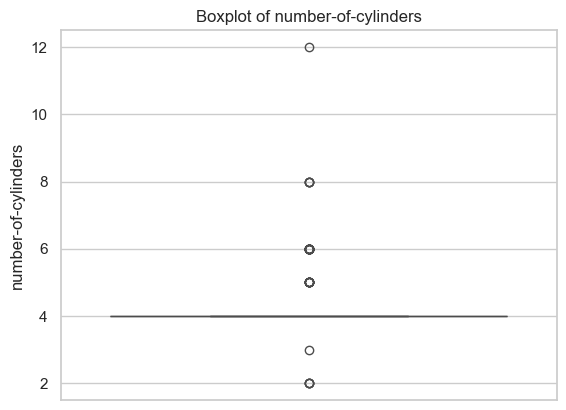

In [87]:
for col in numerical_cols:
    print(f"Analyzing: {col}")
    
    # Histogram
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

#### Multivariate analysis (Numerical vs Target):


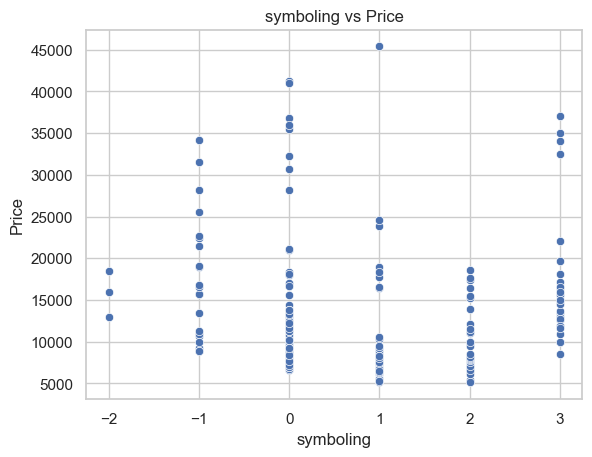

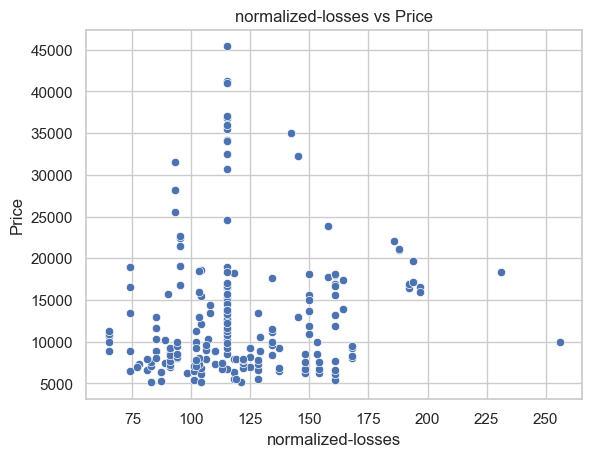

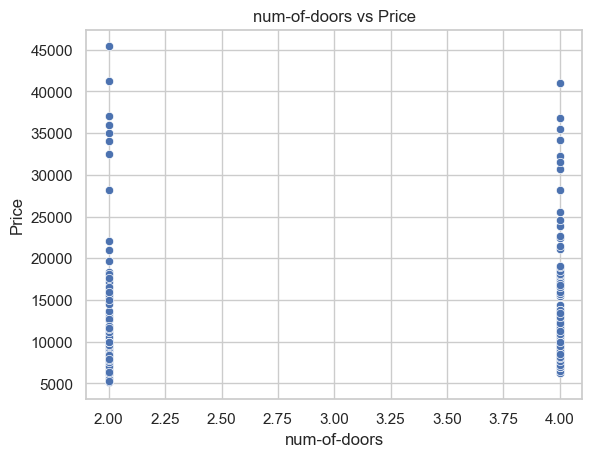

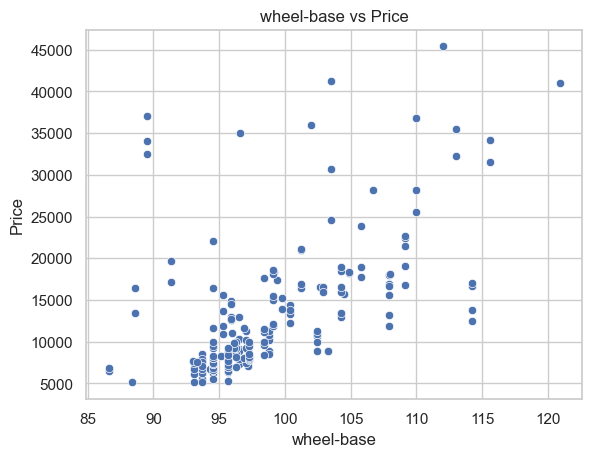

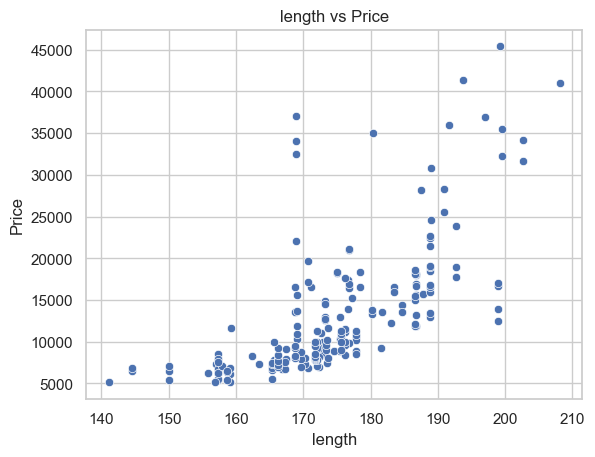

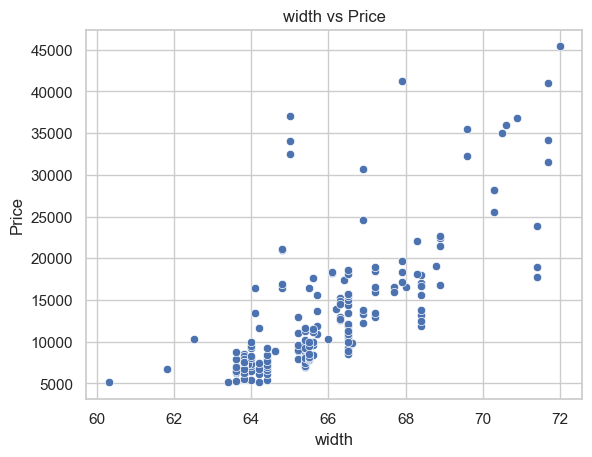

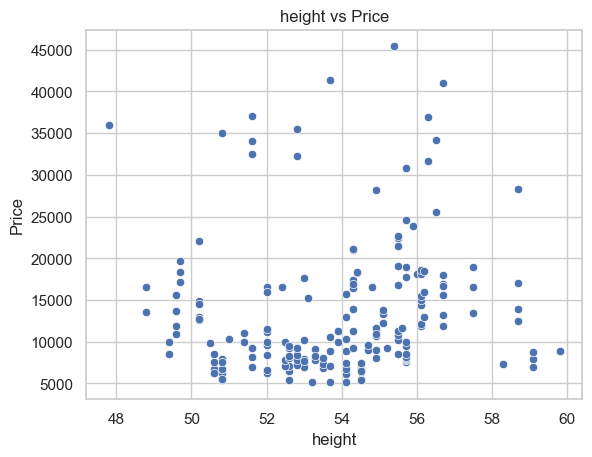

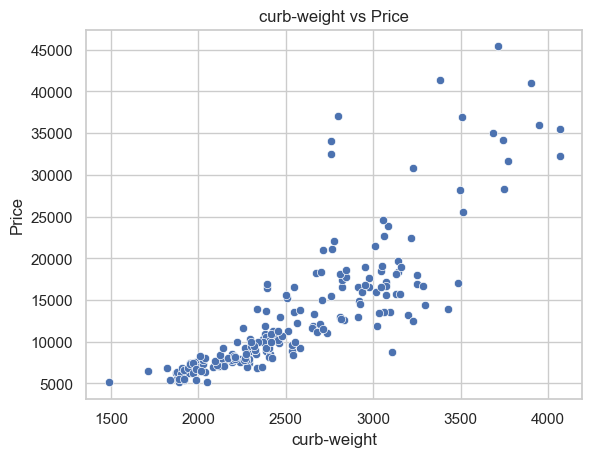

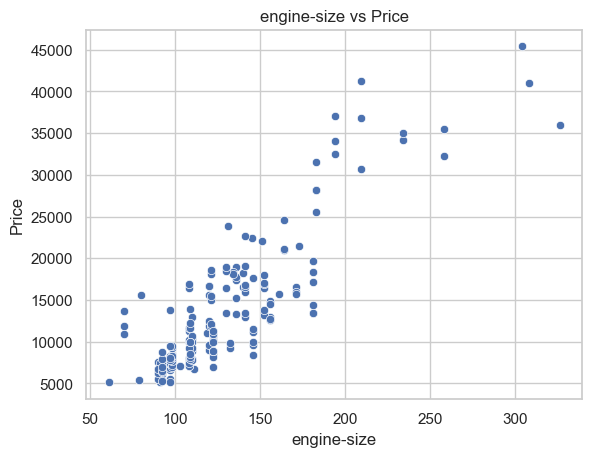

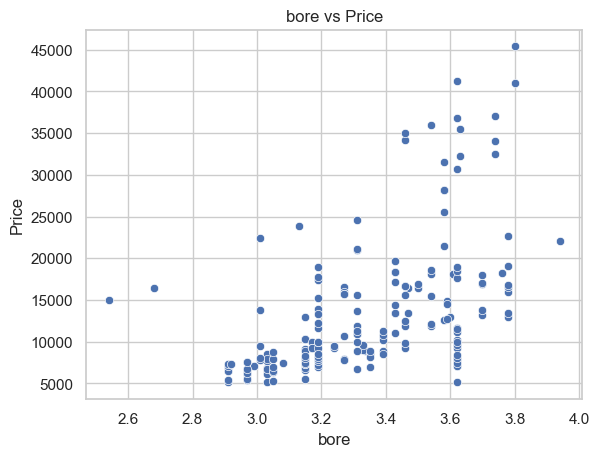

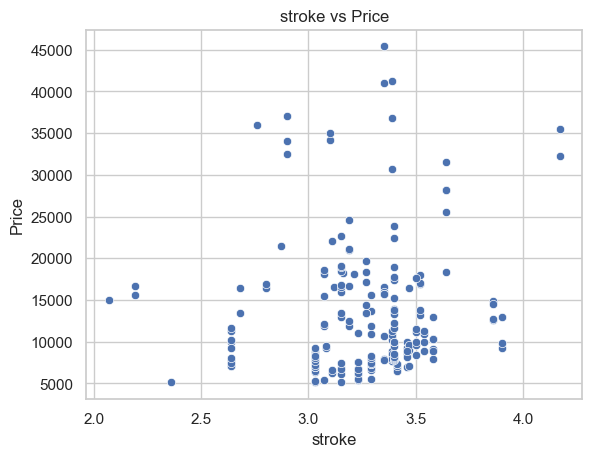

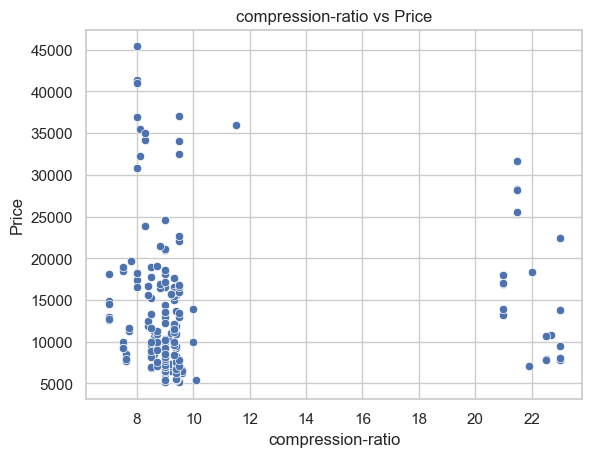

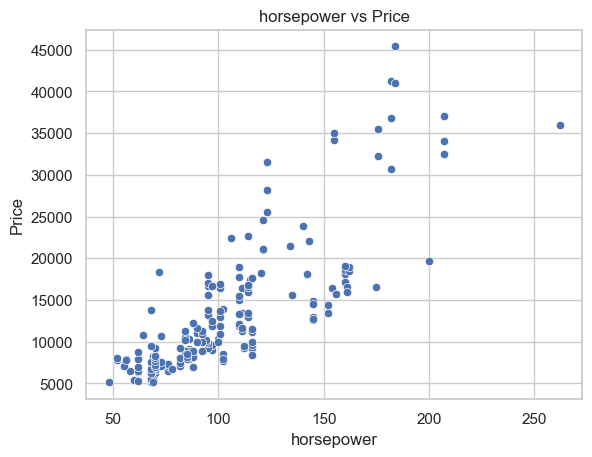

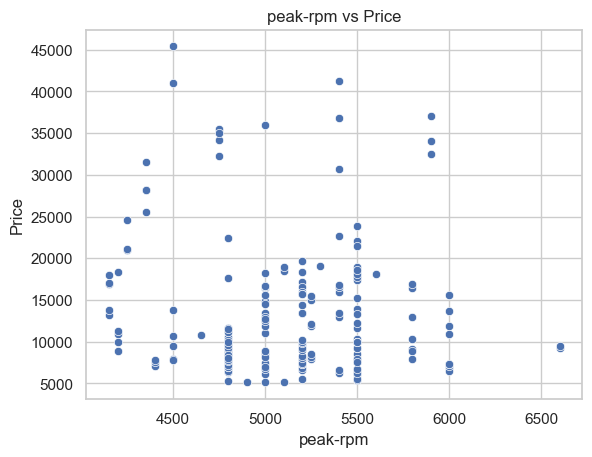

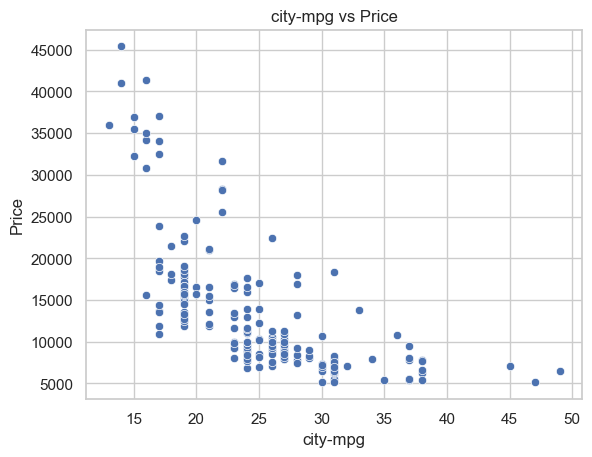

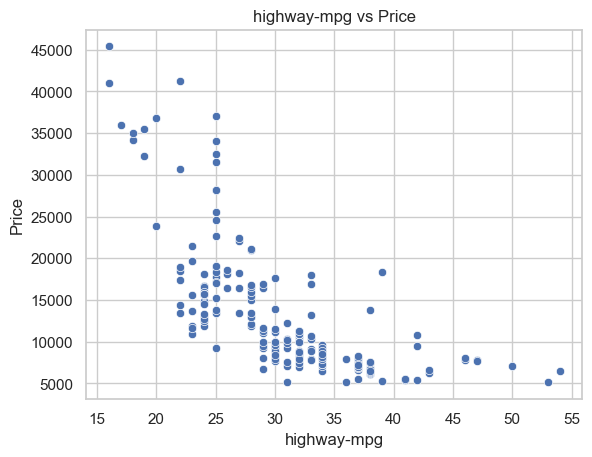

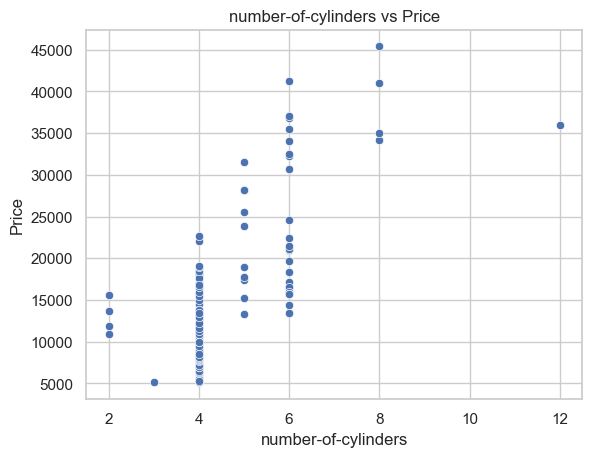

In [88]:
for col in numerical_cols:
    if col != 'price':
        sns.scatterplot(x=df[col], y=df['price'])
        plt.title(f'{col} vs Price')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.show()


### Stastical Distribution Mean, Median, Mode,... etc

In [55]:
# Stastical analysis of the dataset Mean, Median, Mode,....etc
# df.describe().T